 The project aims at identifying high-risk transactions of a bank, to result in a in fraud incidents

## Mount Google Drive to Access Files


In [ ]:
# Import the necessary module to mount Google Drive
from google.colab import drive

# Mount Google Drive to the /content/drive directory in the Colab environment
# This will prompt you to authenticate and grant access to your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Required Libraries for Data Analysis, Visualization, and Modeling


In [ ]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computations
import numpy as np

# Importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing display from IPython to display data frames and other outputs
from IPython.display import display

# Suppressing warnings from certain libraries to keep the output clean
import warnings  # For managing warning messages
warnings.filterwarnings("ignore", module="some_library")  # Ignore warnings from a specific module

# Importing scikit-learn libraries for preprocessing, model training, and evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # Preprocessing tools
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier  # Decision Tree algorithms for regression and classification
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report  # Evaluation metrics
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.compose import ColumnTransformer  # Applying transformations to specific columns
from sklearn.pipeline import Pipeline  # Building machine learning pipelines

# Importing scipy for statistical functions
from scipy import stats  # General statistical functions
from scipy.stats import pearsonr  # Pearson correlation coefficient calculation

## Setting Display Options for Pandas DataFrames


In [ ]:
# Setting pandas display options to show all rows and columns in the output
# This ensures that no rows or columns are hidden when displaying large DataFrames
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Importing Datasets: 'application_data' and 'previous_application'


In [ ]:
# Importing the 'application_data' dataset from Google Drive
# The 'on_bad_lines' parameter is used to skip problematic lines during import
data = pd.read_csv("/content/application_data.csv", on_bad_lines='skip')

# Importing the 'previous_application' dataset from Google Drive
df = pd.read_csv("/content/previous_application.csv", on_bad_lines='skip')

# Displaying the shape of the 'previous_application' DataFrame
# This provides the number of rows and columns in the dataset
data.shape
df.shape

(1670214, 37)

## Checking the First Few Rows of the 'application_data' Dataset and Saving as a CSV


In [ ]:
# Extracting the first 5 rows of the 'application_data' DataFrame for a quick data check
df = data.head(5)

# Saving these first 5 rows to a new CSV file named 'full_Sample.csv'
# The 'index=False' parameter ensures that the row indices are not included in the CSV file
df.to_csv('full_Sample.csv', index=False)

## Checking and Saving Missing Data Information for 'application_data' and 'previous_application'


In [ ]:
# Checking for missing data in the 'application_data' DataFrame
# The 'isnull().sum()' function calculates the number of missing values in each column
print("Missing data in Application Data:")
missing_data_application = data.isnull().sum()
print(missing_data_application)

# Saving the missing data count for 'application_data' to a text file named 'nan_count.txt'
# The 'to_string()' method converts the Series to a string for writing to the file
with open('nan_count.txt', 'w') as file:
    file.write(missing_data_application.to_string())

# Checking for missing data in the 'previous_application' DataFrame
print("Missing data in Previous Application Data:")
missing_df = df.isnull().sum()
print(missing_df)

# Saving the missing data count for 'previous_application' to a text file named 'nan.txt'
with open('nan.txt', 'w') as file:
    file.write(missing_df.to_string())

Missing data in Application Data:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
Missing data in Previous Application Data:
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     1
AMT_REQ_CREDIT_BUREAU_WEEK    1
AMT_REQ_CREDIT_BUREAU_MON     1
AMT_REQ_CREDIT_BUREAU_QRT     1
AMT_REQ_CREDIT_BUREAU_YEAR    1
Length: 122, dtype: int64


## Checking for Missing Data in 'application_data' and 'previous_application'


In [ ]:
# Checking for missing data in the 'application_data' DataFrame
# The 'isnull().sum()' function calculates the number of missing values in each column
print("Missing data in Application Data:")
missing_data_application = data.isnull().sum()

# Displaying only the columns that have missing data (non-zero sum)
print(missing_data_application[missing_data_application > 0])

# Checking for missing data in the 'previous_application' DataFrame
print("\nMissing data in Previous Application Data:")
missing_df = df.isnull().sum()

# Displaying only the columns that have missing data (non-zero sum)
print(missing_df[missing_df > 0])

Missing data in Application Data:
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

Missing data in Previous Application Data:
OWN_CAR_AGE                     4
EXT_SOURCE_1                    3
EXT_SOURCE_3                    3
APARTMENTS_AVG                  3
BASEMENTAREA_AVG                3
YEARS_BEGINEXPLUATATION_AVG     3
YEARS_BUILD_AVG                 3
COMMONAREA_AVG                  3
ELEVATORS_AVG                   3
ENTRANCES_AVG                   3
FLOORSMAX_AVG                   3
FLOORSMIN_AVG                   3
LANDAREA_AVG                    3
LIVINGAPARTMENTS_AVG            3
LIVINGAREA_AVG

## Identifying Columns with Missing Data and Their Data Types


In [ ]:
# Identifying columns in 'application_data' that contain missing values
missing_columns_application = data.columns[data.isnull().any()].tolist()

# Identifying columns in 'previous_application' that contain missing values
missing_columns_previous = df.columns[df.isnull().any()].tolist()

# Displaying data types of columns with missing data in the 'application_data' DataFrame
print("\nData types of columns with missing data in Application Data:")
print(data[missing_columns_application].dtypes)

# Displaying data types of columns with missing data in the 'previous_application' DataFrame
print("\nData types of columns with missing data in Previous Application Data:")
print(df[missing_columns_previous].dtypes)


Data types of columns with missing data in Application Data:
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
OWN_CAR_AGE                   float64
OCCUPATION_TYPE                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 67, dtype: object

Data types of columns with missing data in Previous Application Data:
OWN_CAR_AGE                     float64
EXT_SOURCE_1                    float64
EXT_SOURCE_3                    float64
APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG          

## Displaying Value Counts for Columns with Missing Data


In [ ]:
# Identifying columns in 'application_data' that contain missing values
miss = data.columns[data.isna().any()]

# Iterating over each column with missing data and displaying its value counts
print("Value counts for columns with missing data in Application Data:")
for col in miss:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())  # Display value counts for non-missing data

# Identifying columns in 'previous_application' that contain missing values
tiss = df.columns[df.isna().any()]

# Iterating over each column with missing data and displaying its value counts
print("\nValue counts for columns with missing data in Previous Application Data:")
for col in tiss:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())  # Display value counts for non-missing data

Value counts for columns with missing data in Application Data:

Column: AMT_ANNUITY
AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13672, dtype: int64

Column: AMT_GOODS_PRICE
AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: count, Length: 1002, dtype: int64

Column: NAME_TYPE_SUITE
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

Column: OWN_CAR_AGE
OWN_CAR_AGE
7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
69.0       1
50.0       1

## Handling Missing Data in Categorical Columns


In [ ]:
# Selecting columns of object (categorical) data type in the 'application_data' DataFrame
object_columns = data.select_dtypes(include=['object'])

# Filling missing values in categorical columns with 'Unknown' for 'application_data'
for col in object_columns.columns:
    if data[col].isna().sum() > 0:  # Check if the column contains missing values
        data[col].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown'

# Selecting columns of object (categorical) data type in the 'previous_application' DataFrame
columns_object = df.select_dtypes(include=['object'])

# Filling missing values in categorical columns with 'Unknown' for 'previous_application'
for col in columns_object.columns:
    if df[col].isna().sum() > 0:  # Check if the column contains missing values
        df[col].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown'


## Verify Missing Data After Filling Categorical Columns


In [ ]:
# Checking the count of missing values in categorical columns of 'application_data' after filling
count = object_columns.isna().sum()

# Displaying the count of missing values for columns that still have missing data
print("Missing data counts in 'application_data' after filling:")
print(count[count > 0])

# Checking the count of missing values in categorical columns of 'previous_application' after filling
dount = columns_object.isna().sum()

# Displaying the count of missing values for columns that still have missing data
print("Missing data counts in 'previous_application' after filling:")
print(dount[dount > 0])

Missing data counts in 'application_data' after filling:
Series([], dtype: int64)
Missing data counts in 'previous_application' after filling:
Series([], dtype: int64)


## Identifying and Dropping Columns with Excessive Missing Data


In [ ]:
# Creating a dictionary to store column names and their respective count of missing values
value = {'Column': [], 'MissingValues': []}

# Iterating over each column in 'application_data' to calculate missing values
for col in data.columns:
    missing_values = int(data[col].isnull().sum())  # Convert np.int to standard Python int
    value['Column'].append(col)
    value['MissingValues'].append(missing_values)

# Creating a DataFrame from the dictionary to hold column names and missing value counts
null = pd.DataFrame(value)

# Sorting the DataFrame by 'MissingValues' in descending order to prioritize columns with more missing data
null_sorted = null.sort_values(by='MissingValues', ascending=False).reset_index(drop=True)

# Calculating the threshold for 45% missing data based on the number of rows in the DataFrame
threshold = 0.45 * len(data)

# Identifying columns with more than 45% missing data
columns_with_high_missing = null['Column'][null['MissingValues'] > threshold]

# Converting the Series of column names to a list
columns_with_high_missing_list = columns_with_high_missing.tolist()

# Displaying the number of columns with excessive missing data
print(len(columns_with_high_missing_list))

# Dropping columns with more than 45% missing data from the 'application_data' DataFrame
data = data.drop(columns_with_high_missing_list, axis=1)


45


## Handling Missing Data in Numeric Columns


In [ ]:
# Selecting columns of numeric data type (int64 and float64) in the 'application_data' DataFrame
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Filling missing values in numeric columns with the mean of each column
# The 'apply' function is used to apply a lambda function to each column
data[numeric_columns.columns] = numeric_columns.apply(lambda col: col.fillna(col.mean()))

# Selecting columns of numeric data type (int64 and float64) in the 'previous_application' DataFrame
columns_numeric = df.select_dtypes(include=['int64', 'float64'])

# Filling missing values in numeric columns with the mean of each column
df[columns_numeric.columns] = columns_numeric.apply(lambda col: col.fillna(col.mean()))

## Verify Missing Data in Numeric Columns After Imputation


In [ ]:
# Checking the count of missing values in numeric columns of 'application_data' after imputation
n_count = numeric_columns.isna().sum()
print("Missing data counts in numeric columns of 'application_data' after imputation:")
print(n_count[n_count > 0])  # Display columns with missing data remaining

# Checking the count of missing values in numeric columns of 'previous_application' after imputation
count_n = columns_numeric.isna().sum()
print("\nMissing data counts in numeric columns of 'previous_application' after imputation:")
print(count_n[count_n > 0])  # Display columns with missing data remaining

Missing data counts in numeric columns of 'application_data' after imputation:
Series([], dtype: int64)

Missing data counts in numeric columns of 'previous_application' after imputation:
Series([], dtype: int64)


## Align Columns Between DataFrames and Create a New DataFrame


In [ ]:
# Get columns from df
previous_col = df.columns

# Ensure we only select columns that exist in both df and data
common_columns = [col for col in previous_col if col in data.columns]

# Use common columns to create the new DataFrame
data_app = data[common_columns]

# Display the result
print(data_app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE

## Identifying and Capping Outliers in Numeric Columns


In [ ]:
# Identify numeric columns in both datasets
numeric_columns_app = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns_prev = df.select_dtypes(include=['int64', 'float64']).columns

# Define a function to cap outliers using the 1st and 99th percentiles
def cap_outliers(df, columns):
    for col in columns:
        # Calculate the 1st and 99th percentiles
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)

        # Cap values at these percentiles
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Apply the outlier capping to both datasets
application_data = cap_outliers(data, numeric_columns_app)
previous_application = cap_outliers(df, numeric_columns_prev)


## Displaying 1st and 99th Percentiles for Numeric Columns in 'application_data'


In [ ]:
# Iterate over each numeric column in the 'application_data' DataFrame
for col in numeric_columns_app:
    # Calculate the 1st percentile (lower bound) and 99th percentile (upper bound) for the column
    lower_bound = data[col].quantile(0.01)
    upper_bound = data[col].quantile(0.99)

    # Print the column name and its calculated percentiles
    print(f"{col} - 1st Percentile: {lower_bound}, 99th Percentile: {upper_bound}")

SK_ID_CURR - 1st Percentile: 103590.37999999999, 99th Percentile: 452712.81000000006
TARGET - 1st Percentile: 0.0, 99th Percentile: 1.0
CNT_CHILDREN - 1st Percentile: 0.0, 99th Percentile: 3.0
AMT_INCOME_TOTAL - 1st Percentile: 45000.0, 99th Percentile: 472500.0
AMT_CREDIT - 1st Percentile: 76410.0, 99th Percentile: 1854000.0
AMT_ANNUITY - 1st Percentile: 6183.0, 99th Percentile: 70006.5
AMT_GOODS_PRICE - 1st Percentile: 67500.0, 99th Percentile: 1800000.0
REGION_POPULATION_RELATIVE - 1st Percentile: 0.002134, 99th Percentile: 0.072508
DAYS_BIRTH - 1st Percentile: -24419.0, 99th Percentile: -8263.0
DAYS_EMPLOYED - 1st Percentile: -10894.81, 99th Percentile: 365243.0
DAYS_REGISTRATION - 1st Percentile: -13879.0, 99th Percentile: -50.0
DAYS_ID_PUBLISH - 1st Percentile: -5447.0, 99th Percentile: -61.0
FLAG_MOBIL - 1st Percentile: 1.0, 99th Percentile: 1.0
FLAG_EMP_PHONE - 1st Percentile: 0.0, 99th Percentile: 1.0
FLAG_WORK_PHONE - 1st Percentile: 0.0, 99th Percentile: 1.0
FLAG_CONT_MOBILE

## Print Statistics Before and After Capping Outliers


In [ ]:
# Define a function to print statistics before and after capping
def print_outlier_stats(df, columns):
    for col in columns:
        print(f"Statistics for column '{col}':")

        # Before capping
        print("Before capping:")
        print(df[col].describe())

        # Capping outliers
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = np.clip(df[col], lower_bound, upper_bound)

        # After capping
        print("After capping:")
        print(df[col].describe())
        print("\n" + "="*50 + "\n")

# Apply the function to both datasets
print("Application Data:")
print_outlier_stats(data, numeric_columns_app)

print("Previous Application Data:")
print_outlier_stats(df, numeric_columns_prev)

Application Data:
Statistics for column 'SK_ID_CURR':
Before capping:
count    307511.000000
mean     278180.637501
std      102728.985294
min      103590.200000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      452712.900000
Name: SK_ID_CURR, dtype: float64
After capping:
count    307511.000000
mean     278180.638401
std      102728.980705
min      103590.380000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      452712.810000
Name: SK_ID_CURR, dtype: float64


Statistics for column 'TARGET':
Before capping:
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
After capping:
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype

## Check for Imbalances in Categorical Columns


In [ ]:
# Identify categorical columns in the 'application_data' DataFrame
categorical_cols = data.select_dtypes(include=['object']).columns

# Print the distribution of categories for each categorical column
print("\nCategory Distribution:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())


Category Distribution:

NAME_CONTRACT_TYPE:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE:
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: count, dtype: int64

NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

NAME_EDUCATION_TYPE:
NA

## Analyze Data Imbalance for Target Column


In [ ]:
# Define a function to analyze data imbalance in the target column
def analyze_data_imbalance(df, target_col):
    # Print the count of each unique value in the target column
    print(f"\n{target_col} Value Counts:")
    print(df[target_col].value_counts())

    # Calculate and print the proportion of each unique value in the target column
    imbalance = df[target_col].value_counts(normalize=True)
    print("\nImbalance Analysis (Proportion):")
    print(imbalance)

# Example usage of the function to analyze imbalance in the 'TARGET' column of the 'application_data' DataFrame
analyze_data_imbalance(data, 'TARGET')



TARGET Value Counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Imbalance Analysis (Proportion):
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


## Sample and Save a Subset of Data


In [ ]:
# Take a random sample of 10 rows from the 'application_data' DataFrame
df = data.sample(10)

# Save the sampled data to a CSV file
df.to_csv('Sample.csv', index=False)

# Display the sampled data
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
97205     212845.0       0         Cash loans           F            N   
135370    257007.0       0         Cash loans           F            N   
26703     131041.0       0         Cash loans           F            N   
293948    440552.0       0    Revolving loans           F            N   
55220     163983.0       0         Cash loans           F            N   
128293    248815.0       0         Cash loans           F            N   
302659    450652.0       0         Cash loans           F            N   
148029    271637.0       0         Cash loans           F            N   
170502    297609.0       0         Cash loans           M            N   
197482    328963.0       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
97205                Y             0           99000.0    225000.0   
135370               Y             0          112500.0    225000.0   
26703                Y             2           58500.0    148365.0   
293948               Y             0           67500.0    180000.0   
55220                Y             0          157500.0    478498.5   
128293               Y             0          135000.0    417024.0   
302659               N             2          157500.0    900000.0   
148029               N             1          157500.0    229500.0   
170502               Y             1          225000.0    835380.0   
197482               N             0           99000.0    590337.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
97205       22252.5  ...                 0                0                0   
135370      12694.5  ...                 0                0                0   
26703       12024.0  ...                 0                0                0   
293948       9000.0  ...                 0                0                0   
55220       47326.5  ...                 0                0                0   
128293      21420.0  ...                 0                0                0   
302659      26316.0  ...                 0                0                0   
148029      15336.0  ...                 0                0                0   
170502      40320.0  ...                 0                0                0   
197482      23409.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
97205                 0                   0.000000                       0.0   
135370                0                   0.000000                       0.0   
26703                 0                   0.000000                       0.0   
293948                0                   0.000000                       0.0   
55220                 0                   0.000000                       0.0   
128293                0                   0.000000                       0.0   
302659                0                   0.000000                       0.0   
148029                0                   0.000000                       0.0   
170502                0                   0.006402                       0.0   
197482                0                   0.000000                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
97205                          0.0                        0.0   
135370                         0.0                        0.0   
26703                          0.0                        1.0   
293948                         0.0                        0.0   
55220                          1.0                        0.0   
128293                         0.0                        0.0   
302659                         0.0                        0.0   
148029                         0.0                        0.0   
170502                         0.0                        0.0   
197482    

## Encoding Categorical Variables and Scaling Numerical Data


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_columns.tolist())
print("Numerical columns:", numerical_columns.tolist())

# Initialize encoders
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply Label Encoding to binary categorical variables
binary_cat_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
for col in binary_cat_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Apply One-Hot Encoding to non-binary categorical variables
non_binary_cat_columns = [col for col in categorical_columns if col not in binary_cat_columns]
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(data[non_binary_cat_columns]))
onehot_encoded.columns = onehot_encoder.get_feature_names_out(non_binary_cat_columns)

# Concatenate one-hot encoded features with the original dataframe
data = pd.concat([data.drop(non_binary_cat_columns, axis=1), onehot_encoded], axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the transformed dataset
print("\nFirst few rows of transformed dataset:")
print(data.head())

# Display info of the transformed dataset
print("\nInfo of transformed dataset:")
print(data.info())

# Display summary statistics
print("\nSummary statistics of transformed dataset:")
print(data.describe())

Categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Numerical columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOC

## Plot Correlations and Heatmap for Numeric Data


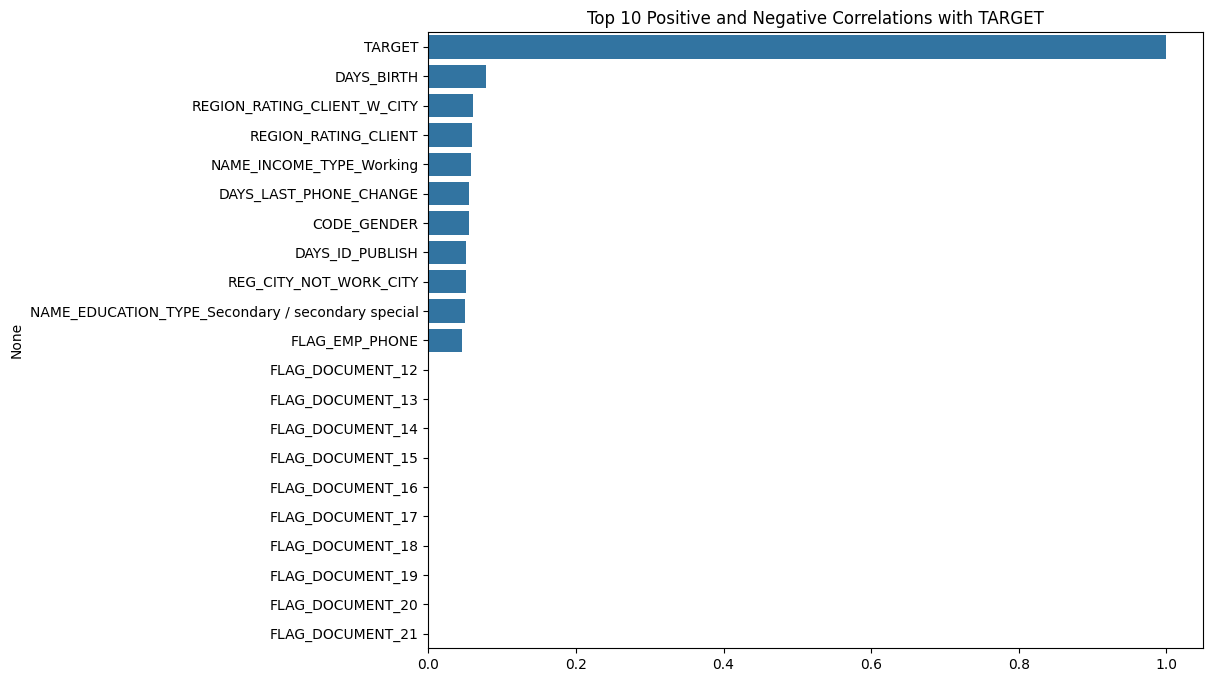

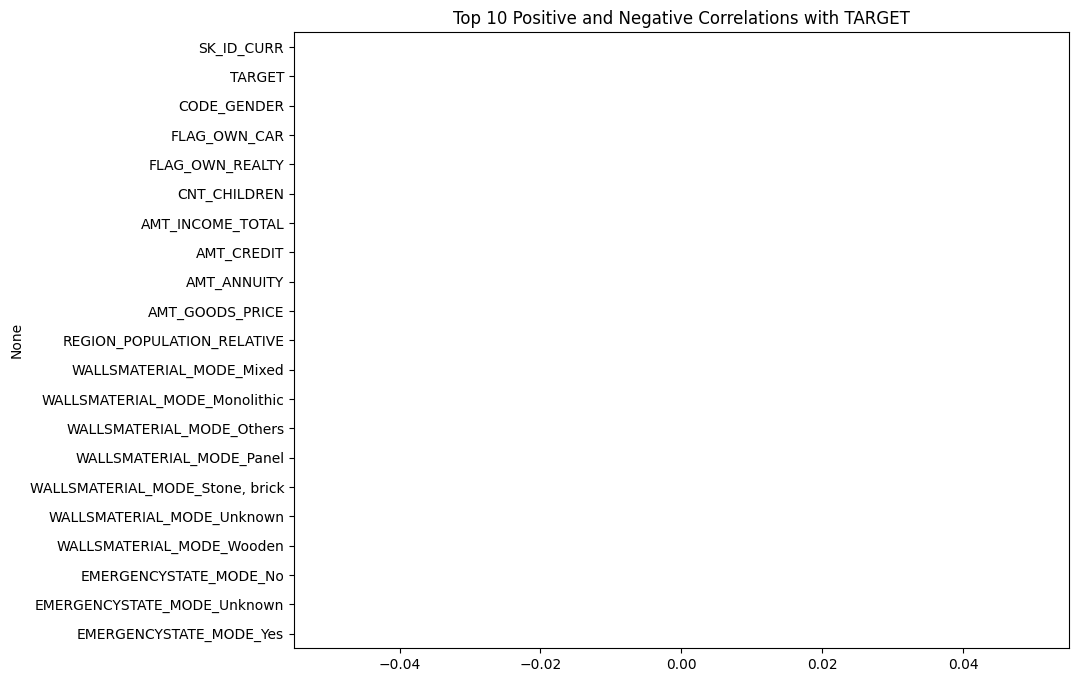

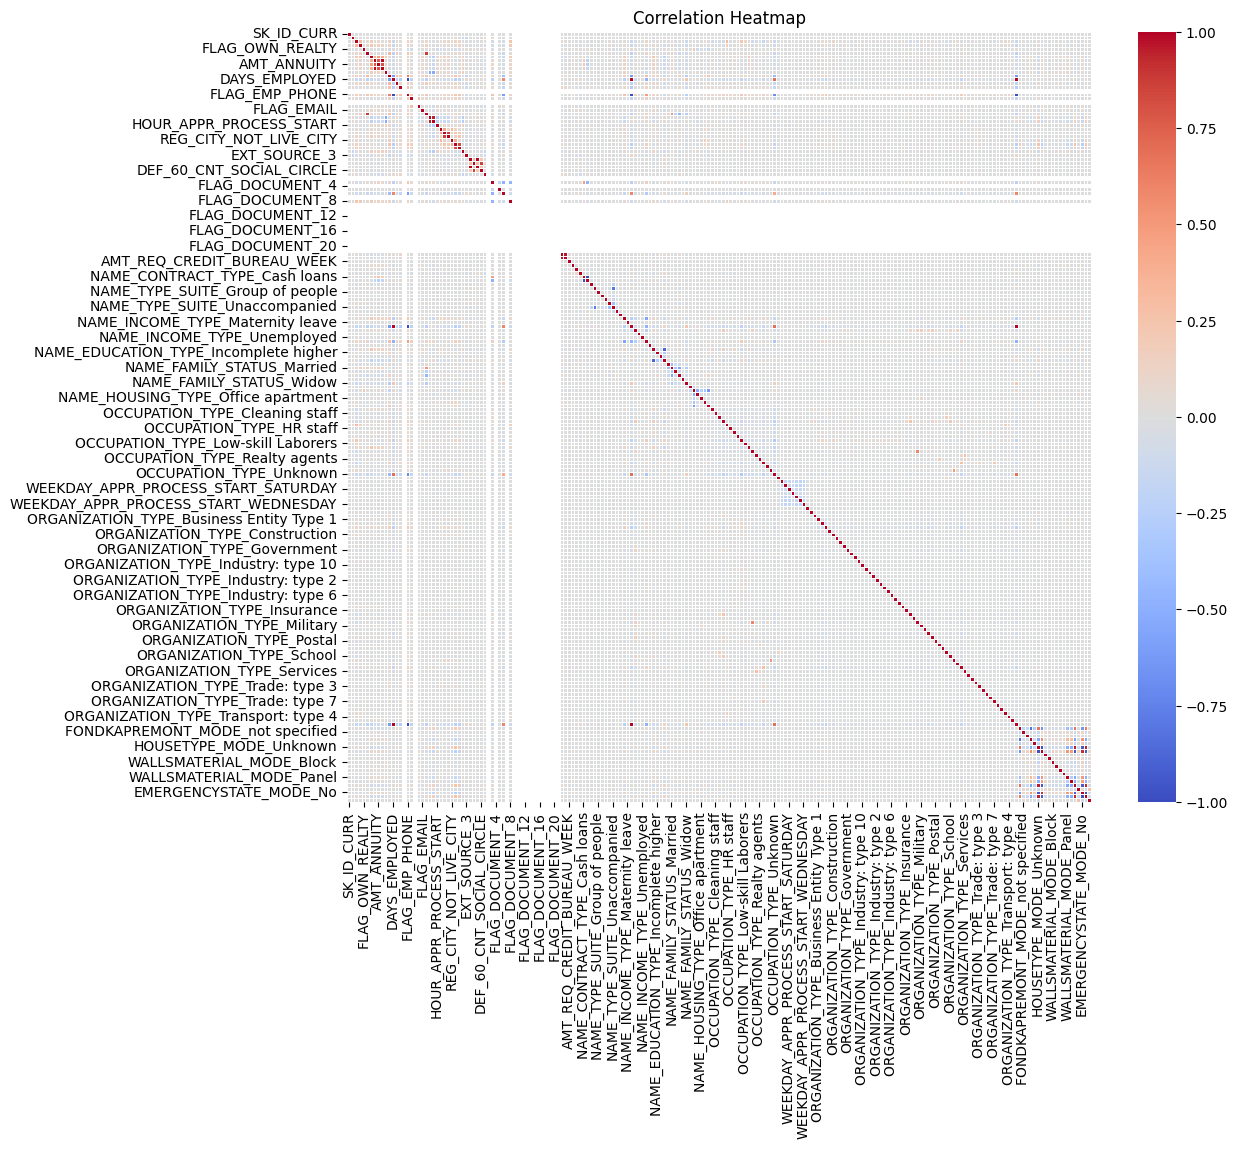

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to plot top correlations with a target column
def plot_top_correlations(data, target, n=10):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[float, int])

    # Check if the target column is numeric; if not, raise an error
    if target not in numeric_data.columns:
        raise ValueError(f"The target column '{target}' is not numeric.")

    # Compute correlation of each numeric column with the target and sort values
    corr = numeric_data.corr()[target].sort_values(ascending=False)

    # Use pd.concat instead of append to get top correlations
    top_corr = pd.concat([corr.head(n+1), corr.tail(n)])  # +1 to include the target itself

    # Create a bar plot for the top correlations
    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title(f'Top {n} Positive and Negative Correlations with {target}')
    plt.show()

# Plot top correlations for the entire dataset
plot_top_correlations(data, 'TARGET')

# Plot top correlations for clients with payment difficulties (TARGET == 1)
plot_top_correlations(data[data['TARGET'] == 1], 'TARGET')

# Generate a correlation heatmap for all numeric data
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=[float, int]).corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Derived Metrics and Analysis


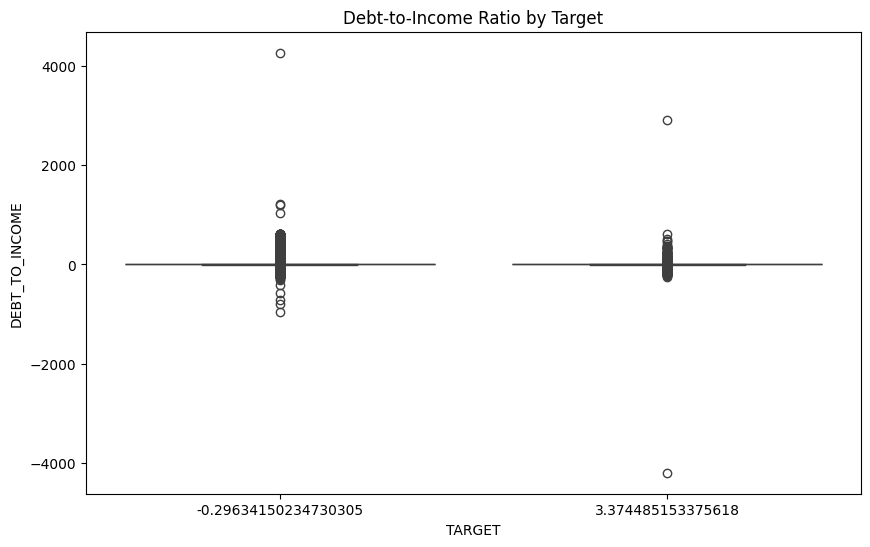

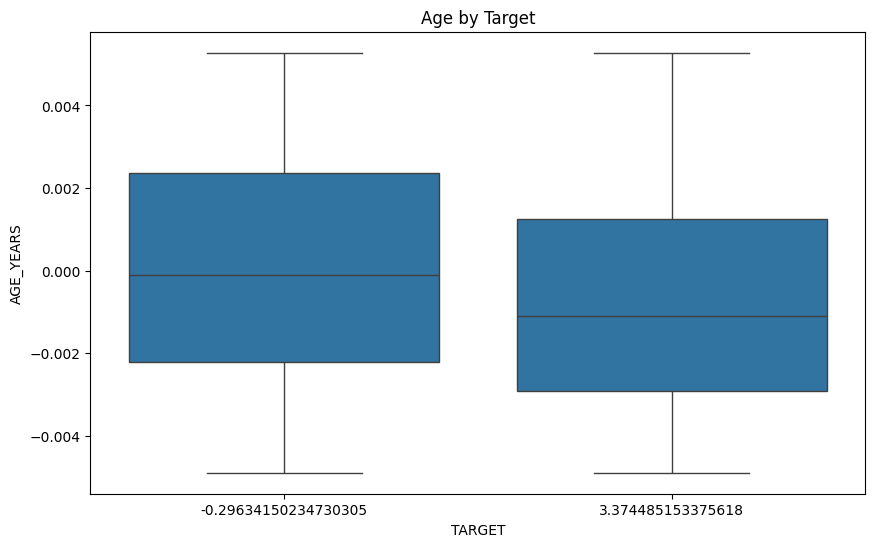

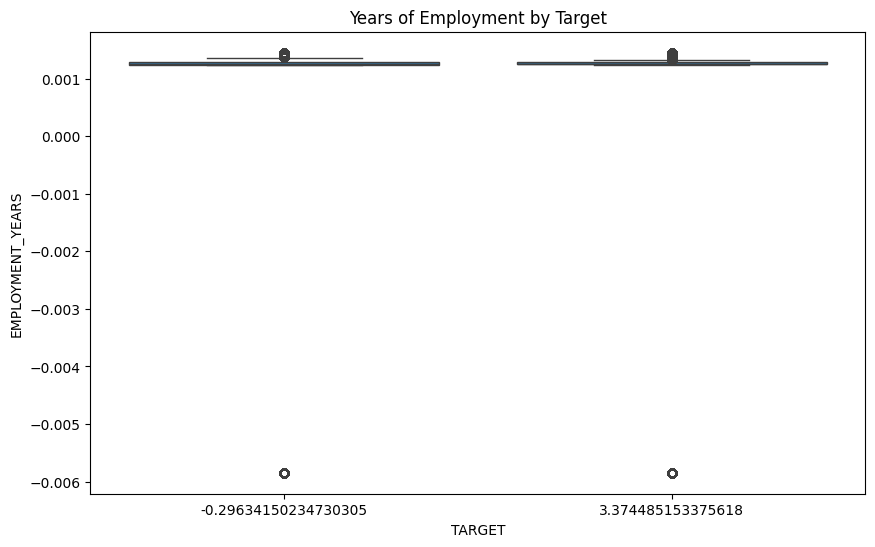

         SK_ID_CURR        TARGET    CODE_GENDER   FLAG_OWN_CAR  \
count  3.075110e+05  3.075110e+05  307511.000000  307511.000000   
mean   2.957601e-17 -5.785806e-17       0.341669       0.340108   
std    1.000002e+00  1.000002e+00       0.474297       0.473746   
min   -1.699526e+00 -2.963415e-01       0.000000       0.000000   
25%   -8.667007e-01 -2.963415e-01       0.000000       0.000000   
50%    2.079416e-04 -2.963415e-01       0.000000       0.000000   
75%    8.659874e-01 -2.963415e-01       1.000000       1.000000   
max    1.698960e+00  3.374485e+00       2.000000       1.000000   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count    307511.000000  3.075110e+05      3.075110e+05  3.075110e+05   
mean          0.693673 -7.433282e-17      1.376671e-16 -1.336581e-16   
std           0.460968  1.000002e+00      1.000002e+00  1.000002e+00   
min           0.000000 -5.860539e-01     -1.458644e+00 -1.328614e+00   
25%           0.000000 -5.860539e-01

In [ ]:
# Derived Metrics
data['DEBT_TO_INCOME'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['AGE_YEARS'] = -data['DAYS_BIRTH'] / 365
data['EMPLOYMENT_YEARS'] = -data['DAYS_EMPLOYED'] / 365

# Analyze new metrics
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='DEBT_TO_INCOME', data=data)
plt.title('Debt-to-Income Ratio by Target')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AGE_YEARS', data=data)
plt.title('Age by Target')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='EMPLOYMENT_YEARS', data=data)
plt.title('Years of Employment by Target')
plt.show()

# Print summary statistics
print(data.describe())

# Calculate average values for key metrics by target
key_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE_YEARS', 'DEBT_TO_INCOME', 'EMPLOYMENT_YEARS']
print(data.groupby('TARGET')[key_metrics].mean())

# Print insights and recommendations
print("\nKey Findings and Recommendations:")
print("1. [Insert key finding 1 based on univariate analysis]")
print("   Recommendation: [Insert recommendation 1]")
print("2. [Insert key finding 2 based on bivariate analysis]")
print("   Recommendation: [Insert recommendation 2]")
print("3. [Insert key finding 3 based on correlation analysis]")
print("   Recommendation: [Insert recommendation 3]")
print("4. [Insert key finding 4 based on derived metrics]")
print("   Recommendation: [Insert recommendation 4]")

## Data Preparation, Model Training, and Prediction


In [ ]:
print("Columns in X:", X.columns.tolist())

Columns in X: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMEN

In [ ]:
additional_features = [col for col in additional_features if col in X.columns]

In [ ]:
print("y_amount type:", y_amount.dtype)
print("y_repay type:", y_repay.dtype)


y_amount type: float64
y_repay type: float64


In [ ]:
y_repay = y_repay.astype('int')  # Assuming the values are already 0 and 1

In [ ]:
# Example conversion if 'TARGET' is not already binary
y_repay = (y_repay > 0).astype(int)  # This assumes you want to classify anything greater than 0 as 1

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 1. Prepare the data
X = data.drop(['SK_ID_CURR', 'TARGET', 'AMT_ANNUITY'], axis=1)
y_amount = data['AMT_ANNUITY']
y_repay = data['TARGET'].astype('int')  # Ensure binary classification for repayment

# Define additional features to be used in the model
additional_features = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE'
]

# Filter the DataFrame to include only the additional features that exist
existing_features = [feature for feature in additional_features if feature in X.columns]
X = X[existing_features]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# 2. Create preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numeric columns
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

# 3. Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply numeric transformer to numeric columns
        ('cat', categorical_transformer, categorical_features)  # Apply categorical transformer to categorical columns
    ])

# 4. Create preprocessing and modeling pipelines
amount_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=10))  # Train a Decision Tree Regressor
])

repay_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))  # Train a Decision Tree Classifier
])

# 5. Handle missing values in target variables
y_amount = y_amount.fillna(y_amount.median())  # Fill missing values in target amount with median

# 6. Initialize arrays to store predictions
all_amount_preds = np.zeros(len(data))
all_repay_preds = np.zeros(len(data))

# 7. Split the data into batches for processing
batch_size = 50000
num_batches = len(data) // batch_size + 1

for batch_idx in range(num_batches):
    start = batch_idx * batch_size
    end = min((batch_idx + 1) * batch_size, len(data))

    # Split the batch of data
    X_train_batch, X_test_batch, y_amount_train_batch, y_amount_test_batch, y_repay_train_batch, y_repay_test_batch = train_test_split(
        X.iloc[start:end], y_amount.iloc[start:end], y_repay.iloc[start:end], test_size=0.2, random_state=42)

    # 8. Fit the models on the training batch
    amount_model.fit(X_train_batch, y_amount_train_batch)
    repay_model.fit(X_train_batch, y_repay_train_batch)

    # 9. Make predictions on the test batch
    y_amount_pred_batch = amount_model.predict(X.iloc[start:end])
    y_repay_pred_batch = repay_model.predict(X.iloc[start:end])

    # 10. Store predictions in the arrays
    all_amount_preds[start:end] = y_amount_pred_batch
    all_repay_preds[start:end] = y_repay_pred_batch

# 11. Add predictions to the main DataFrame
data['Predicted_Amount'] = all_amount_preds
data['Predicted_Repayment'] = all_repay_preds
data['Repayment_Label'] = np.where(data['Predicted_Repayment'] == 0, 'Will repay', 'Will not repay')
data['Error_Amount'] = data['AMT_ANNUITY'] - data['Predicted_Amount']

# 12. Display sample rows from the updated DataFrame
print(data[['SK_ID_CURR', 'AMT_ANNUITY', 'Predicted_Amount', 'TARGET', 'Predicted_Repayment', 'Repayment_Label', 'Error_Amount']].head(10))


   SK_ID_CURR  AMT_ANNUITY  Predicted_Amount    TARGET  Predicted_Repayment  \
0   -1.699526    -0.164399         -0.088230  3.374485                  0.0   
1   -1.699526     0.641048          1.069161 -0.296342                  0.0   
2   -1.699526    -1.479019         -1.459679 -0.296342                  0.0   
3   -1.699526     0.200754          0.082675 -0.296342                  0.0   
4   -1.699526    -0.372023         -0.242202 -0.296342                  3.0   
5   -1.699526     0.041906         -0.092941 -0.296342                  0.0   
6   -1.699526     1.051352          1.513851 -0.296342                  0.0   
7   -1.699526     1.108036          1.729526 -0.296342                  0.0   
8   -1.699526     0.503951          1.041053 -0.296342                  0.0   
9   -1.699526    -0.490335         -0.402708 -0.296342                  0.0   

  Repayment_Label  Error_Amount  
0      Will repay     -0.076170  
1      Will repay     -0.428112  
2      Will repay     -0.019

## Filter and Display Rows for Repayment Prediction of "Will Not Repay"


In [ ]:
# Filter and display rows where repayment prediction is "Will not repay"
will_not_repay = data[data['Repayment_Label'] == 'Will not repay']

# Print the filtered rows
print(will_not_repay[['SK_ID_CURR', 'AMT_ANNUITY', 'Predicted_Amount', 'TARGET', 'Predicted_Repayment', 'Repayment_Label', 'Error_Amount']].head())


     SK_ID_CURR  AMT_ANNUITY  Predicted_Amount    TARGET  Predicted_Repayment  \
4     -1.699526    -0.372023         -0.242202 -0.296342                  3.0   
235   -1.699526     2.879428          2.879428  3.374485                  3.0   
260   -1.699526    -0.327862         -0.511658  3.374485                  3.0   
389   -1.699526     0.691801          1.203487  3.374485                  3.0   
399   -1.699526    -1.393992         -0.910358 -0.296342                  3.0   

    Repayment_Label  Error_Amount  
4    Will not repay     -0.129820  
235  Will not repay      0.000000  
260  Will not repay      0.183796  
389  Will not repay     -0.511686  
399  Will not repay     -0.483634  


## Scatter Plot: Actual Annuity Amount vs Predicted Amount


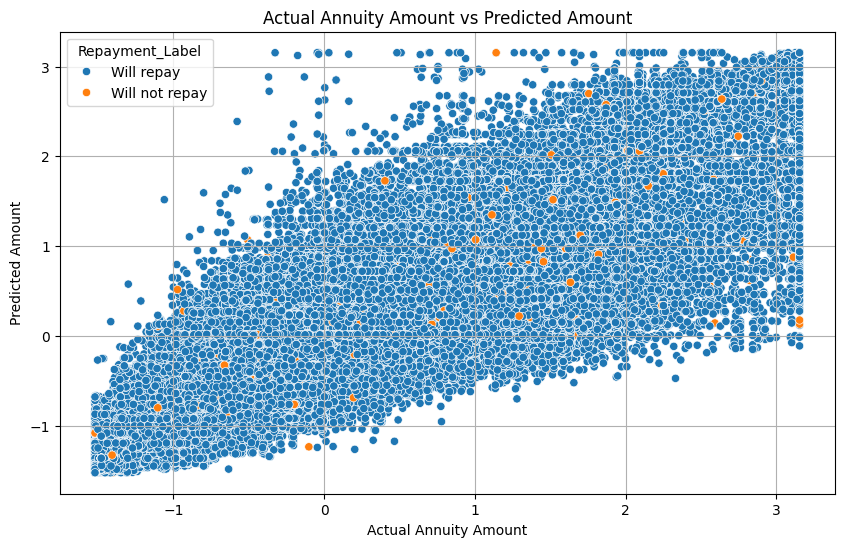

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_ANNUITY', y='Predicted_Amount', data=data, hue='Repayment_Label')
plt.title('Actual Annuity Amount vs Predicted Amount')
plt.xlabel('Actual Annuity Amount')
plt.ylabel('Predicted Amount')
plt.grid(True)
plt.show()

## Histogram: Distribution of Predicted Repayment Amount


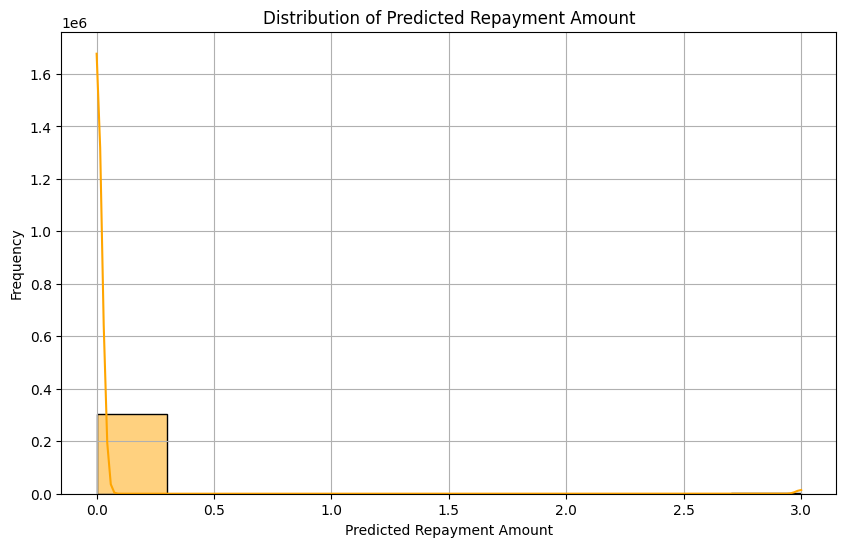

In [ ]:
# Plot 3: Predicted Repayment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Predicted_Repayment'], kde=True, bins=10, color='orange')
plt.title('Distribution of Predicted Repayment Amount')
plt.xlabel('Predicted Repayment Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Check Data Types and Presence of Null Values


In [ ]:
##checking data type of variables and presence of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 210 entries, SK_ID_CURR to Error_Amount
dtypes: float64(206), int64(3), object(1)
memory usage: 492.7+ MB


## Check for Null Values in Each Column


In [ ]:
# Checking for null values.
data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
                      ..
EMPLOYMENT_YEARS       0
Predicted_Amount       0
Predicted_Repayment    0
Repayment_Label        0
Error_Amount           0
Length: 210, dtype: int64

## Calculate Percentage of Null Values for Each Column


In [ ]:
# Calculate the percentage of null values for each column in the DataFrame
data_null_value_percentage = data.isnull().sum() / data.shape[0] * 100

# Display the percentage of null values for each column
data_null_value_percentage

SK_ID_CURR             0.0
TARGET                 0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
                      ... 
EMPLOYMENT_YEARS       0.0
Predicted_Amount       0.0
Predicted_Repayment    0.0
Repayment_Label        0.0
Error_Amount           0.0
Length: 210, dtype: float64

##### OBSERVATIONS
>- From the information of data frame we observe that the column 'OWN_CAR_AGE' is having a large number of null values (greater than 50%), therefore we can remove the column.
>- Columns named  'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_LAST_PHONE_CHANGE' and  'CNT_FAM_MEMBERS' have very less number of null values and these columns contain numeric variables, thus we need to either replace them with mean or median depending on the presence of outliers or drop the rows having null values in the corresponding column if the standard deviation is large. To confirm the presence of outliers, we find the 95th and 99th percentile and compare it with the maximum value.
>- Categorical Columns "NAME_INCOME_TYPE" and "OCCUPATION_TYPE" have less than 50% of null values, but it still has a significant number of null values. In this case we can create another level for missing categorical data, because sometimes it is better to let the missing values be and continue the analysis, as adding the value to data is good but exaggeration is bad.

## Analyze 'CNT_FAM_MEMBERS' Column


In [ ]:
# Analysing 'CNT_FAM_MEMBERS' Column
df_quantile_Family_Members = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                           'values':[data.CNT_FAM_MEMBERS .quantile(0.95), data.CNT_FAM_MEMBERS .quantile(0.99),
                                                     data.CNT_FAM_MEMBERS .max(), data.CNT_FAM_MEMBERS.std(), data.CNT_FAM_MEMBERS.median()]})
df_quantile_Family_Members

statistical terms    values
0     95th percentile  2.058365
1     99th percentile  3.171078
2           max_value  3.171078
3  Standard_Deviation  1.000002
4              median -0.167061

##### OBSERVATIONS
>- Since there is a significant difference between the 95th/99th values and the maximum value, we can conclude that there are outliers in the CNT_FAM_MEMBERS column, and secondly there is no as such deviation in these values.
>- Therefore we can replace the null values with the median.

# Analysing 'AMT_ANNUITY' Column

In [ ]:
# Analysing 'AMT_ANNUITY' Column
df_quantile_AMT_ANNUITY = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[data.AMT_ANNUITY.quantile(0.95), data.AMT_ANNUITY.quantile(0.99),data.AMT_ANNUITY.max(),
                                                  data.AMT_ANNUITY.std(), data.AMT_ANNUITY.median()]})
df_quantile_AMT_ANNUITY

statistical terms    values
0     95th percentile  1.931939
1     99th percentile  3.153623
2           max_value  3.153623
3  Standard_Deviation  1.000002
4              median -0.149569

##### OBSERVATIONS
>- Since there is a significant difference between the 95th/99th values and the maximum value, we can conclude that there are outliers in the AMT_ANNUITY column.
>- Since the standard deviation is large, the data is widely spread.
>- In such conditions it is advisable to remove the rows with null values in the corresponding columns.

# Description of 'AMT_GOODS_PRICE' Column

In [ ]:
# Description of 'AMT_GOODS_PRICE' Column
df_quantile_AMT_GOODS_PRICE = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[data.AMT_GOODS_PRICE.quantile(0.95), data.AMT_GOODS_PRICE.quantile(0.99),data.AMT_GOODS_PRICE.max(),
                                                  data.AMT_GOODS_PRICE.std(), data.AMT_GOODS_PRICE.median()]})
df_quantile_AMT_GOODS_PRICE

statistical terms    values
0     95th percentile  2.124615
1     99th percentile  3.493524
2           max_value  3.493524
3  Standard_Deviation  1.000002
4              median -0.239864

##### OBSERVATIONS
>-  Since there is a significant difference between the 99th values and the maximum value, we can conclude that there are outliers in the AMT_GOODS_PRICE column and secondly there is higher deviation in values since standard deviation is large.<br>
>- We can remove the rows with null values in corresponding columns.

# Description of 'DAYS_LAST_PHONE_CHANGE' Column

In [ ]:
# Description of 'DAYS_LAST_PHONE_CHANGE' Column
df_quantile_DAYS_LAST_PHONE_CHANGE = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[data.DAYS_LAST_PHONE_CHANGE.quantile(0.95), data.DAYS_LAST_PHONE_CHANGE.quantile(0.99),data.DAYS_LAST_PHONE_CHANGE.max(),
                                                  data.DAYS_LAST_PHONE_CHANGE.std(), data.DAYS_LAST_PHONE_CHANGE.median()]})
df_quantile_DAYS_LAST_PHONE_CHANGE

statistical terms    values
0     95th percentile  1.170151
1     99th percentile  1.170151
2           max_value  1.170151
3  Standard_Deviation  1.000002
4              median  0.248298

##### OBSERVATIONS
>- The standard deviation is high, therefore we cant impute the null values with median.
>- We have also observed that there is only one null value in this column, therefore it is advisable to drop this record.

#Checking the shape of the updated Dataset.

In [ ]:
data.shape

(307511, 210)

# Describing the data

In [ ]:
data.describe()

SK_ID_CURR        TARGET    CODE_GENDER   FLAG_OWN_CAR  \
count  3.075110e+05  3.075110e+05  307511.000000  307511.000000   
mean   2.957601e-17 -5.785806e-17       0.341669       0.340108   
std    1.000002e+00  1.000002e+00       0.474297       0.473746   
min   -1.699526e+00 -2.963415e-01       0.000000       0.000000   
25%   -8.667007e-01 -2.963415e-01       0.000000       0.000000   
50%    2.079416e-04 -2.963415e-01       0.000000       0.000000   
75%    8.659874e-01 -2.963415e-01       1.000000       1.000000   
max    1.698960e+00  3.374485e+00       2.000000       1.000000   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count    307511.000000  3.075110e+05      3.075110e+05  3.075110e+05   
mean          0.693673 -7.433282e-17      1.376671e-16 -1.336581e-16   
std           0.460968  1.000002e+00      1.000002e+00  1.000002e+00   
min           0.000000 -5.860539e-01     -1.458644e+00 -1.328614e+00   
25%           0.000000 -5.860539e-01     -6.453910e-01 -8.338876e-01   
50%           1.000000 -5.860539e-01     -2.279213e-01 -2.115347e-01   
75%           1.000000  8.281639e-01      4.389458e-01  5.426534e-01   
max           1.000000  3.656599e+00      3.691956e+00  3.214086e+00   

        AMT_ANNUITY  AMT_GOODS_PRICE  ...  WALLSMATERIAL_MODE_Wooden  \
count  3.075110e+05     3.075110e+05  ...              307511.000000   
mean  -1.263566e-16     5.451228e-16  ...                   0.017437   
std    1.000002e+00     1.000002e+00  ...                   0.130892   
min   -1.520544e+00    -1.297657e+00  ...                   0.000000   
25%   -7.632120e-01    -8.247613e-01  ...                   0.000000   
50%   -1.495691e-01    -2.398639e-01  ...                   0.000000   
75%    5.603057e-01     3.948120e-01  ...                   0.000000   
max    3.153623e+00     3.493524e+00  ...                   1.000000   

       EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Unknown  \
count           307511.000000                307511.000000   
mean                 0.518446                     0.473983   
std                  0.499660                     0.499323   
min                  0.000000                     0.000000   
25%                  0.000000                     0.000000   
50%                  1.000000                     0.000000   
75%                  1.000000                     1.000000   
max                  1.000000                     1.000000   

       EMERGENCYSTATE_MODE_Yes  DEBT_TO_INCOME     AGE_YEARS  \
count            307511.000000   307511.000000  3.075110e+05   
mean                  0.007570        0.633970  2.104384e-19   
std                   0.086679       20.349841  2.739730e-03   
min                   0.000000    -4198.534032 -4.891680e-03   
25%                   0.000000       -0.490792 -2.280104e-03   
50%                   0.000000        0.572475 -1.801443e-04   
75%                   0.000000        1.391887  2.294246e-03   
max                   1.000000     4268.041432  5.275219e-03   

       EMPLOYMENT_YEARS  Predicted_Amount  Predicted_Repayment   Error_Amount  
count      3.075110e+05     307511.000000        307511.000000  307511.000000  
mean      -8.755104e-20         -0.000271             0.024945       0.000271  
std        2.739730e-03          0.895471             0.272423       0.456459  
min       -5.845574e-03         -1.520544             0.000000      -3.479507  
25%        1.243548e-03         -0.699030             0.000000      -0.253863  
50%        1.261468e-03         -0.096265             0.000000      -0.036477  
75%        1.291471e-03          0.535168             0.000000       0.178707  
max        1.449237e-03          3.153623             3.000000       3.262534  

[8 rows x 209 columns]

## Standardize Columns: 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'


In [ ]:
# Convert 'DAYS_BIRTH', 'DAYS_REGISTRATION', and 'DAYS_ID_PUBLISH' from days to years by taking absolute values and dividing by 365
data["DAYS_BIRTH"] = abs(data["DAYS_BIRTH"]) / 365
data["DAYS_REGISTRATION"] = abs(data["DAYS_REGISTRATION"]) / 365
data["DAYS_ID_PUBLISH"] = abs(data["DAYS_ID_PUBLISH"]) / 365

## STUDY OF OUTLIERS AND DATA DISTRIBUTION

In [ ]:
# Developing a function to plot boxplots:
def box_plot(VAR):
    plt.figure(figsize = [10,5])
    g = sns.catplot(x="TARGET",
    y=VAR,
    kind="box",
    data=data)
    plt.show()

<Figure size 1000x500 with 0 Axes>

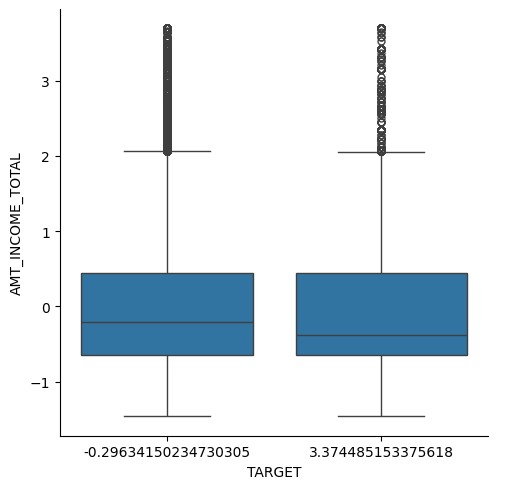

In [ ]:
# BoxPlot for AMT_INCOME_TOTAL
box_plot("AMT_INCOME_TOTAL")

##### OBSERVATIONS
>- We can observe from the above plot that there are outliers, corresponding to both TARGET = 0 and TARGET = 1.
>- In TARGET = 1 there is one extreme value , it is advisable to drop this outlier.
>- AMT_INCOME_TOTAL column is a continuous variable column, therefore we can bin the values without it affecting our analysis.

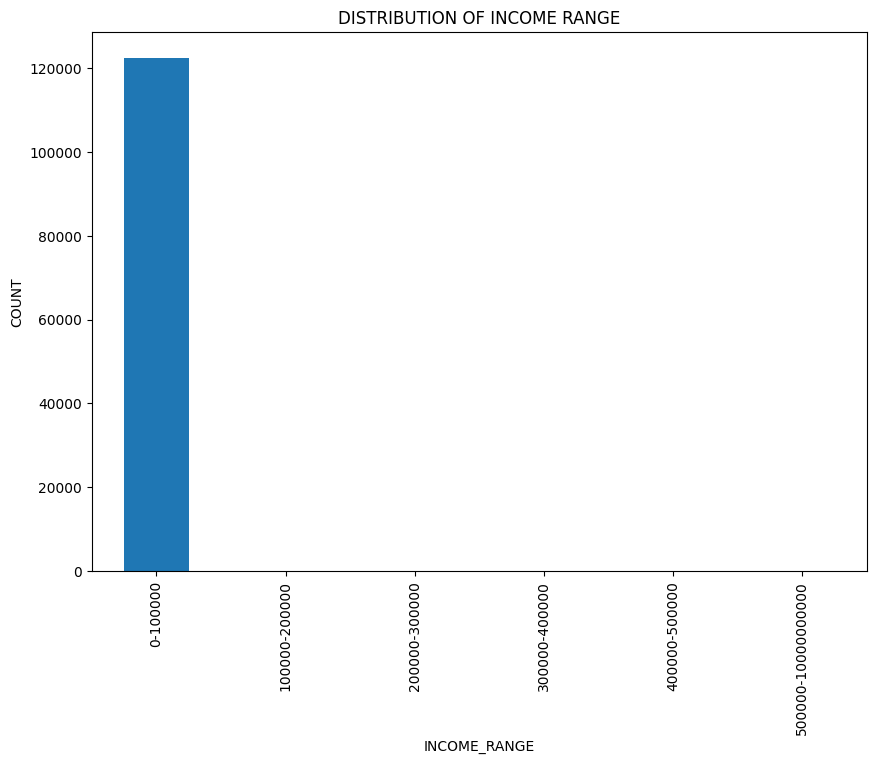

In [ ]:
# Binning the AMT_INCOME_TOTAL data
plt.figure(figsize=[10,7])
data["AMT_INCOME_TOTAL_Range"] = pd.cut(data["AMT_INCOME_TOTAL"], bins= [0,100000,200000,300000,400000,500000,10000000000], labels = ["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-10000000000"]).value_counts().plot(kind = "bar")
plt.xlabel("INCOME_RANGE")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF INCOME RANGE")
plt.show()

##### OBSERVATIONS
>- We can observe that majority of the clients lie in 100000-200000 income range, followed by 200000-300000, followed by 0-100000 etc.

<Figure size 1000x500 with 0 Axes>

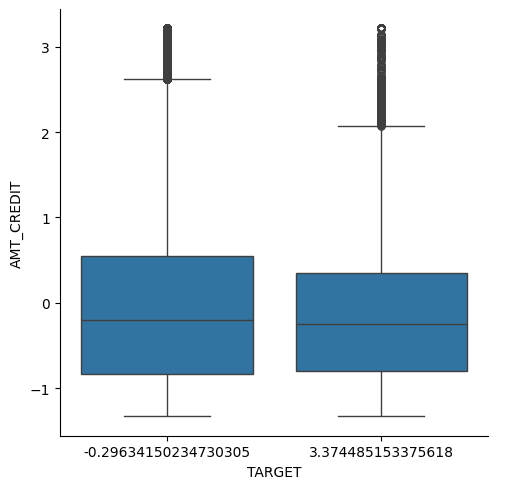

In [ ]:
# BoxPlot for AMT_CREDIT
box_plot("AMT_CREDIT")

##### OBSERVATIONS
>- As we observed previously, AMT_CREDIT is also continuous variable column, therefore we can bin the values without it affecting our analysis.

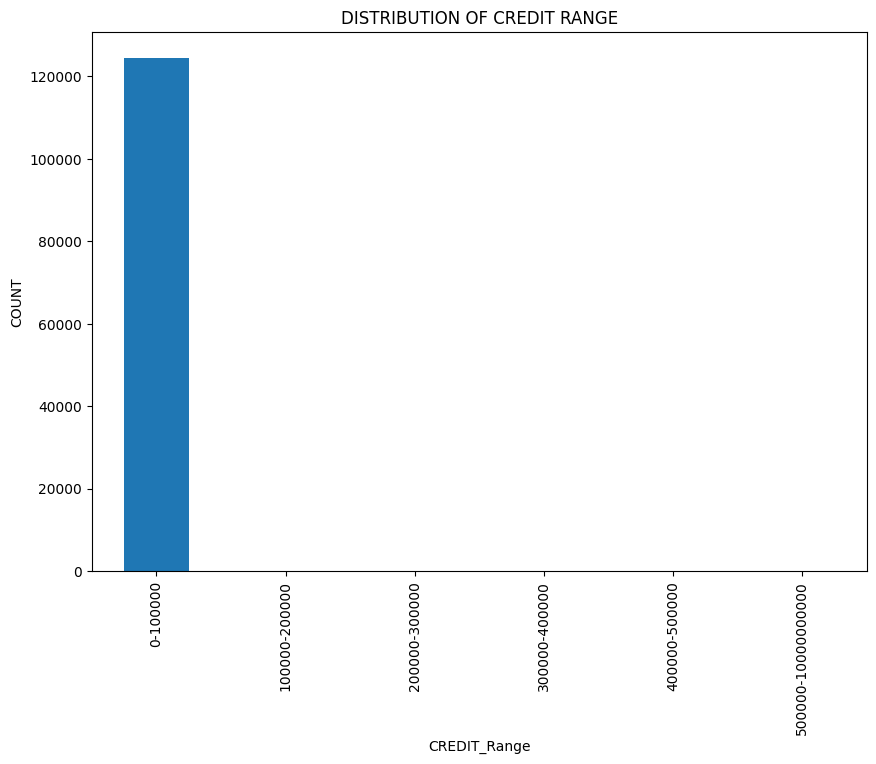

In [ ]:
# Binning the AMT_CREDIT data
plt.figure(figsize=[10,7])
data["AMT_CREDIT_Range"] = pd.cut(data["AMT_CREDIT"], bins= [0,100000,200000,300000,400000,500000,10000000000], labels = ["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-10000000000"]).value_counts().plot(kind = "bar")
plt.xlabel("CREDIT_Range")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF CREDIT RANGE")
plt.show()

##### OBSERVATIONS
>- Most if the clients lie in the credit range of 500000-Highest credit value, followed by 200000-300000, and 400000-500000.

<Figure size 1000x500 with 0 Axes>

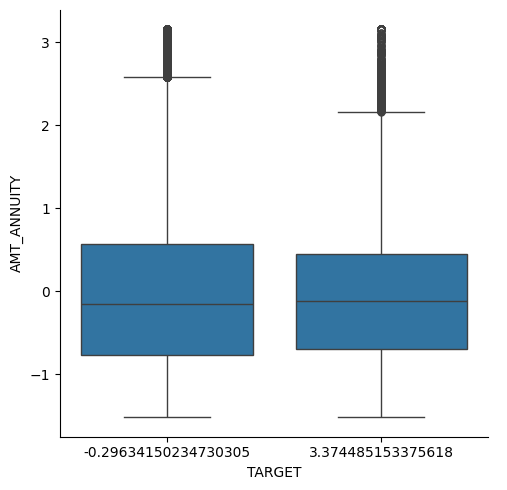

In [ ]:
# BoxPlot for AMT_ANNUITY
box_plot("AMT_ANNUITY")

##### OBSERVATIONS
>- AMT_ANNUITY is a continuous variable column as well, therefore we can proceed by binning the values.
>- We can't just impute the values like mean/median, as this may deviate the result of our analysis.

<Figure size 1000x500 with 0 Axes>

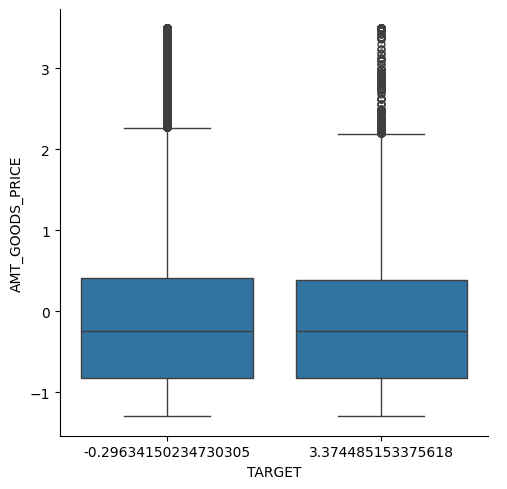

In [ ]:
# BoxPlot for AMT_GOODS_PRICE
box_plot("AMT_GOODS_PRICE")

##### OBSERVATIONS
>- AMT_GOODS_PRICE is a continuous variable column as well, therefore we can proceed by binning the values.
>- We can't just impute the values like mean/median, as this may deviate the result of our analysis.

<Figure size 1000x500 with 0 Axes>

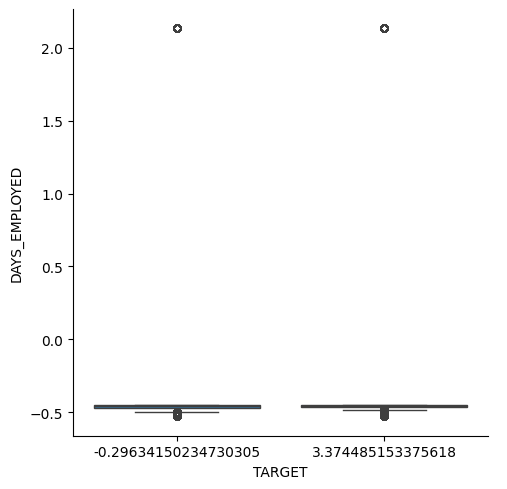

In [ ]:
# BoxPlot for DAYS_EMPLOYED
box_plot("DAYS_EMPLOYED")

###### OBSERVATIONS
>- We can observe that extreme outliers are present in the DAYS_EMPLOYED column.
>- The data seems to be incorrect as it is impossible that days employed for a client is 350000 which is approximately equal to 958 years.
>- Outliers are present due to errors made while entering the values.
>- We have to observe the count of the outliers, if there are more number of such observations then it is better to remove the column, and if there are only a few outliers spotted, then we can impute the outliers value with median value.

<Figure size 1000x500 with 0 Axes>

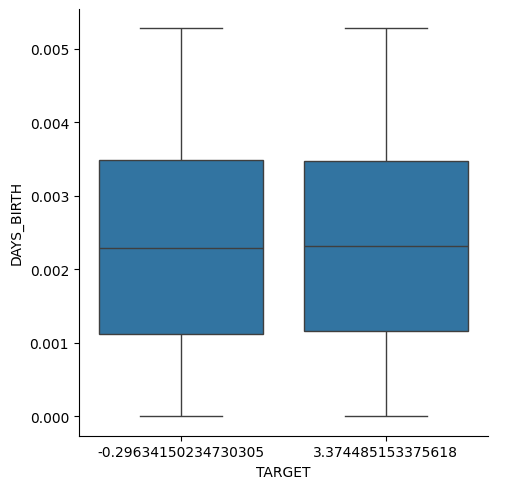

In [ ]:
# BoxPlot for AMT_GOODS_PRICE
box_plot("DAYS_BIRTH")

###### OBSERVATIONS
>- The above data has been converted from days to years.
>- It is clearly evident that no outliers are present in the DAYS_BIRTH data.
>- Since the median and IQR is lower for TARGET=1 , we can conclude that younger clients are more likely to default.

<Figure size 1000x500 with 0 Axes>

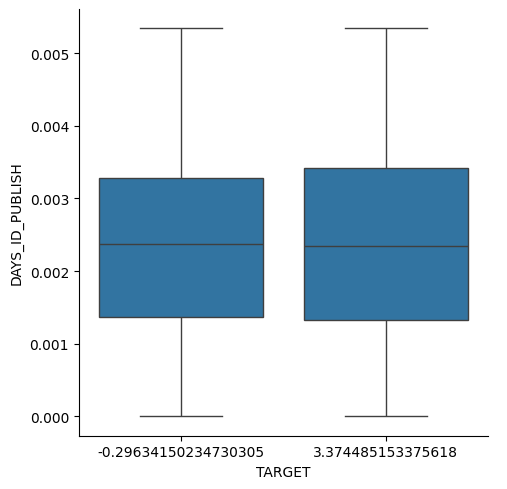

In [ ]:
# BoxPlot for AMT_GOODS_PRICE
box_plot("DAYS_ID_PUBLISH")

###### OBSERVATIONS
>- It is clearly evident that no outliers are present in the DAYS_ID_PUBLISH data.

## ANALYSING THE APPLICATION DATA

In [ ]:
# Checking the data imbalance
data.TARGET.value_counts(normalize= True)

TARGET
-0.296342    0.919271
 3.374485    0.080729
Name: proportion, dtype: float64

###### OBSERVATIONS
>-  The data is highly imbalanced, where 91.9% of 'TARGET' variable is 0 (other cases/no difficulty) and 8.1% of 'TARGET' variable is 1(difficulty in repaying)

## UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

In [ ]:
print(data.dtypes)

SK_ID_CURR                float64
TARGET                    float64
CODE_GENDER                 int64
FLAG_OWN_CAR                int64
FLAG_OWN_REALTY             int64
                           ...   
Predicted_Repayment       float64
Repayment_Label            object
Error_Amount              float64
AMT_INCOME_TOTAL_Range     object
AMT_CREDIT_Range           object
Length: 212, dtype: object


In [ ]:
# # Developing a function to perform efficient univariate analysis of categorical variables:
# def bar_plot(column_name, hori = True ,rot = False):
#     variable = data[Attribute].value_counts(normalize = True)
#     Variable_Data_Percentage = data.groupby(data[Attribute]).mean()
#     Variable_Data_plot = Variable_Data_Percentage['TARGET']
#     if hori:
#         plt.figure(figsize=[15,7])
#         plt.subplot(1,2,1)
#         sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
#         plt.xlabel(Attribute)
#         plt.ylabel("Percentage of Applicants")
#         if rot:
#             plt.xticks(rotation = 90)
#         plt.subplot(1,2,2)
#         sns.barplot(x = Variable_Data_plot.index, y = Variable_Data_plot.values, palette= 'magma')
#         plt.xlabel(Attribute)
#         plt.ylabel("Percentage of clients having difficulty in repaying loan")
#         if rot:
#             plt.xticks(rotation = 90)
#         plt.show()
#     else:
#         plt.figure(figsize=[14,20])
#         plt.subplot(2,1,1)
#         sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
#         plt.xlabel(Attribute)
#         plt.ylabel("Percentage of Applicants")
#         if rot:
#             plt.xticks(rotation = 90)

#         plt.subplot(2,1,2)
#         sns.barplot(x =  Variable_Data_plot.index, y =  Variable_Data_plot.values, palette= 'magma')
#         plt.xlabel(Attribute)
#         plt.ylabel("Percentage of clients having difficulty in repaying loan")
#         if rot:
#             plt.xticks(rotation = 90)
#         plt.show()

## Define Function to Plot Bar Charts for Categorical Columns


In [ ]:
def bar_plot(column_name, hori=True, rot=False):
    """
    Generate a bar plot for a given categorical column in the DataFrame.

    Parameters:
    - column_name (str): The name of the column to plot.
    - hori (bool): If True, the plot will be horizontal; otherwise, vertical. Default is True.
    - rot (bool): If True, rotate x-axis labels by 45 degrees. Default is False.
    """
    plt.figure(figsize=(10, 6))

    # Create a horizontal or vertical bar plot based on the 'hori' parameter
    if hori:
        sns.countplot(y=column_name, data=data, palette='viridis')
    else:
        sns.countplot(x=column_name, data=data, palette='viridis')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')

    # Rotate x-axis labels if 'rot' is True
    if rot:
        plt.xticks(rotation=45)

    plt.show()

### From the above plots the following inferences can be made:
1. Major portion of the clients have opted for Cash loans(Approximately 85-90%), whereas 10-15% have opted for Revolving loans.
2. The mean for Cash loans is approximately 8.5%, whereas for revolving loans it is approximately 5.5%. This shows that the clients who have opted for cash loans are more likely to default.

<ipython-input-74-7cfd79a0be42>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='viridis')


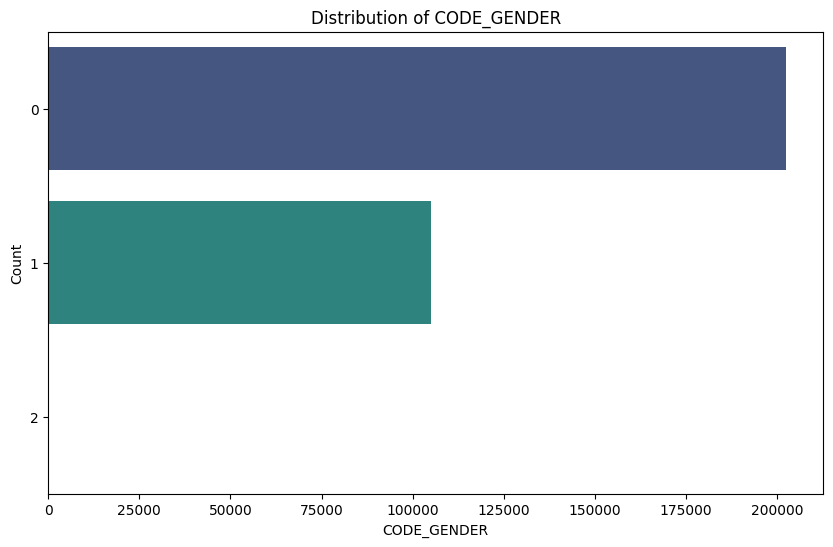

In [ ]:
# BarPlots for CODE_GENDER
bar_plot('CODE_GENDER')

### From the above plots the following inferences can be made:
1. There are considerably more female clients (approximately 65%) than male clients (approximately 35%)
2. Male clients are more likely to default (approximately 10%) when compared to female clients (approximately 7%)

<ipython-input-74-7cfd79a0be42>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='viridis')


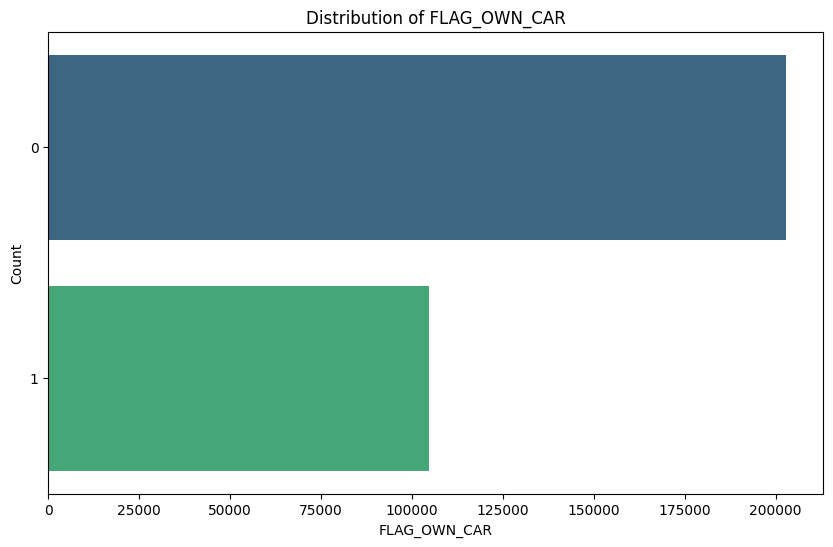

In [ ]:
# BarPlots for FLAG_OWN_CAR
bar_plot("FLAG_OWN_CAR")

### From the above plots the following inferences can be made:

1. Majority of the loan clients do not own a car (approximately 65-70%), whereas approximately 30-35% of them own one or more cars.
2. The clients who do not own a car are more likely to default (approximately 8.5%) than the clients who own one or more cars (approximately 7%)

<ipython-input-74-7cfd79a0be42>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='viridis')


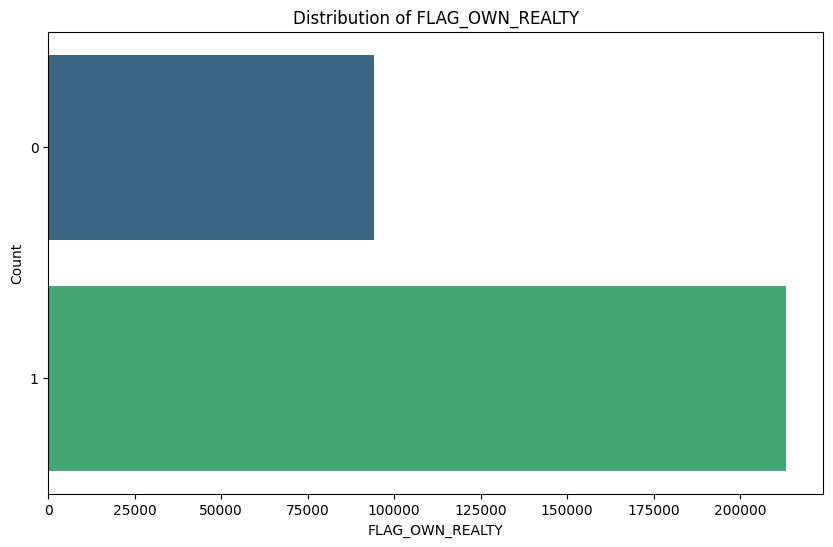

In [ ]:
# BarPlots for FLAG_OWN_REALTY
bar_plot("FLAG_OWN_REALTY")

### From the above plots the following inferences can be made:
1. Majority of the clients own realty (approximately 70%), whereas approximately 30% of them do not own realty.
2. Surprisingly the clients who own realty have a higher chance of not returning their loans (approximately 5.5%) as opposed to clients who do not own realty (approximately 2.5%)

<ipython-input-74-7cfd79a0be42>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='viridis')


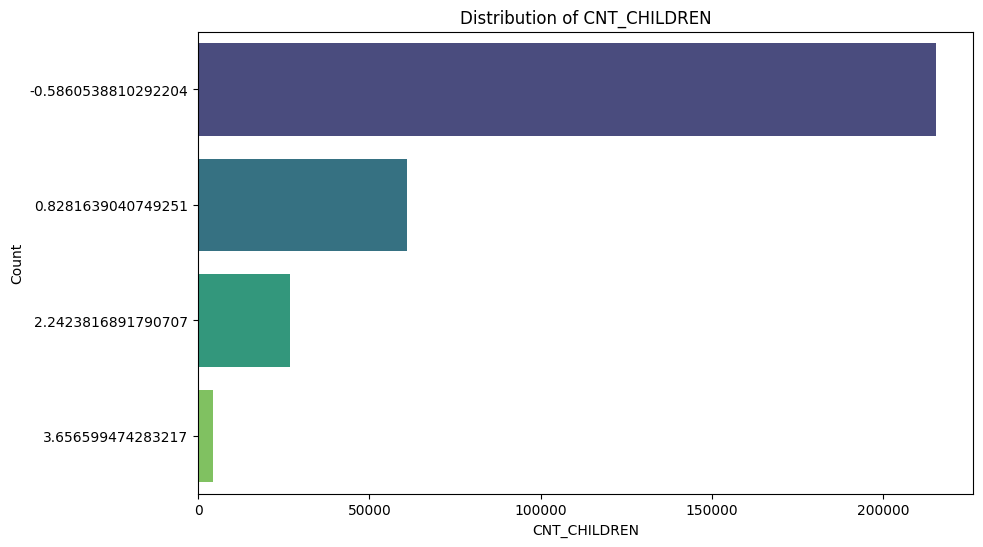

In [ ]:
# BarPlots for CNT_CHILDREN
bar_plot("CNT_CHILDREN")

### From the above plots the following inferences can be made:
1. Majority of the clients do not have children (approximately 70%), and about 20% of the applicants have 1 child and less than 10% of the clients have 2 children.
2. Looks like the chances of not repaying the loan increases with the number of children the clients has. And the clients who have 9 or 11 children have approximately 100% chance of defaulting.

In [ ]:
# BarPlots for NAME_TYPE_SUITE
bar_plot("NAME_TYPE_SUITE", rot = True)

ValueError: Could not interpret value `NAME_TYPE_SUITE` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### From the above plots the following inferences can be made:
1. Most of the clients were unaccompanied while applying for the loan (~80%), about 10-15% of the clients were with their families while applying, about 5% of them were accompanied by their spouse.
2. Approximately all these categories have the same default rate, therefore the people who accompany the client while applying for the loan does not play a big role in deciding whether he/she defaults the loan.

In [ ]:
print(data.columns)

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'EMERGENCYSTATE_MODE_Yes', 'DEBT_TO_INCOME', 'AGE_YEARS',
       'EMPLOYMENT_YEARS', 'Predicted_Amount', 'Predicted_Repayment',
       'Repayment_Label', 'Error_Amount', 'AMT_INCOME_TOTAL_Range',
       'AMT_CREDIT_Range'],
      dtype='object', length=212)


[1 0 2]


<ipython-input-74-7cfd79a0be42>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='viridis')


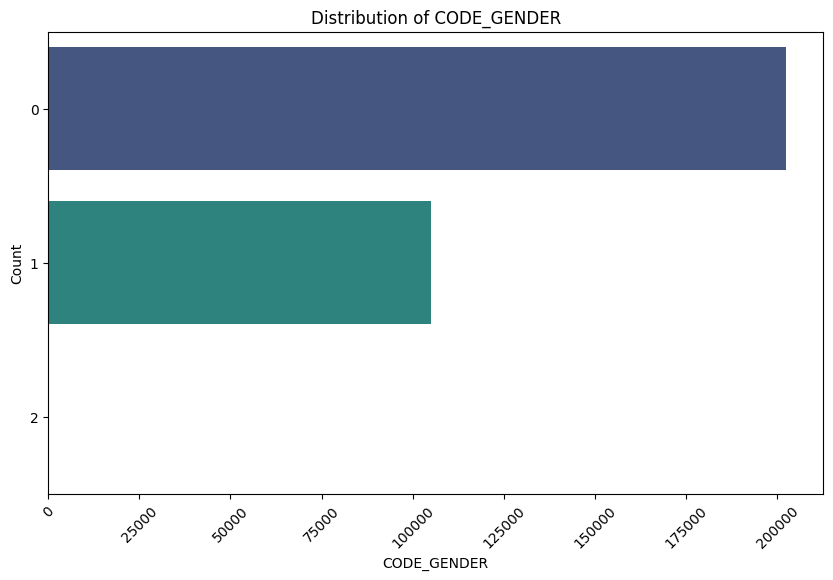

In [ ]:
# Check unique values of a column to understand its distribution
print(data['CODE_GENDER'].unique())

# Generate bar plot for 'CODE_GENDER'
bar_plot("CODE_GENDER", rot=True)

### From the above plots the following inferences can be made:
1. More than half of the clients are working, about 20-25% are commercial associates, nearly 20% are pensioners and nearly 10% are state servants.
2. Clients who are on maternity leave and unemployed clients are most likely to default (approximately 35-40%), the remaining income types have around 10% chance of defaulting.

In [ ]:
if 'NAME_EDUCATION_TYPE' in data.columns:
    bar_plot("NAME_EDUCATION_TYPE", rot=True)
else:
    print("'NAME_EDUCATION_TYPE' column is not available in the DataFrame.")


'NAME_EDUCATION_TYPE' column is not available in the DataFrame.


### From the above plots the following inferences can be made:
1. Majority of the clients have completed Secondary education (~70%), followed by clients who have completed higher education (about 25%), followed by incomplete higher education and lower secondary education.
2. Clients who have have completed lower secondary education are most likely to default (around 10%), followed by incomplete higher (around 8%) and secondary education (around 8%), and the clients who have an academic degree are least likely to default (nearly 2%)

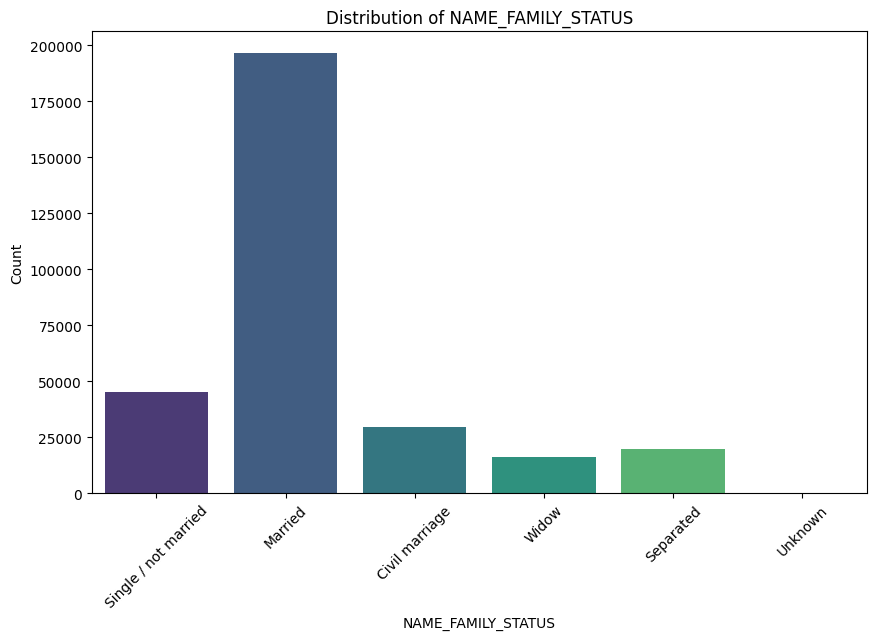

In [ ]:
# BarPlots for NAME_FAMILY_STATUS
bar_plot("NAME_FAMILY_STATUS", rot = True)

### From the above plots the following inferences can be made:
1. More than half of the clients are married (~60%), about 15% of the clients are not married, and about 10% of the clients have undergone civil marriage followed by separated and widows.
2. Single clients and clients who have undergone civil marriage are mosy likely to defualt (nearly 10%), followed by separated and married clients (approximately 8%) and widows have the least default rate of around 6%.

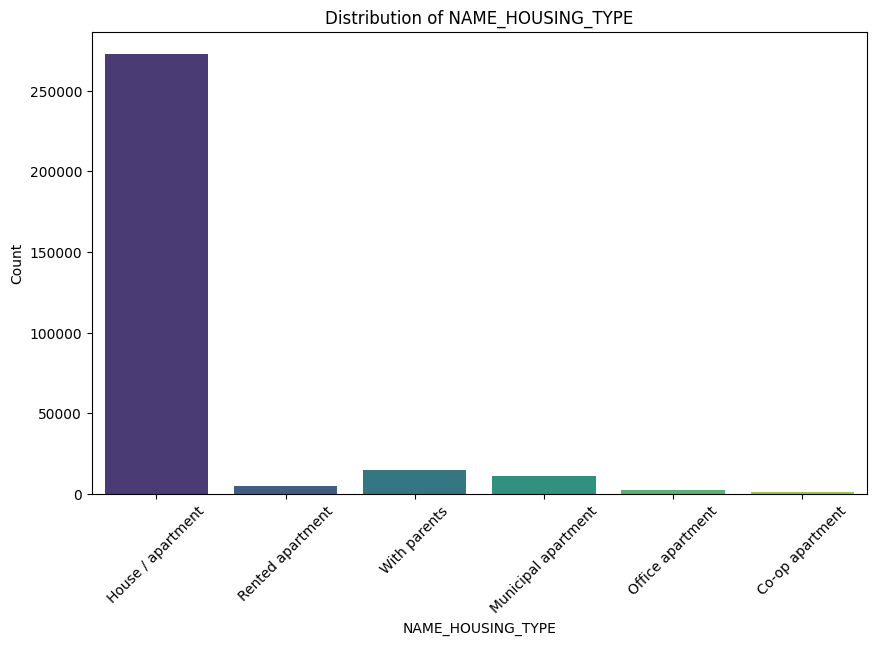

In [ ]:
# BarPlots for NAME_HOUSING_TYPE
bar_plot("NAME_HOUSING_TYPE", rot = True)

### From the above plots the following inferences can be made:
1. Almost 90% of the clients live in a House/apartment, followed by living with parents, municipal apartment etc.
2. Clients who live in a rented apartment have the highest default rate of around 12%, followed by clients living with parents (almost 12%), followed by municipal apartments etc.

<ipython-input-11-c3af7782494d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=data, palette='viridis')


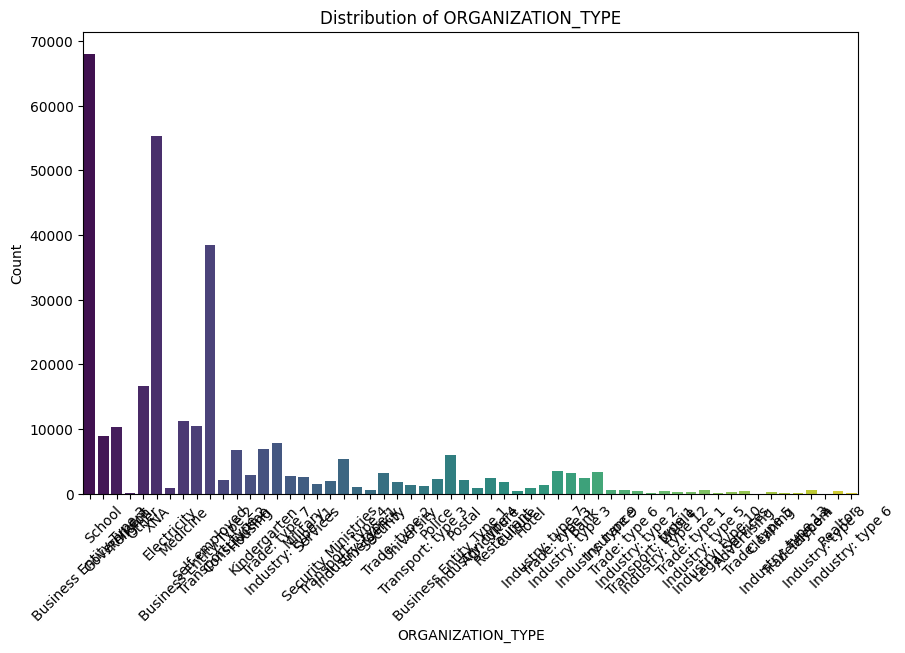

In [ ]:
# BarPlots for ORGANIZATION_TYPE
bar_plot("ORGANIZATION_TYPE",hori = False, rot = True)

### From the above plots the following inferences can be made:
1. Most of the clients belong to Business Entity Type-3 (arount 20%), followed by self employed ( around 12%) etc.
2. As we can see Transport type 3 has the highest default rate of nearly 16%, followed by Industry type 13 (around 13%) and Industy type 8 (around 12%).

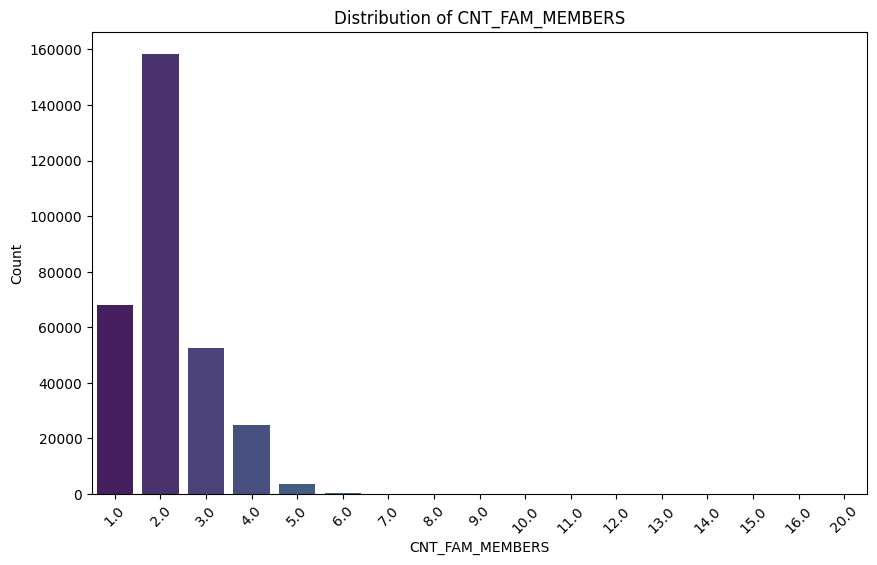

In [ ]:
# BarPlots for CNT_FAM_MEMBERS
bar_plot("CNT_FAM_MEMBERS")

### From the above plots the following inferences can be made:
1. Clients with family members of 2 are the top category (approximately 50%), followed by 1 (single people), 3 ( probably families with 1 child) and 4 family members.
2. Looks like the default rate increases with the increase in family members, also clients with 11 and 13 family members have 100% default rate.

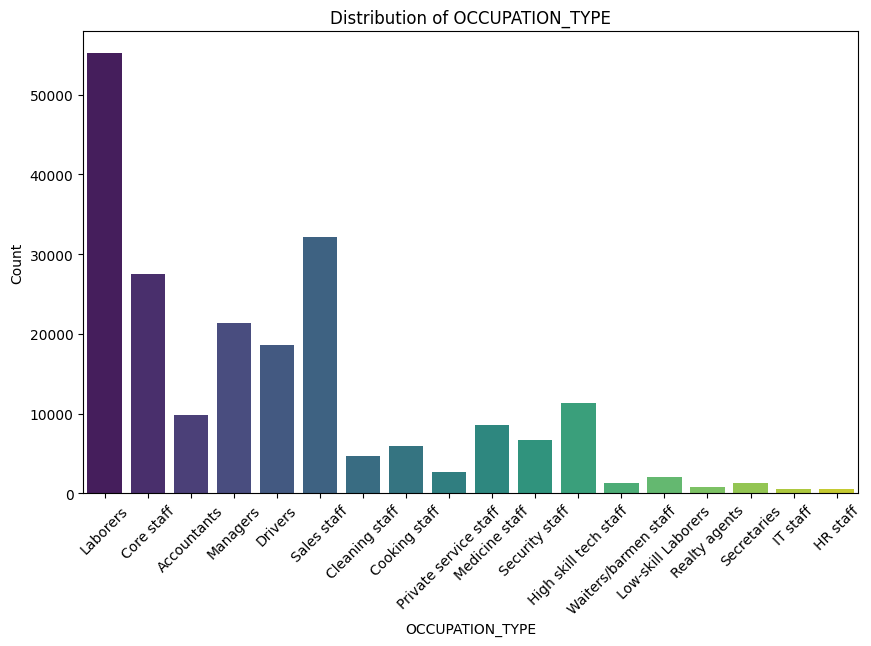

In [ ]:
# BarPlots for OCCUPATION_TYPE
bar_plot("OCCUPATION_TYPE", rot = True)

### From the above plots the following inferences can be made:
1. Most of the clients are Laborers(approximatey 25%), followed by Sales staff, Core staff, Managers etc. IT staff take the least number of loans.
2. Low-skill labourers have the highest default rate, followed by Drivers, Waiters/barmen staff, Security staff, Laborers, Cooking staff, sales staff, cleaning staff etc.

## Univariate analysis of continuous variables

In [ ]:
# Segmenting the data based on the TARGET variable
target_0 = data.loc[data['TARGET'] == 0]
target_1 = data.loc[data['TARGET'] == 1]

In [ ]:
# Developing a function to analyse continuous variables
def distribution_plot(Attribute):

    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
    plt.ylabel("Frequency")
    plt.subplot(1,2,2)
    sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
    sns.distplot(target_1[Attribute], bins = 50, kde = True, rug = True, hist = False, label= 'TARGET = 1')
    plt.ylabel("Frequency")
    plt.show()

<ipython-input-88-b97f78f18bfb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
<ipython-input-88-b97f78f18bfb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= Tru

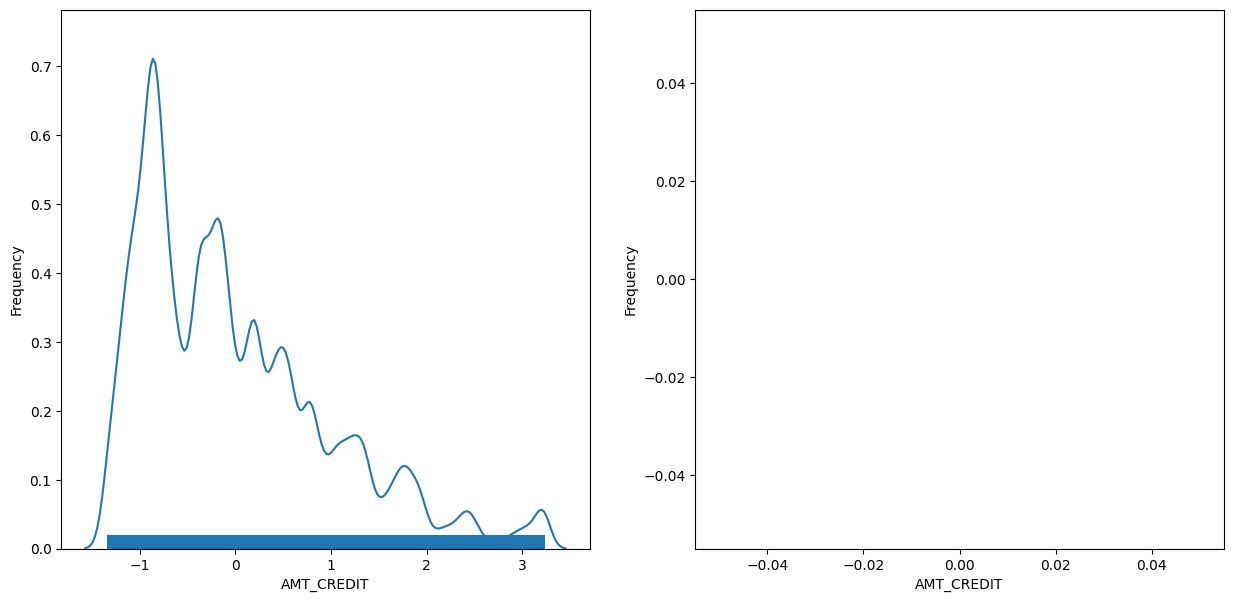

In [ ]:
# DistPlots for AMT_CREDIT
distribution_plot('AMT_CREDIT')

### From the above plots the following inferences can be made:
1. The credit amount of the loan lies mostly around 200000-1000000 for both, client with payment difficulties(TARGET=1) and all other cases(TARGET=0).

<ipython-input-88-b97f78f18bfb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
<ipython-input-88-b97f78f18bfb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= Tru

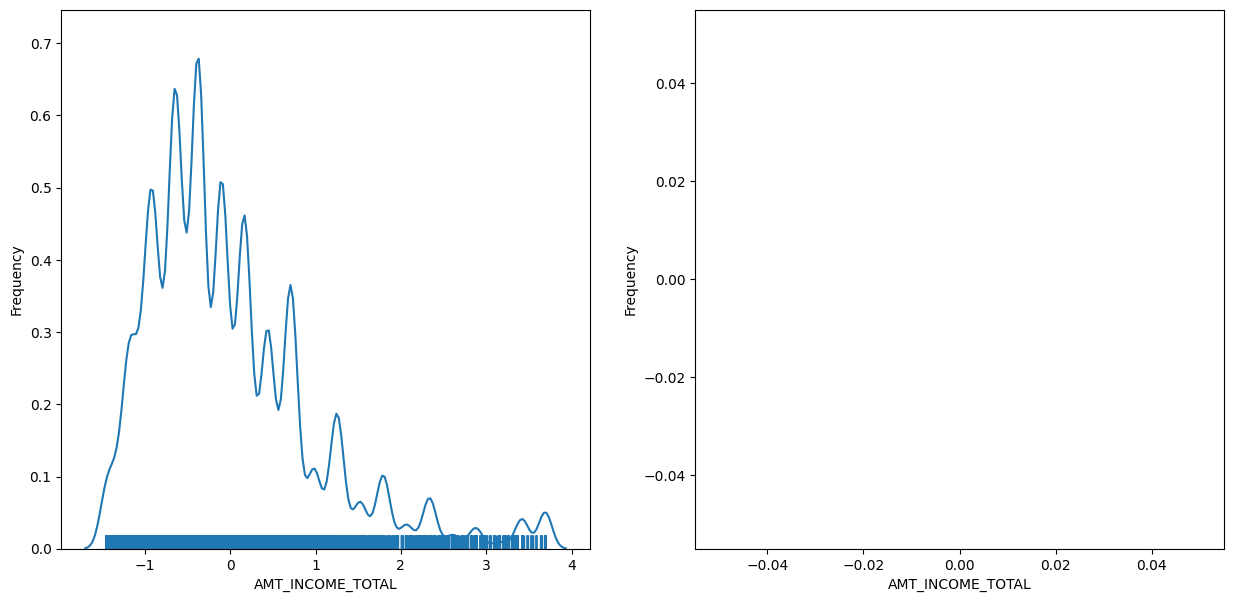

In [ ]:
# DistPlots for AMT_INCOME_TOTAL
distribution_plot('AMT_INCOME_TOTAL')

### From the above plots the following inferences can be made:
1. The income of clients of both target types mostly lie at around 10000000. We can see some outliers as well.


<ipython-input-88-b97f78f18bfb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
<ipython-input-88-b97f78f18bfb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= Tru

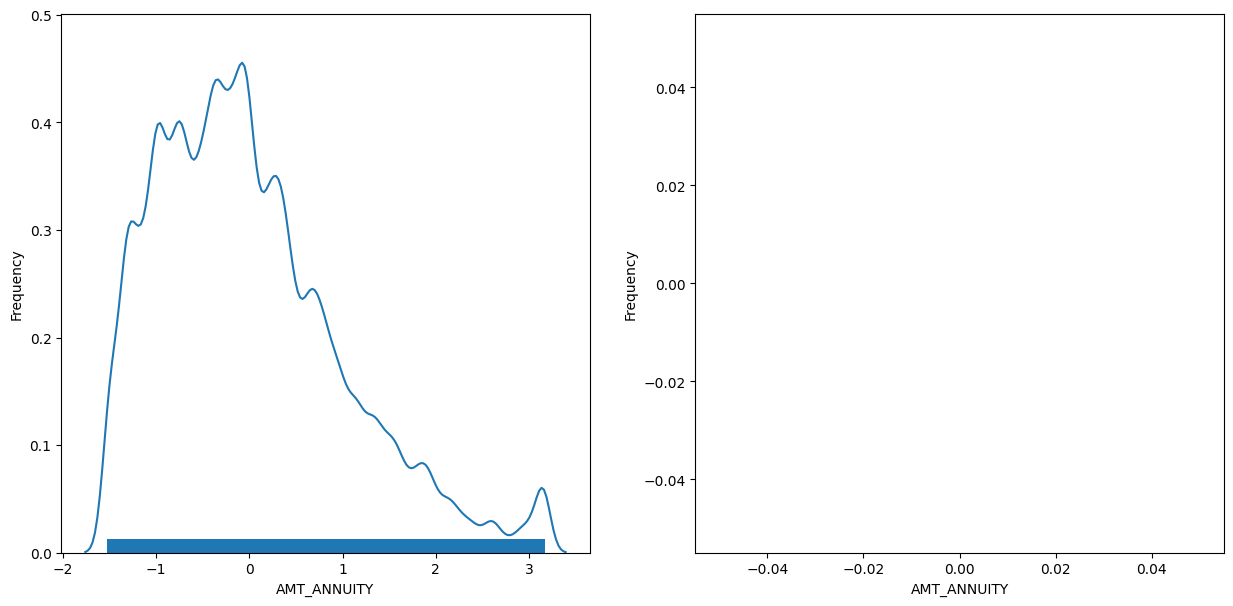

In [ ]:
# DistPlots for AMT_ANNUITY
distribution_plot('AMT_ANNUITY')

### From the above plots the following inferences can be made:
1. The annuity amount seems to be similar for both target types, they are concentrated at around 50000.

<ipython-input-88-b97f78f18bfb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
<ipython-input-88-b97f78f18bfb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= Tru

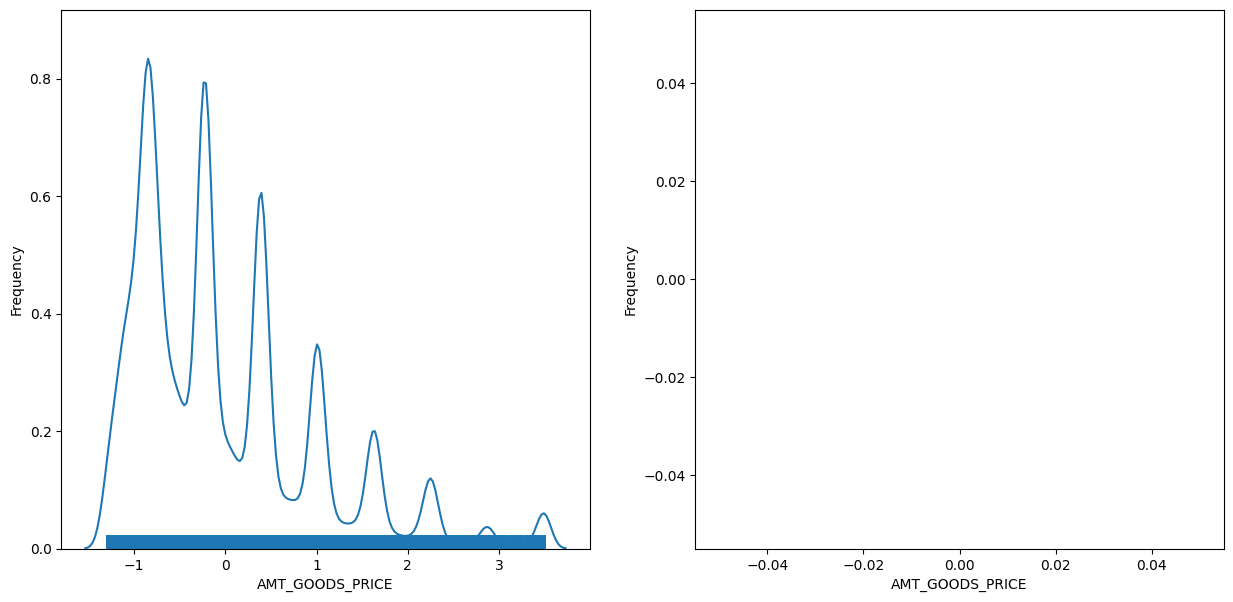

In [ ]:
# DistPlots for AMT_GOODS_PRICE
distribution_plot("AMT_GOODS_PRICE")

### From the above plots the following inferences can be made:
1. The goods for which the clients have received loan are mostly concentrated between 200000-1000000

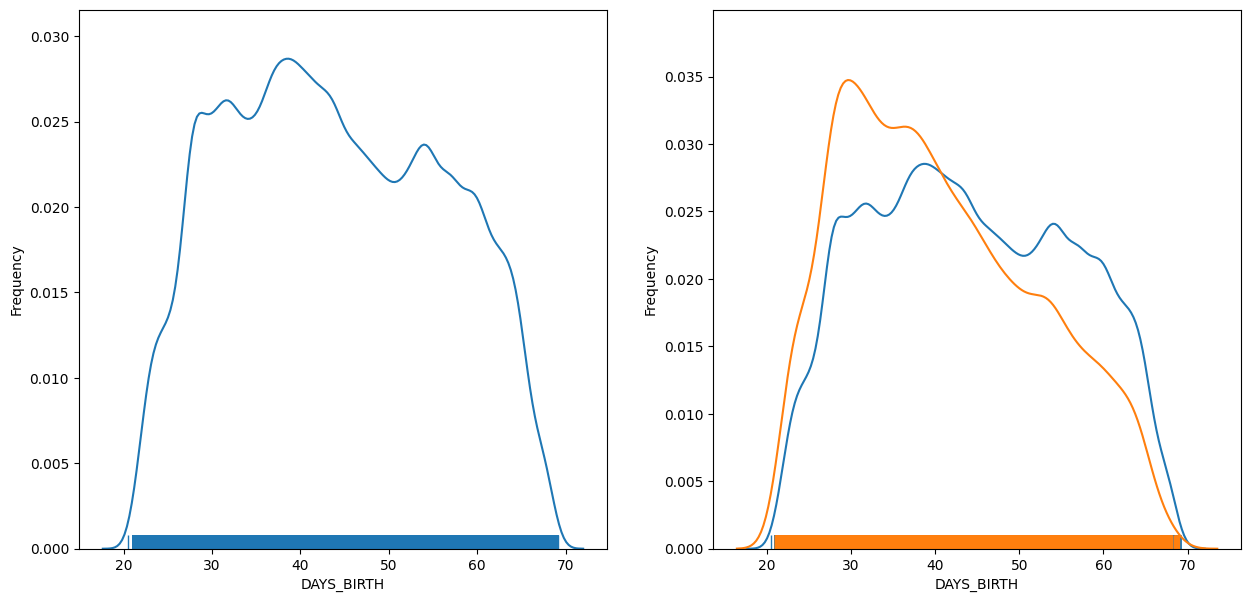

In [ ]:
# DistPlots for DAYS_BIRTH
distribution_plot("DAYS_BIRTH")

### From the above plots the following inferences can be made:
1. We have converted the above plot from days to years for better analysis.
2. When we see the entire dataset inclusing both the target types we see that we have clients of all ages, with the most number of customers around 40 years old.
3. When we compare for the two target types, we see that the clients who have difficulty in payment are relatively younger and most of them lie at around 27 years old. Therefore the younger population have the highest default rate.

<ipython-input-88-b97f78f18bfb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
<ipython-input-88-b97f78f18bfb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= Tru

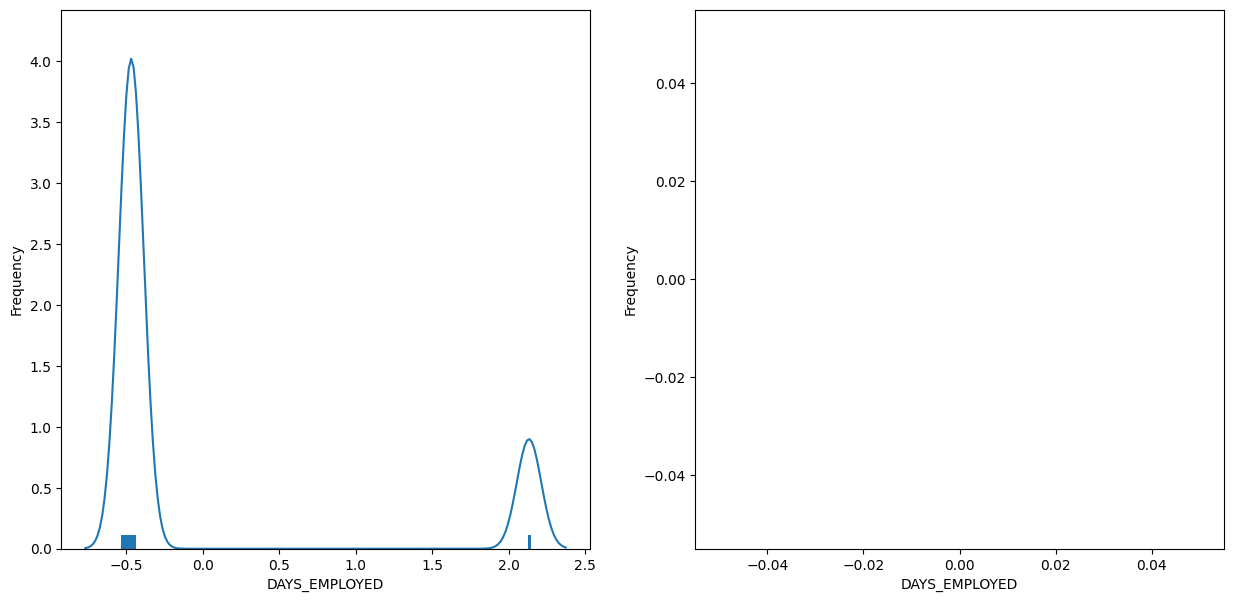

In [ ]:
# DistPlots for DAYS_EMPLOYED
distribution_plot("DAYS_EMPLOYED")

### From the above plots the following inferences can be made:
1. This data seems to be unreliable due the large number of people who are employed for more than 100 years, and the negative values might suggest that those clients are unemployed.

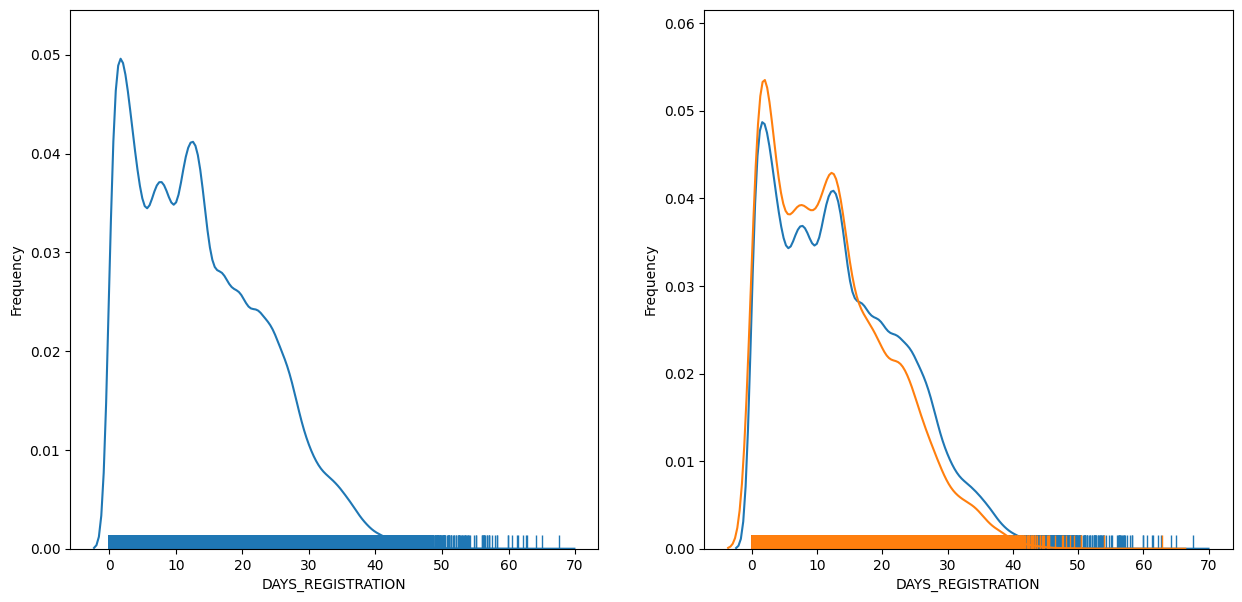

In [ ]:
# DistPlots for DAYS_REGISTRATION
distribution_plot('DAYS_REGISTRATION')

### From the above plots the following inferences can be made:
1. The above data has been converted from days to years for better analysis.
2. Looks like majority of the clients changed their registration in the early stages.
3. The distribution is similar for both target types.

<ipython-input-88-b97f78f18bfb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[Attribute], bins= 50, kde= True, rug = True, hist = False)
<ipython-input-88-b97f78f18bfb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[Attribute], bins = 50, kde = True, rug= Tru

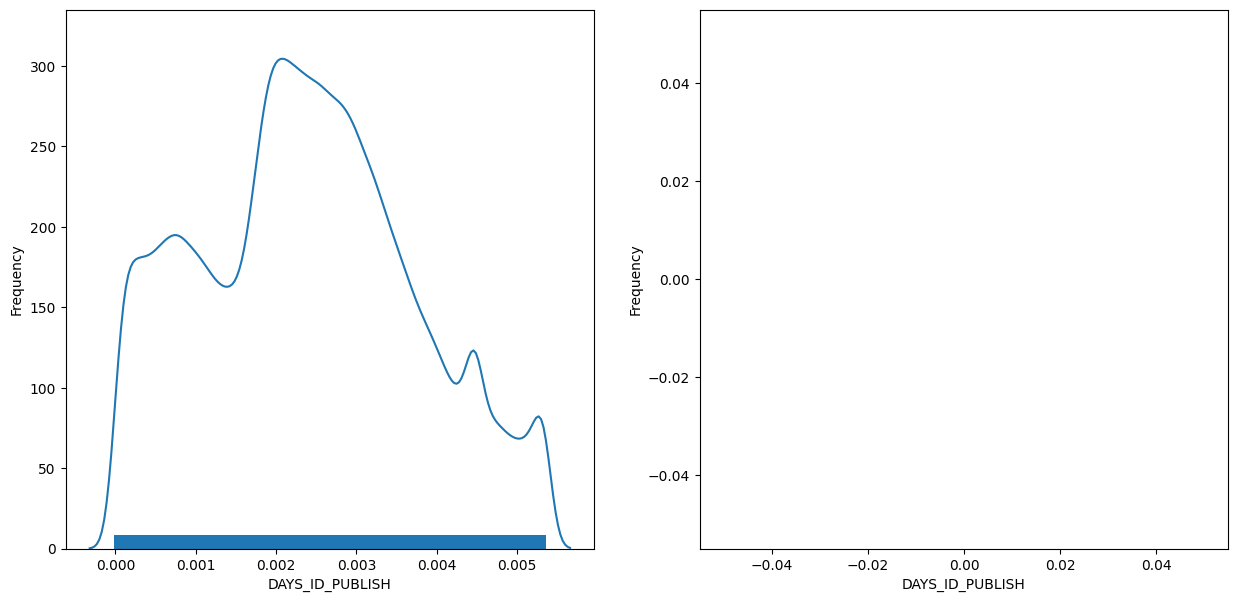

In [ ]:
# DistPlots for DAYS_ID_PUBLISH
distribution_plot("DAYS_ID_PUBLISH")

   ## BIVARIATE ANALYSIS

## NUMERICAL TO NUMERICAL ANALYSIS

In [ ]:
##Defining new data frame for numeric-numeric analysis
data_T1 = data[data["TARGET"] == 1]
data_T0 = data[data['TARGET'] == 0]
data_numeric_corr_T0 = data_T0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr()
data_numeric_corr_T1 = data_T1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr()

In [ ]:
# Heatmap to visualize the correlation between numeric variables for TARGET = 0
plt.figure(figsize = [15,7])
sns.heatmap(data_numeric_corr_T0, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 15})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 15})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 0",fontdict={"fontsize": 20} )
plt.show()

### From the above heatmap(for TARGET=0) the following inferences can be made:
1. Credit amount and Goods price amount have the highest correlation of 0.99, which is fairly obvious since the client is opting for a loan equal to the price of his goods.
2. Annuity ammount and goods price amount have a correlation of 0.78. Since the annuity is decided by the price of the goods (credit amount).
3. Credit amount and annuity amount have a correlation of 0.77. As the annuity amount depends on the credit amount.
4. Income amount and annuity amount has a correlation of 0.42. Annuity might be decided based on the income of the client.
5. Correlation between the income amount and credit amount is pretty good (0.34) and also between annuity amount and income amount(0.42), might be the reasons why these clients are able to repay their loans.

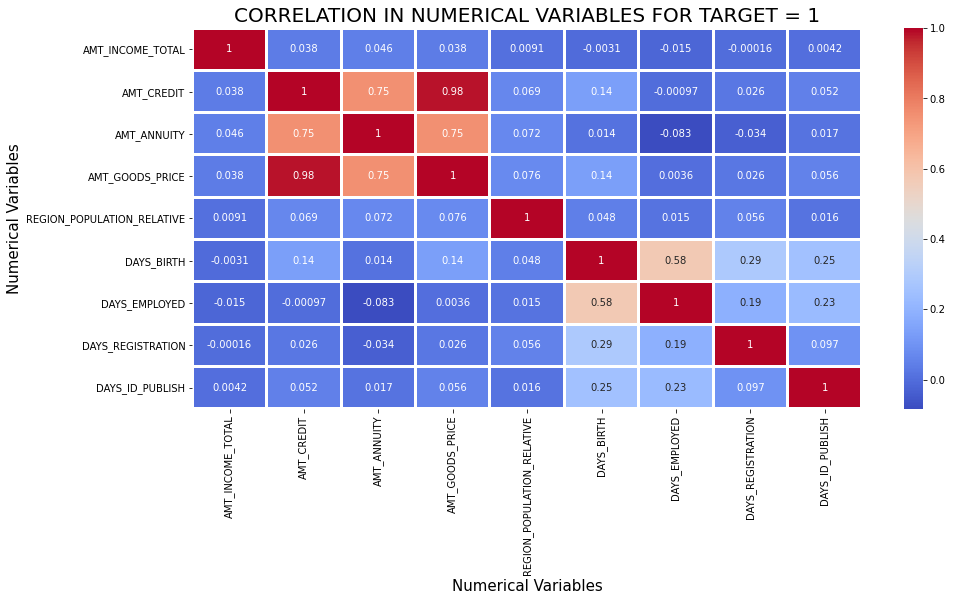

In [ ]:
# Heatmap to visualize the correlation between numeric variables for TARGET = 1
plt.figure(figsize = [15,7])
sns.heatmap(data_numeric_corr_T1, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 15})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 15})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 1",fontdict={"fontsize": 20} )
plt.show()

### From the above heatmap(for TARGET=1) the following inferences can be made:
1. Credit amount and Goods price amount have the highest correlation of 0.98, which is fairly obvious since the client is opting for a loan equal to the price of his goods.
2. Annuity ammount and goods price amount have a correlation of 0.75. Since the annuity is decided by the price of the goods (credit amount).
3. Credit amount and annuity amount have a correlation of 0.75. As the annuity amount depends on the credit amount.
4. Correlation between the income amount and credit amount is very less (0.038) and also between annuity amount and income amount(0.046), might be the reasons for difficulty in repaying.

## NUMERICAL TO CATEGORICAL ANALYSIS

In [ ]:
#Defining a function for numerical-categorical variable analysis
def NUMCAT_ANALYSIS(CATVAR, NUMVAR, rot = False):

    plt.figure(figsize=[15,7])
    if rot:
        plt.xticks(rotation = 90)
    sns.boxplot(data = data, x=CATVAR, y= NUMVAR, hue = "TARGET")

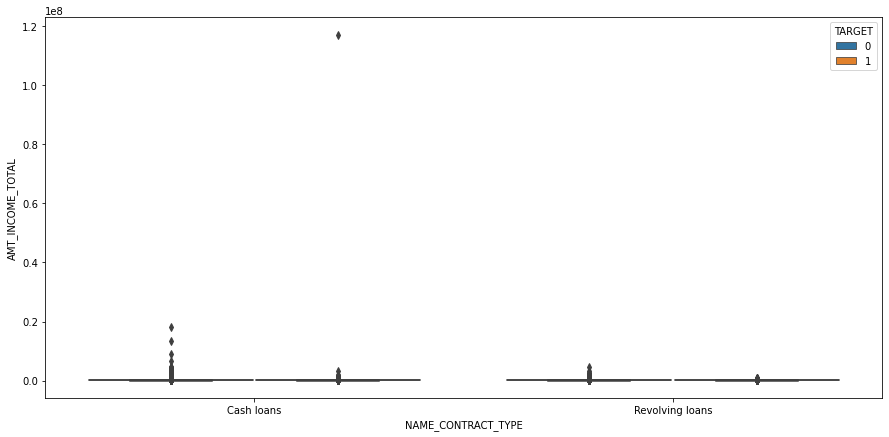

In [ ]:
# BoxPlots for NAME_CONTRACT_TYPE vs AMT_INCOME_TOTAL
NUMCAT_ANALYSIS("NAME_CONTRACT_TYPE","AMT_INCOME_TOTAL" )

### From the above plots the following inferences can be made:
1. Due to the presence of an extreme outlier in the data cannot be visualized properly.
2. All the plots have outliers.

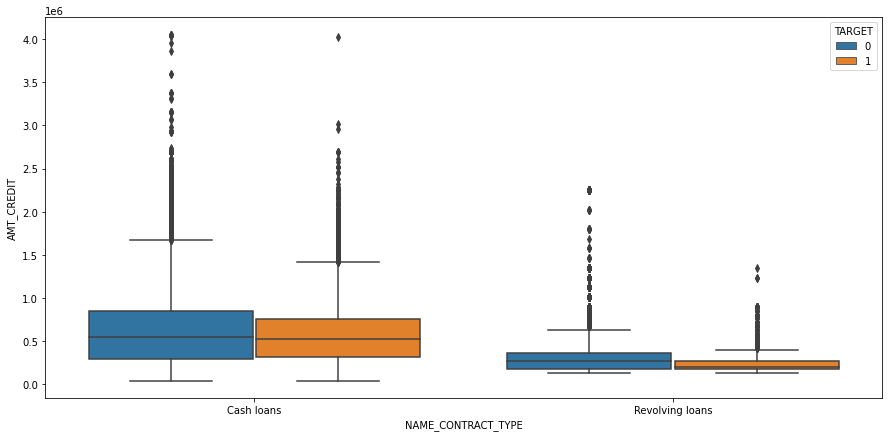

In [ ]:
# BoxPlots for NAME_CONTRACT_TYPE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_CONTRACT_TYPE","AMT_CREDIT" )

### From the above plots the following inferences can be made:
1. It is clearly evident that the credit amounts are higher for cash loans when compared to revolving loans
2. The credit amount is concentrated at the lower end of the IQR for TARGET=1, which suggests that most of the clients who have difficulty in repaying the loans have lesser credit amount.

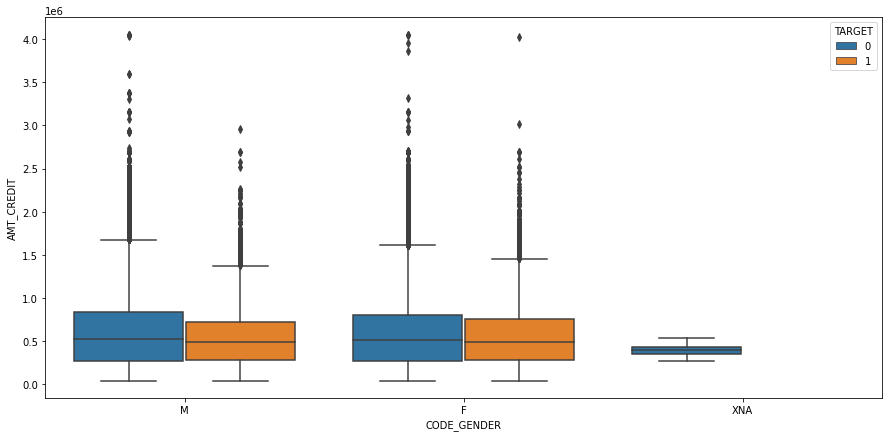

In [ ]:
# BoxPlots for CODE_GENDER vs AMT_CREDIT
NUMCAT_ANALYSIS("CODE_GENDER", "AMT_CREDIT")

### From the above plots the following inferences can be made:
1. The medians of all the boxlpots are similar and also the IQRs are also quite similar for both the genders.
2. This shows that the gender is not a huge factor for credit amount.

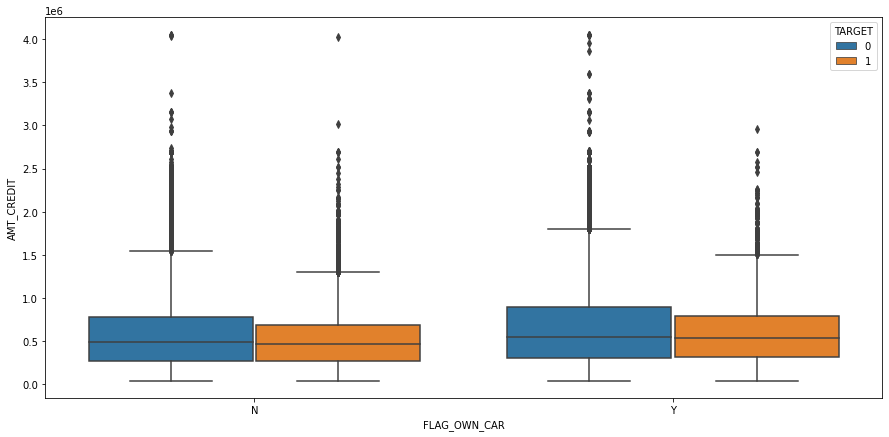

In [ ]:
# BoxPlots for FLAG_OWN_CAR vs AMT_CREDIT
NUMCAT_ANALYSIS("FLAG_OWN_CAR", "AMT_CREDIT")

### From the above plots the following inferences can be made:
1. The medians of the boxplots are quite similar as well as the IQRs
2. This suggests that Owning a car does not have a big impact on the credit amount.

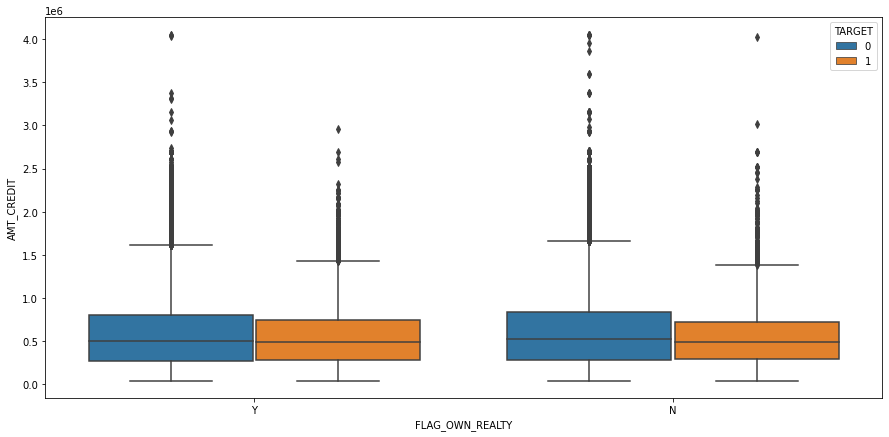

In [ ]:
# BoxPlots for FLAG_OWN_REALTY vs AMT_CREDIT
NUMCAT_ANALYSIS("FLAG_OWN_REALTY", "AMT_CREDIT")

### From the above plots the following inferences can be made:
1. The medians of the boxplots are quite similar as well as the IQRs.
2. This suggests that Owning a car does not have a big impact on the credit amount.

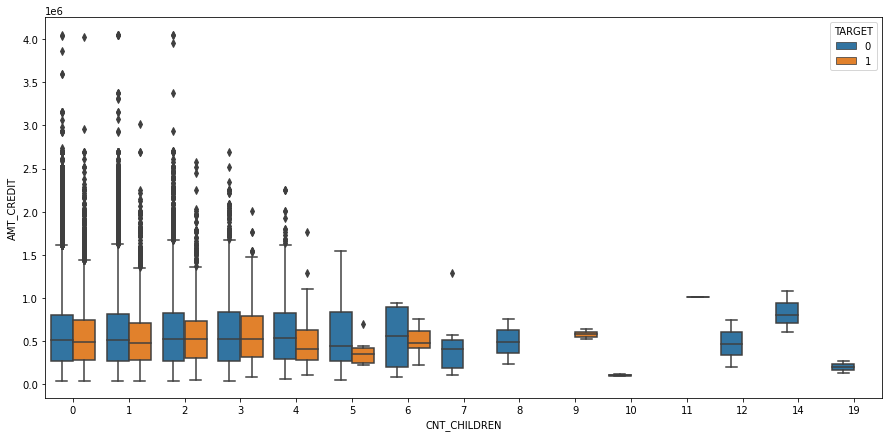

In [ ]:
# BoxPlots for CNT_CHILDREN vs AMT_CREDIT
NUMCAT_ANALYSIS("CNT_CHILDREN", "AMT_CREDIT")

### From the above plots the following inferences can be made:
1. As the number of children are more than 6 we observe the lack of data due to the lack of boxplots.

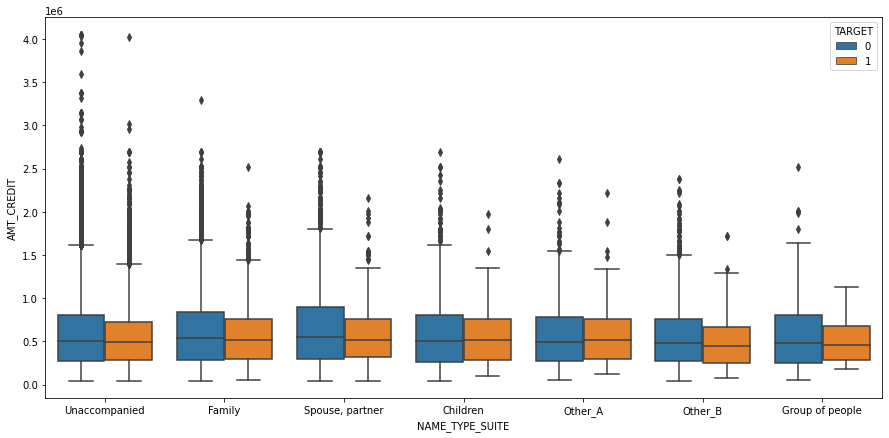

In [ ]:
# BoxPlots for NAME_TYPE_SUITE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_TYPE_SUITE","AMT_CREDIT" )

### From the above plots the following inferences can be made:
1. The boxplots are fairly similar for all the 'NAME_TYPE_SUITE' categories

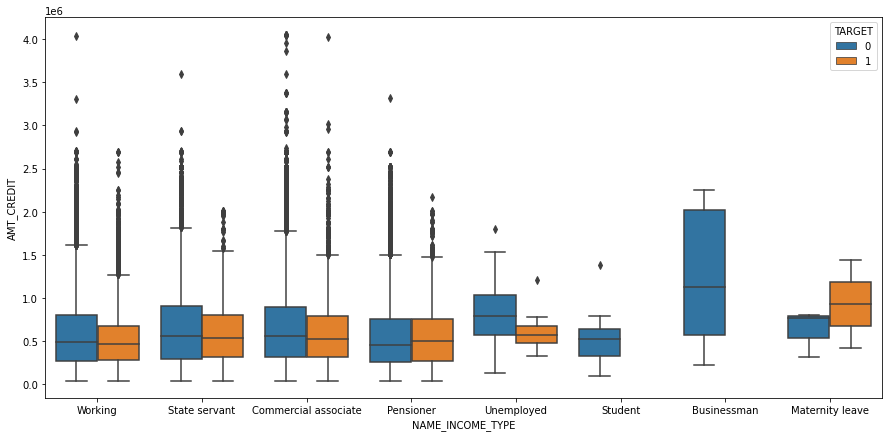

In [ ]:
# BoxPlots for NAME_INCOME_TYPE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_INCOME_TYPE", "AMT_CREDIT")

### From the above plots the following inferences can be made:
1. The clients who are businessmen and students do not have a boxlpot for TARGET=1 which shows there are no defaulters
2. The businessmen have a big IQR which suggests that the credit amount has a huge range.

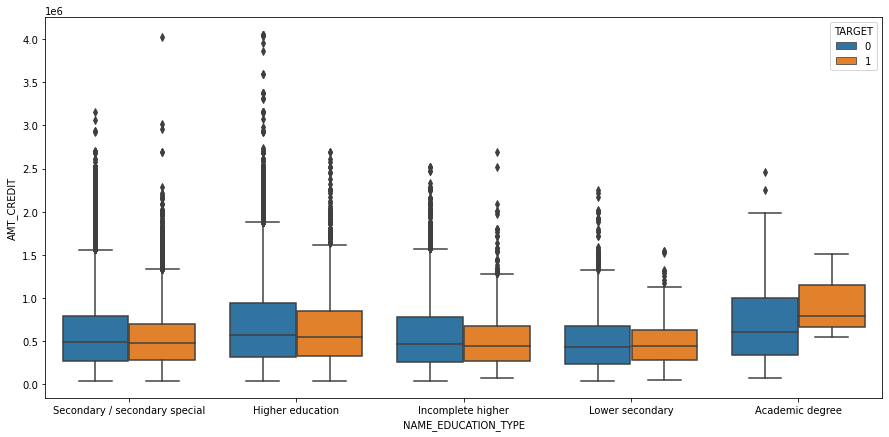

In [ ]:
# BoxPlots for NAME_EDUCATION_TYPE vs AMT_CREDIT
NUMCAT_ANALYSIS("NAME_EDUCATION_TYPE", "AMT_CREDIT")

### From the above plots the following inferences can be made:
1. For the clients with an academic degree, the ones who have difficulty in repaying the loan have higher credit amounts, which might be the reason for defaulting.

## CATEGORICAL TO CATEGORICAL VARIABLE ANALYSIS
#### THIS WILL GIVE THE ASSOCIATION BETWEEN DIFFERENT CATEGORICAL VARIABLES

In [ ]:
# Creating a list of important categorical variables for our analysis
CAT_VAR_LIST = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY", "CNT_CHILDREN","NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE" ]

In [ ]:
# Defining a function for categorical-categorical variable analysis
def CAT_CAT_ANALYSIS(CAT1, CAT2, rot = False):
    res = pd.pivot_table(data = data, index = CAT1, columns= CAT2, values = "TARGET")
    plt.figure(figsize = [35, 10])
    sns.heatmap(data = res, annot = True, cmap = "coolwarm",linewidths= 0.3)
    if rot:
        plt.xticks(rotation = 90)
    plt.show()

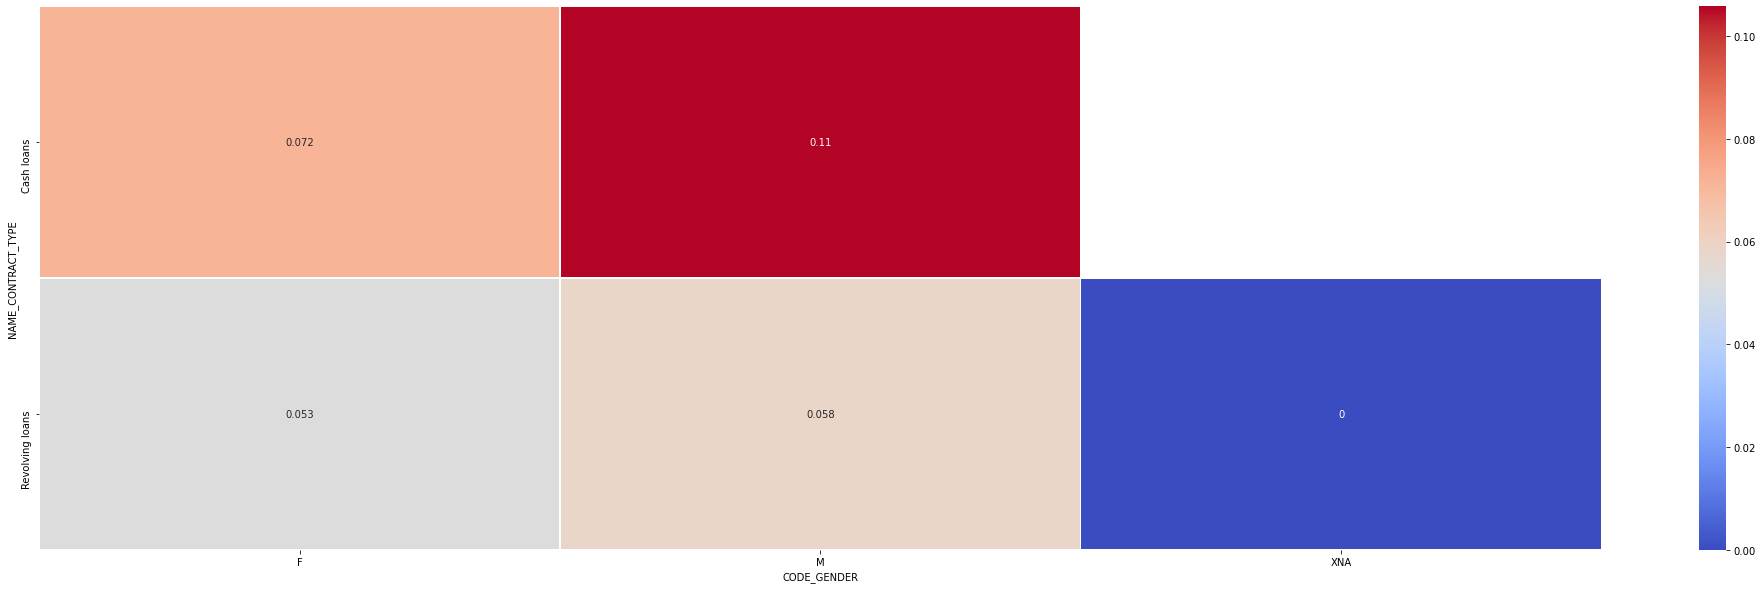

In [ ]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and CODE_GENDER
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "CODE_GENDER")

### From the above heatmap the following inferences can be made:
1. Male clients who have opted for cash loans are most likely to default.

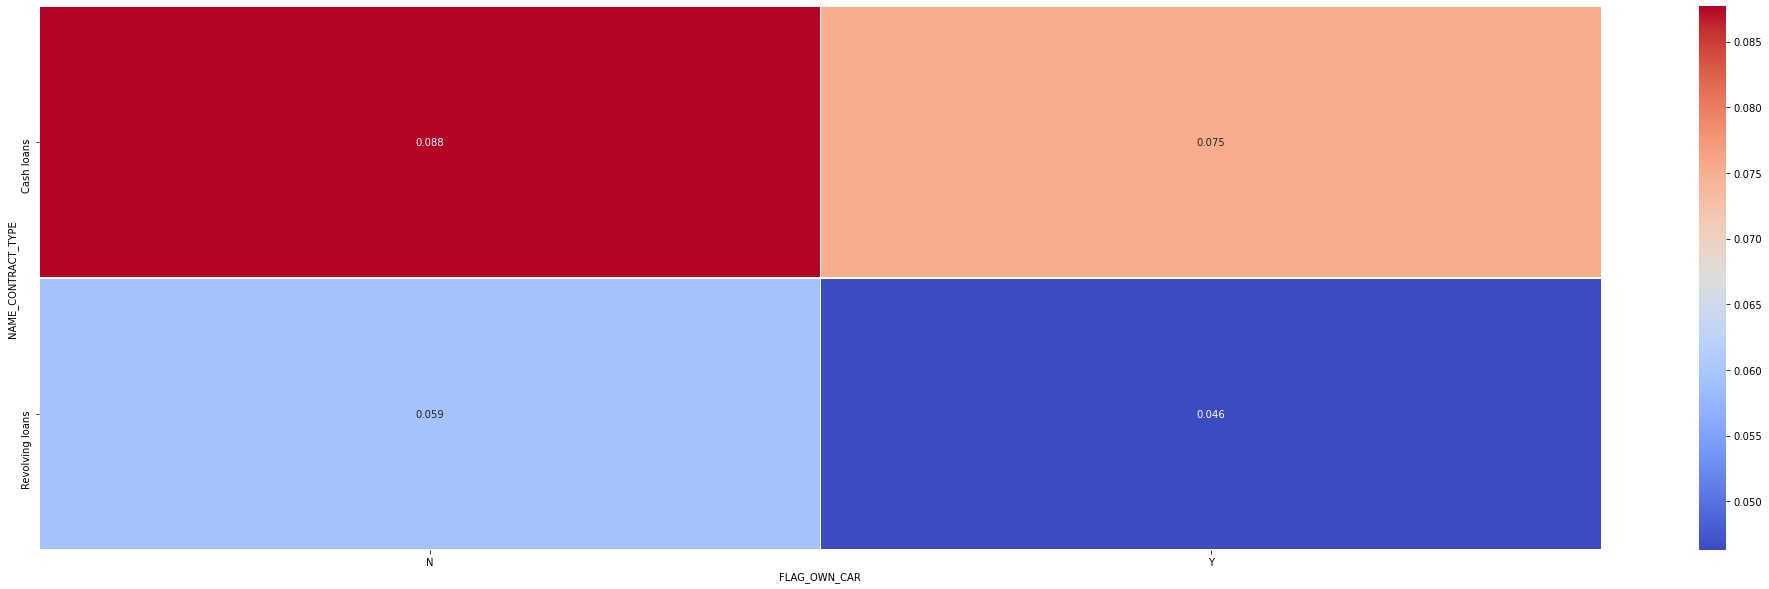

In [ ]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and FLAG_OWN_CAR
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","FLAG_OWN_CAR")

### From the above heatmap the following inferences can be made:
1. Clients who have opted for cash loans are more likely to default whether they own a car or not.
2. In general clients who do not own a car are more likely to default.

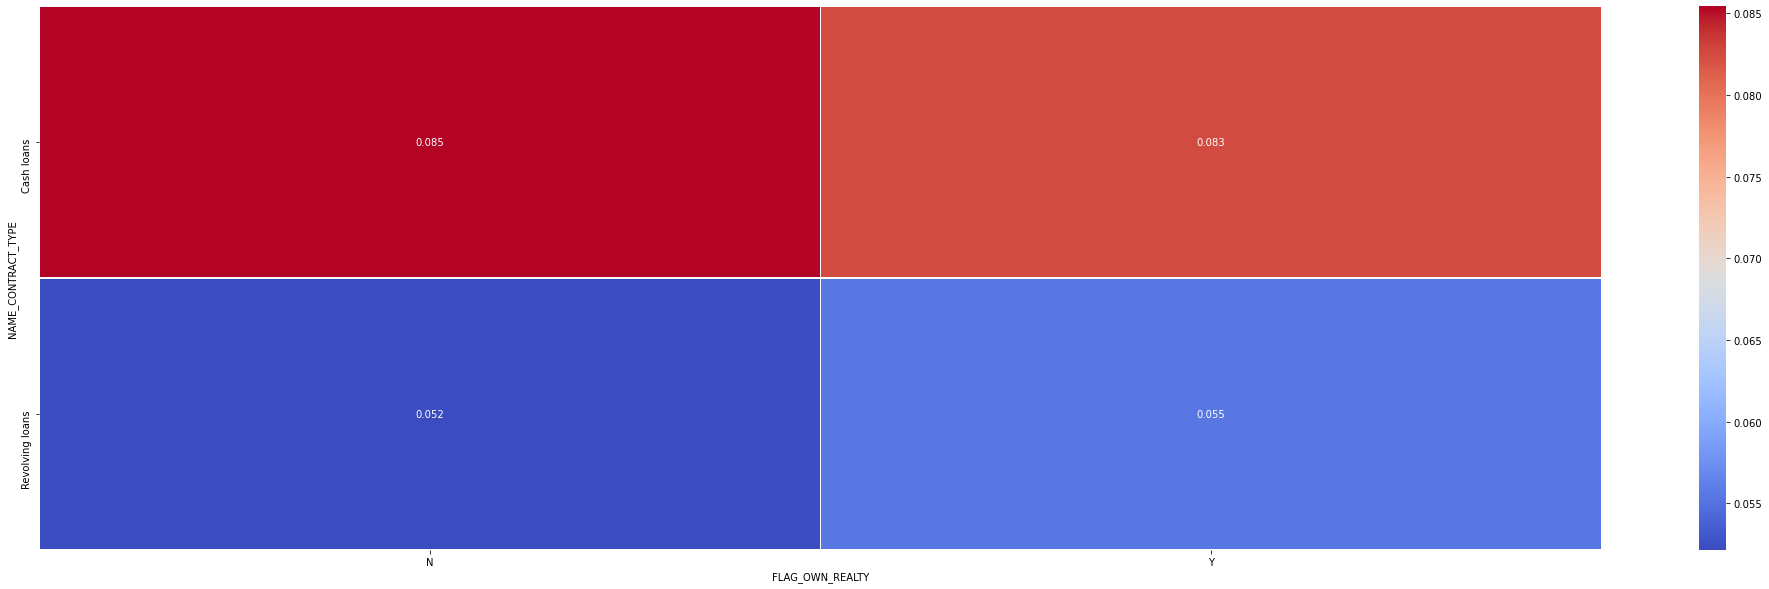

In [ ]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and FLAG_OWN_REALTY
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","FLAG_OWN_REALTY")

### From the above heatmap the following inferences can be made:
1. Clients who have opted for cash loans and do not own realty are most likey to default.
2. Owning realty does not seem to have much of an impact since the default rate is almost the same for both cash and revolving loans.

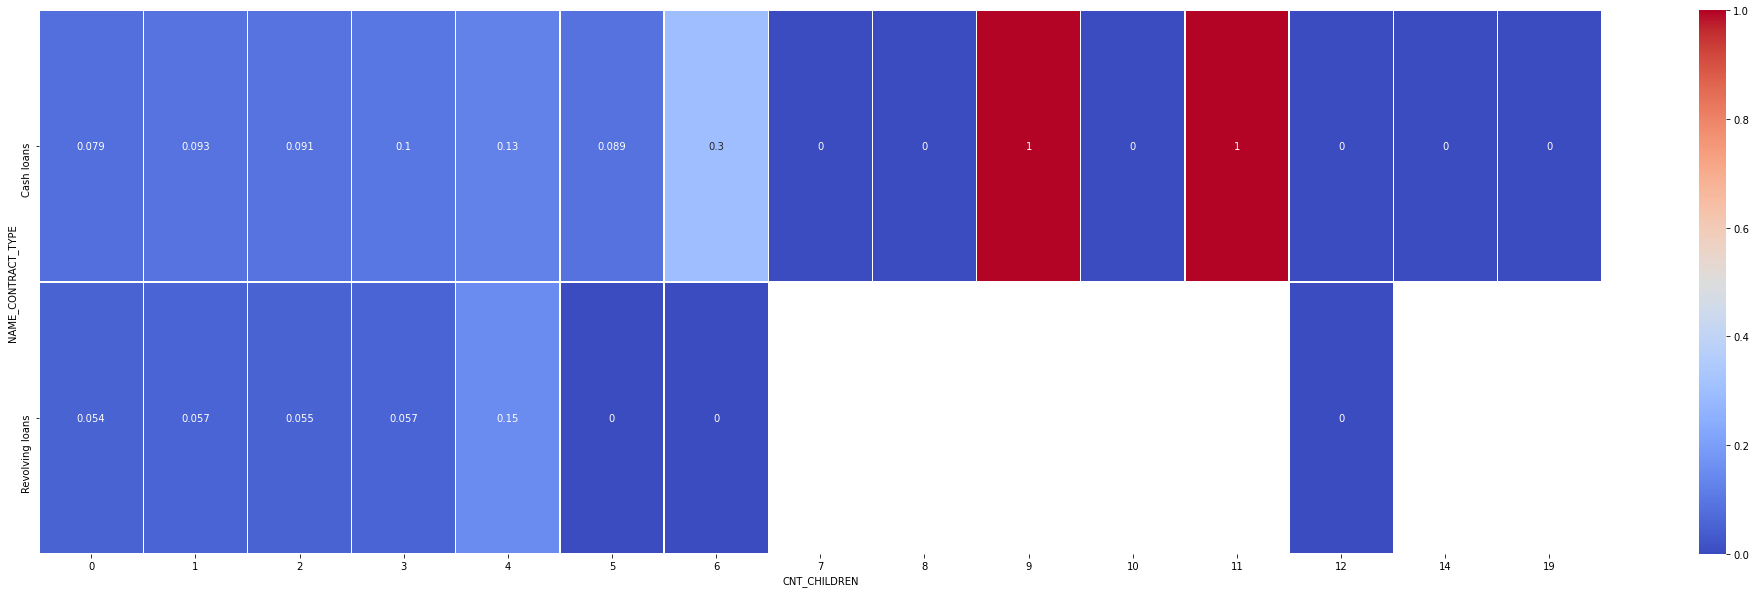

In [ ]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and CNT_CHILDREN
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "CNT_CHILDREN")

### From the above heatmap the following inferences can be made:
1. The default rate increases with increase in the number of children.
2. Clients with 9 or 11 children are the most likely to default.

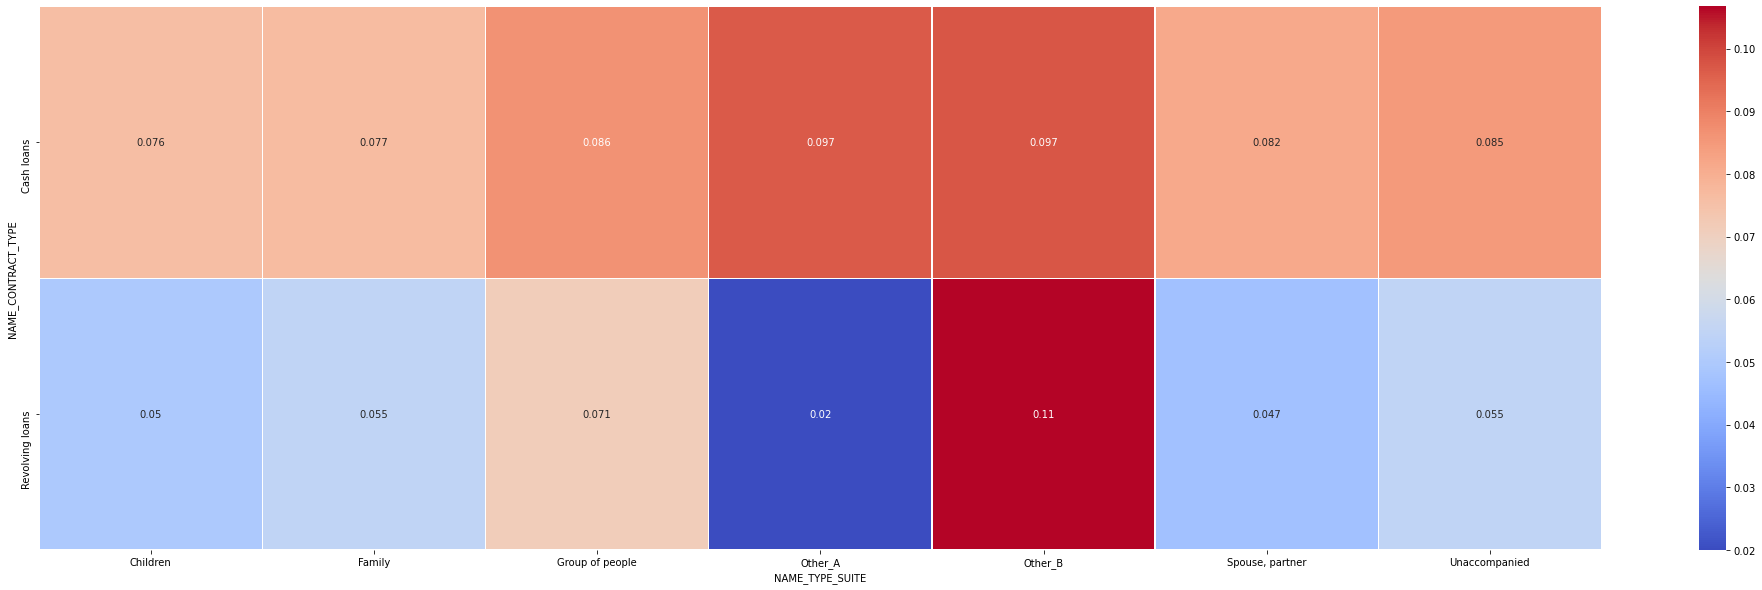

In [ ]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and NAME_TYPE_SUITE
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","NAME_TYPE_SUITE")

### From the above heatmap the following inferences can be made:
1. Clients who have opted for revolving loans and belong to 'Other_B' are most likely to default.
2. Clients who have opted for cash loans and belong to 'Other_A' and 'Other_B' also are more likely to default.

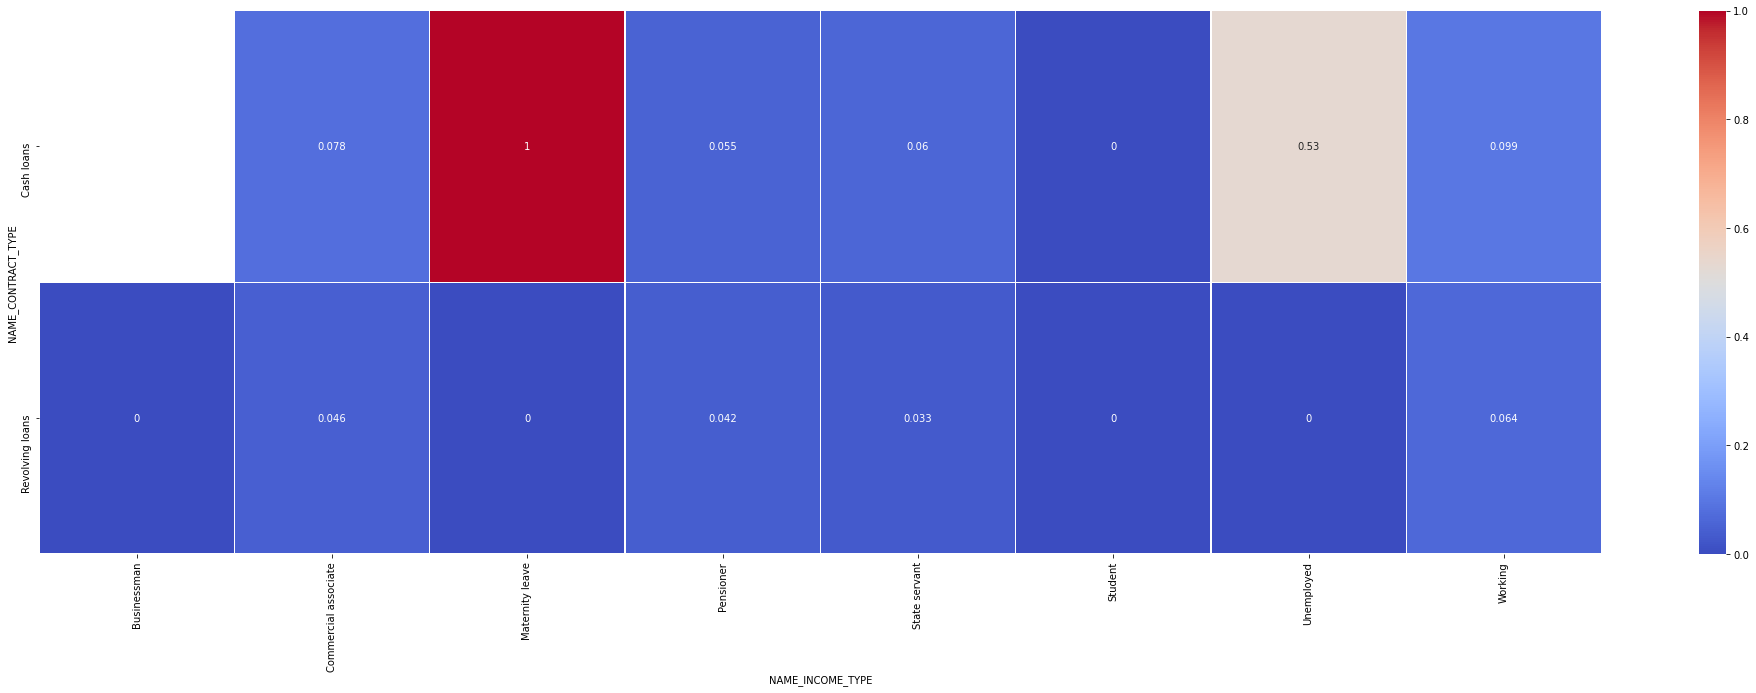

In [ ]:
# Heatmap to find the association between NAME_CONTRACT_TYPE and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "NAME_INCOME_TYPE", True)

### From the above heatmap the following inferences can be made:
1. It is clearly evident that women on maternity leaves are most likely to default.
2. Unemployed clients who have opted for cash loans are very likely to default.

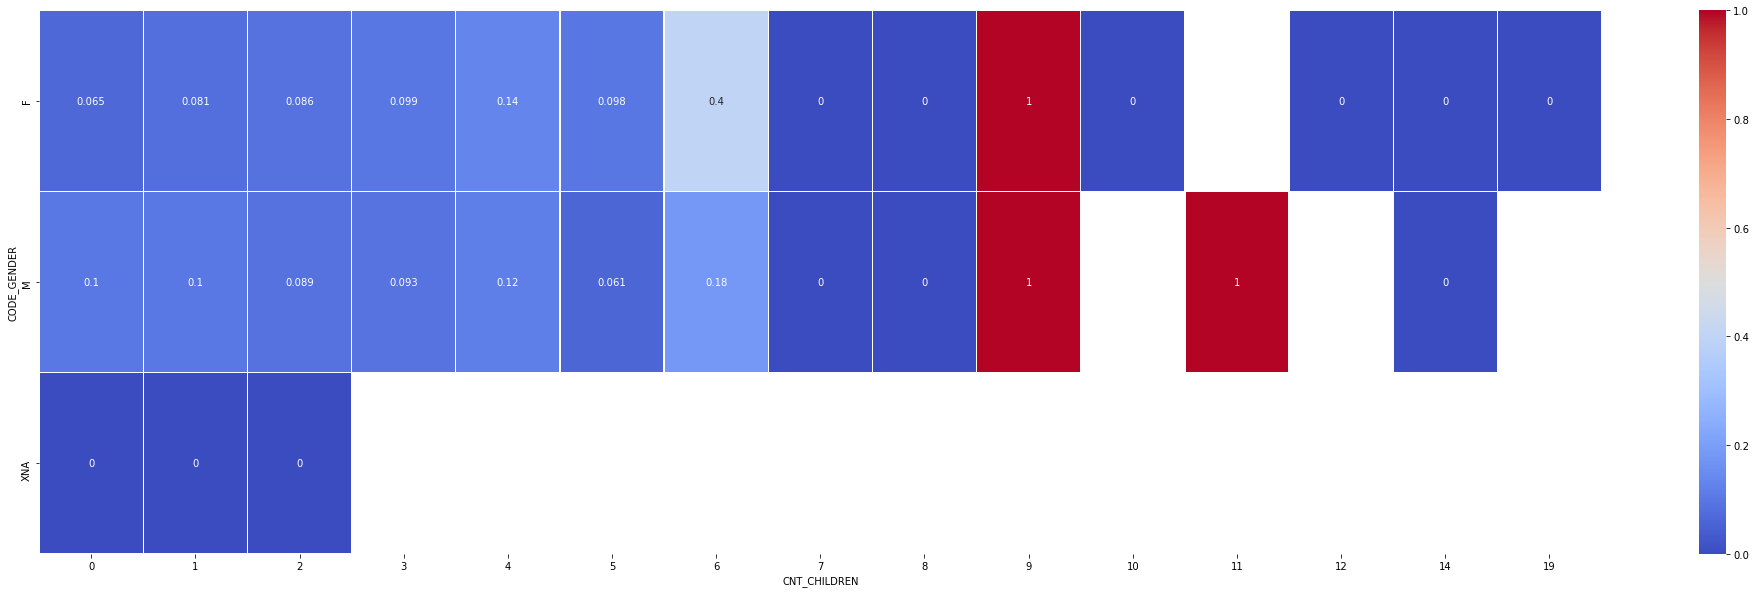

In [ ]:
CAT_CAT_ANALYSIS("CODE_GENDER", "CNT_CHILDREN")

### From the above heatmap the following inferences can be made:
1. The default rate increases with the increase in the number of children the client has, irrespective of the gender.
2. Clients with 9 or 11 children are most likely to default, also female clients with 6 children have chance of defaulting.

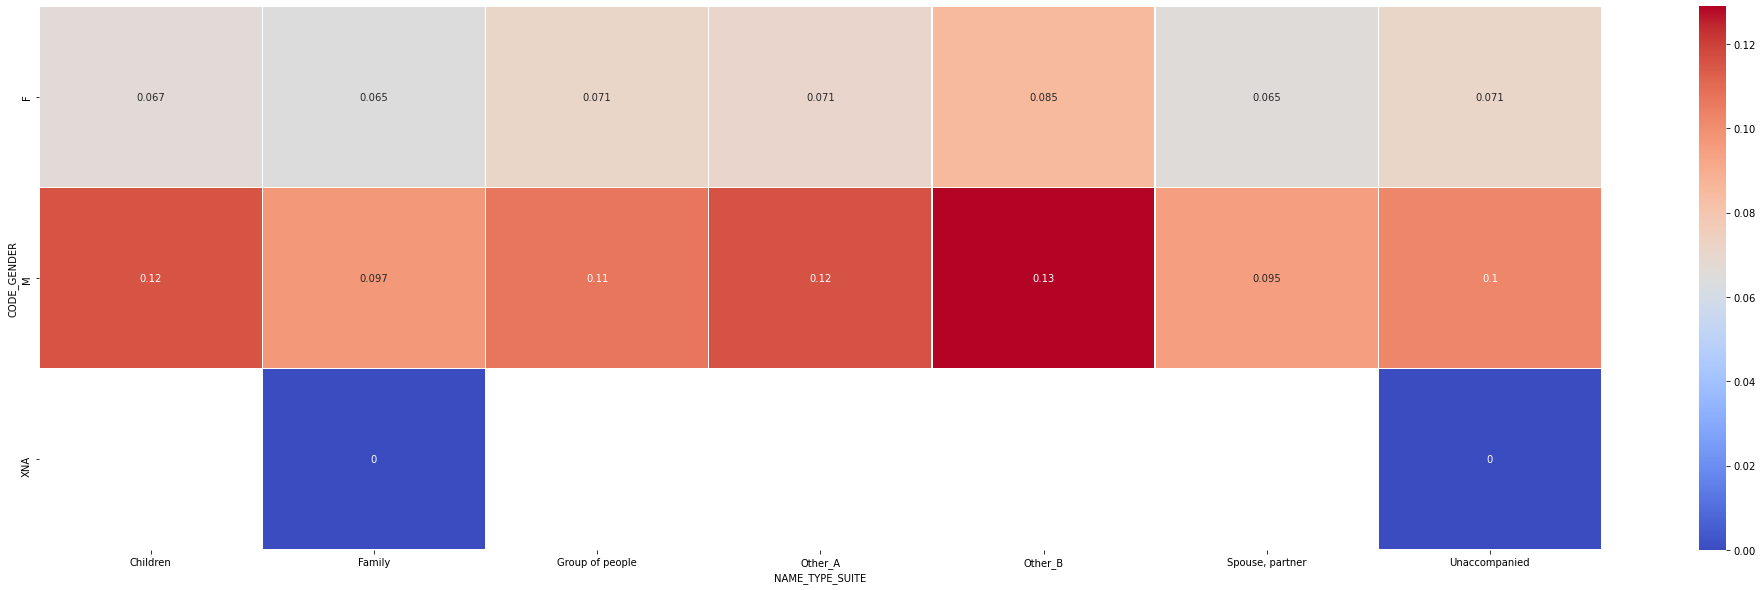

In [ ]:
# Heatmap to find the association between CODE_GENDER and NAME_TYPE_SUITE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_TYPE_SUITE")

### From the above heatmap the following inferences can be made:
1. The male clients are are more likely to default irrespective of 'NAME_TYPE_SUITE'


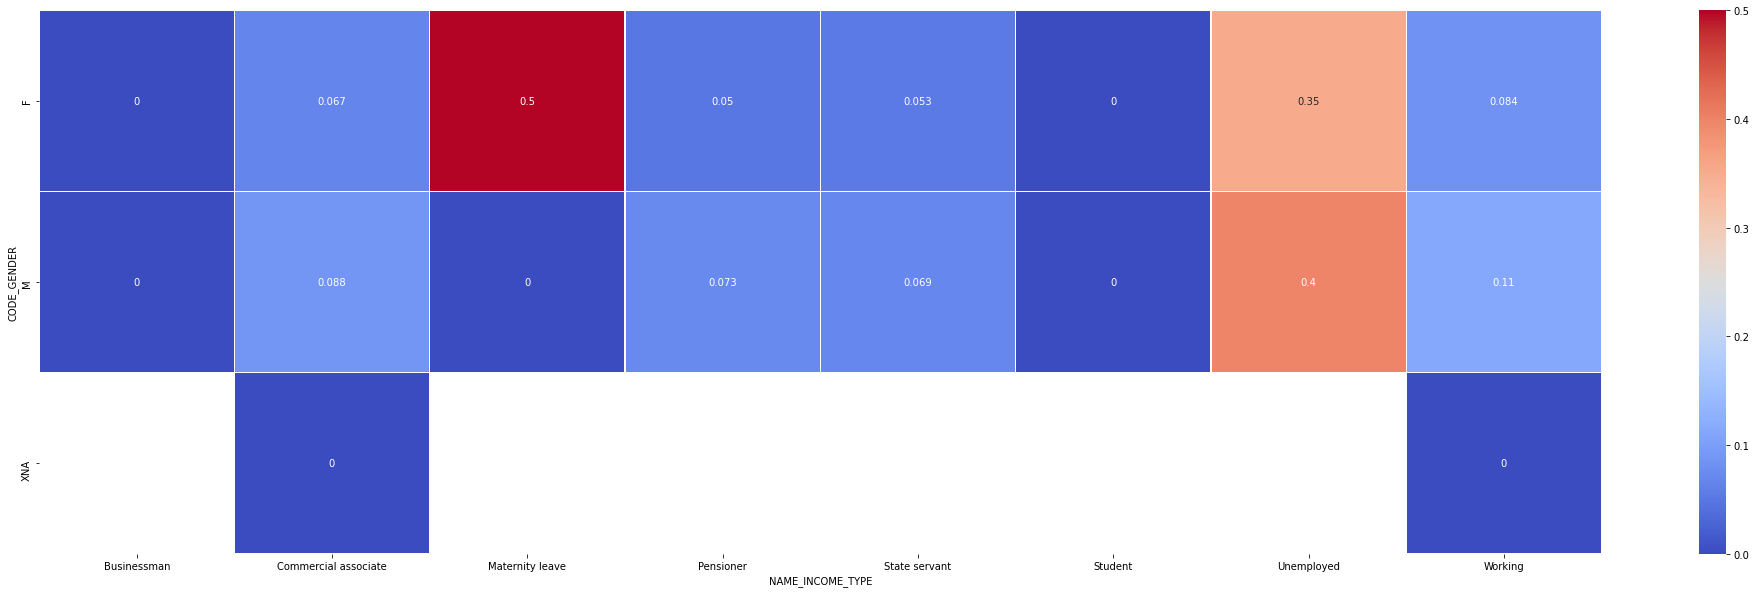

In [ ]:
# Heatmap to find the association between CODE_GENDER and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_INCOME_TYPE")

### From the above heatmap the following inferences can be made:
1. Women on maternity leave are most likely to default.
2. Also unemployed clients have a high default rate irrespective of gender.

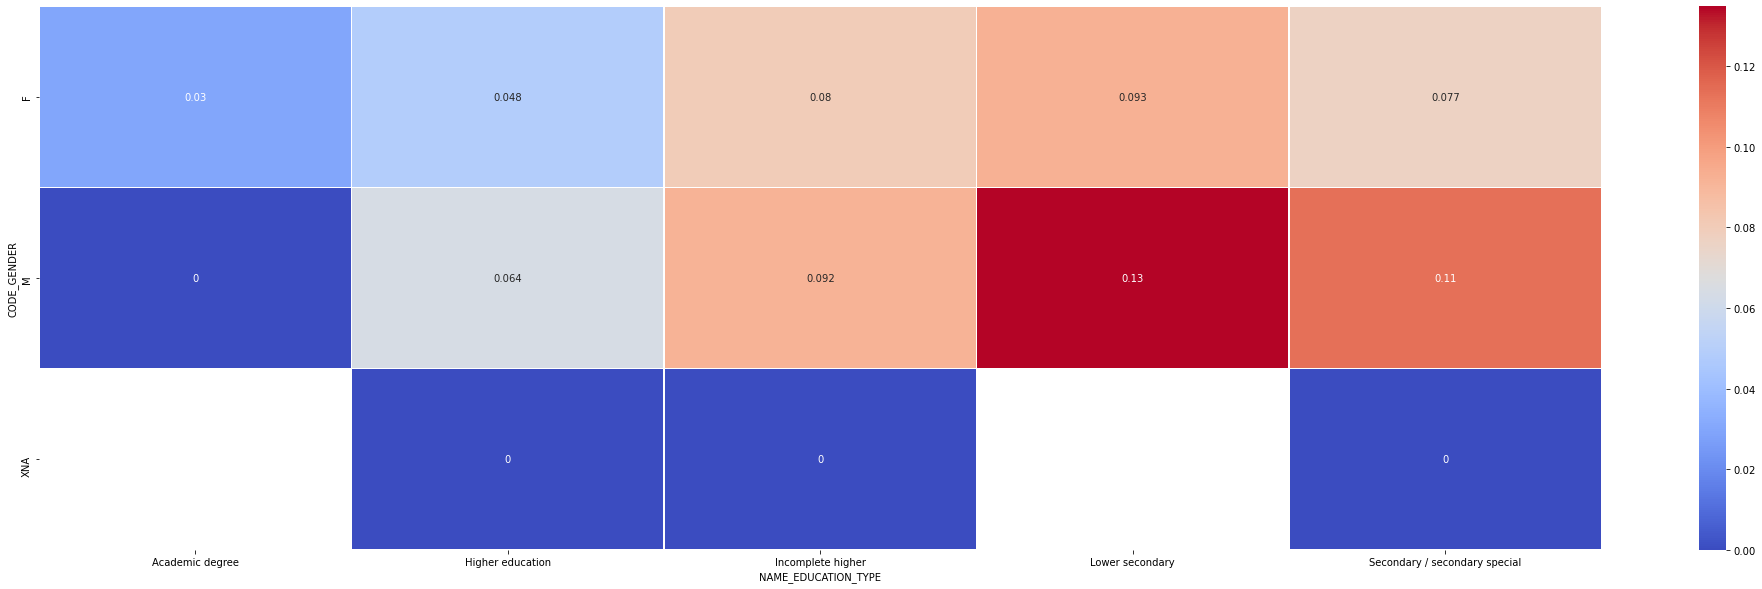

In [ ]:
# Heatmap to find the association between CODE_GENDER and NAME_EDUCATION_TYPE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_EDUCATION_TYPE")

### From the above heatmap the following inferences can be made:
1. The male clients are are more likely to default irrespective of the education type.

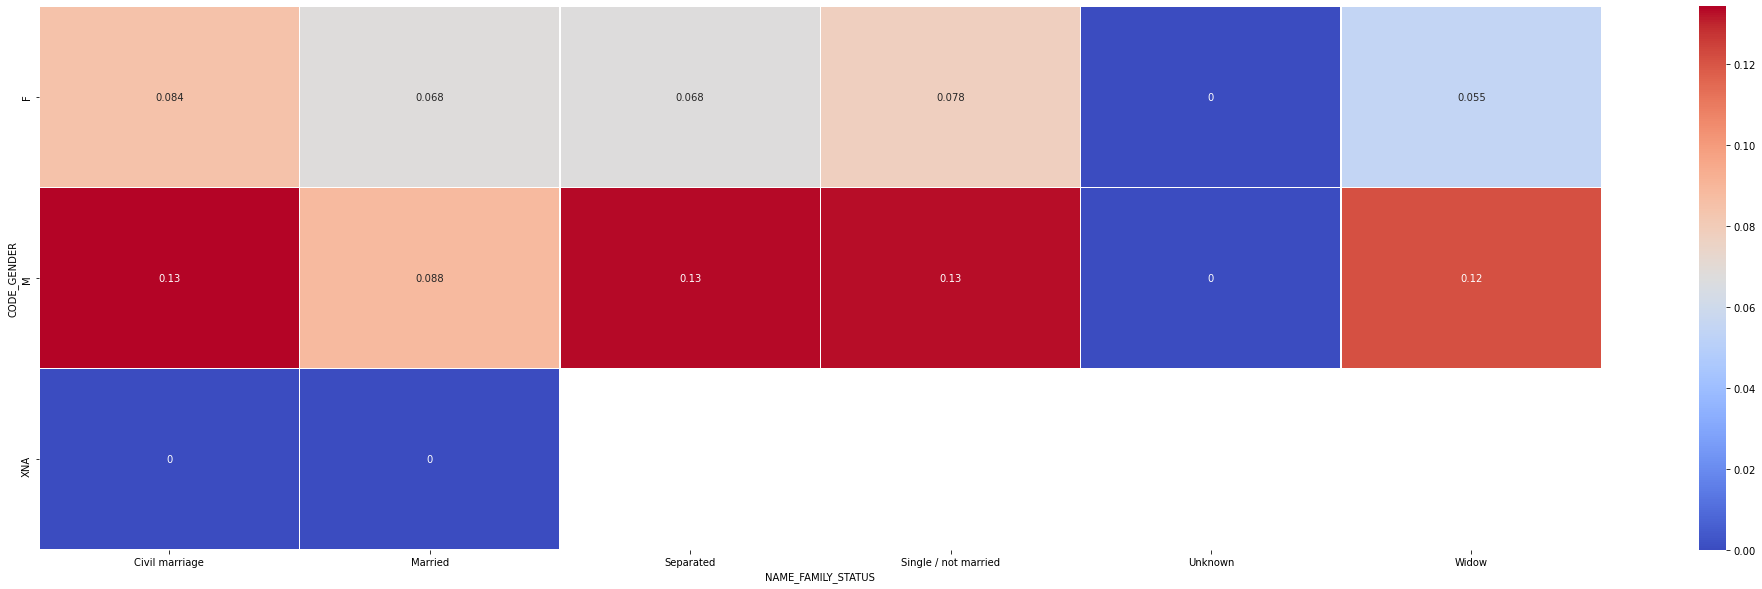

In [ ]:
# Heatmap to find the association between CODE_GENDER and NAME_FAMILY_STATUS
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_FAMILY_STATUS")

### From the above heatmap the following inferences can be made:
1. The male clients are are more likely to default irrespective of the family status.

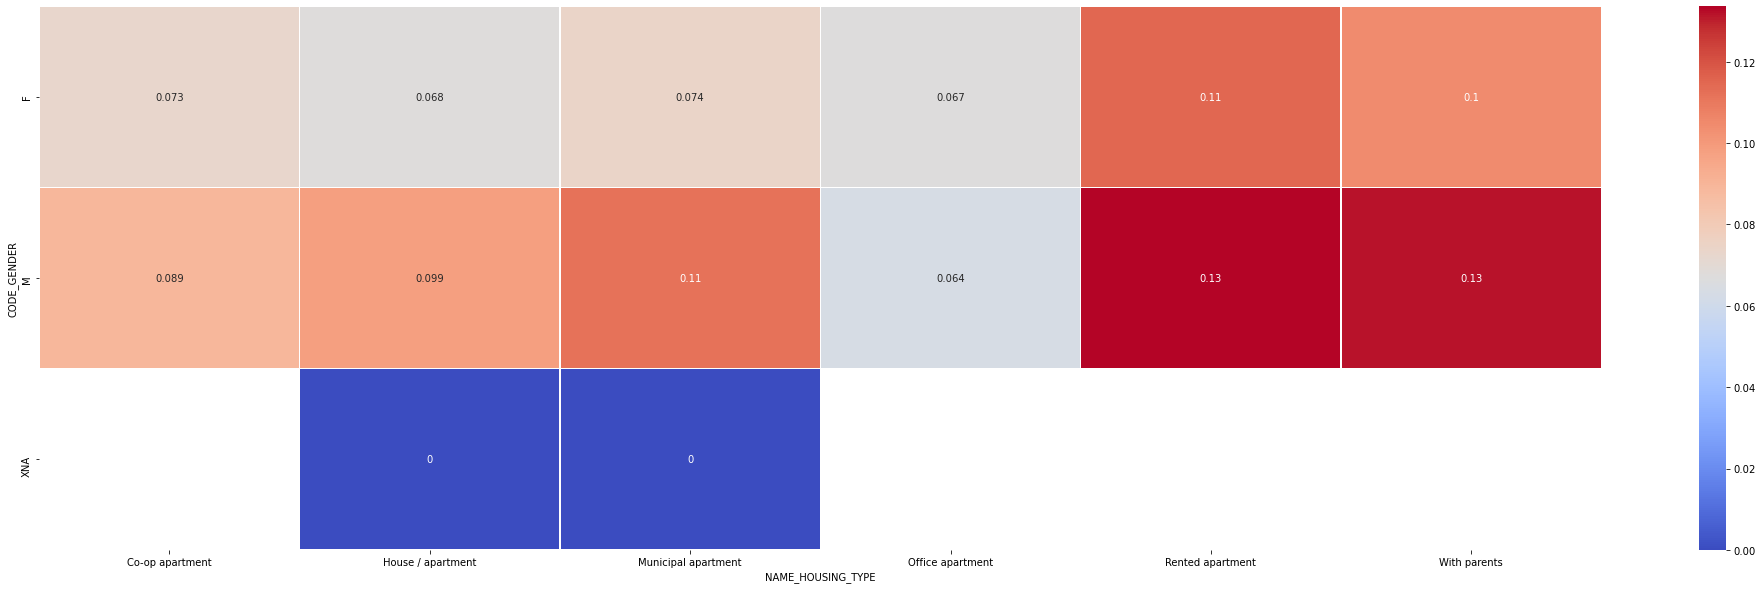

In [ ]:
# Heatmap to find the association between CODE_GENDER and NAME_HOUSING_TYPE
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_HOUSING_TYPE")

### From the above heatmap the following inferences can be made:
1. The male clients are are more likely to default irrespective of the housing type.

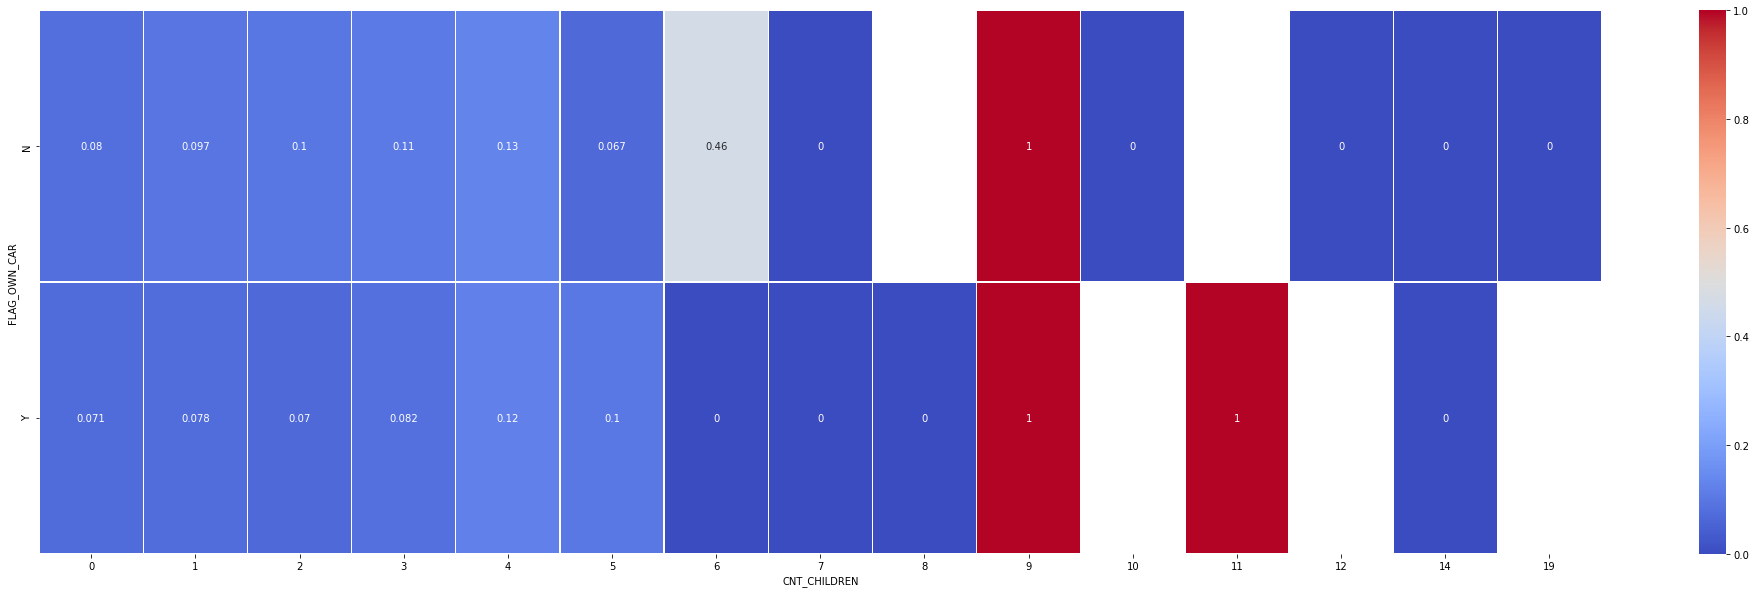

In [ ]:
# Heatmap to find the association between FLAG_OWN_CAR and CNT_CHILDREN
CAT_CAT_ANALYSIS("FLAG_OWN_CAR","CNT_CHILDREN")

### From the above heatmap the following inferences can be made:
1. The default rate increases with the increase in number of children the client has, irrespective of whether they own a car or not.
2. Ae we saw before, clients with 9 or 11 children are the most likely to default.
3. Also clients who do not own a car and have 6 children have a high default rate.

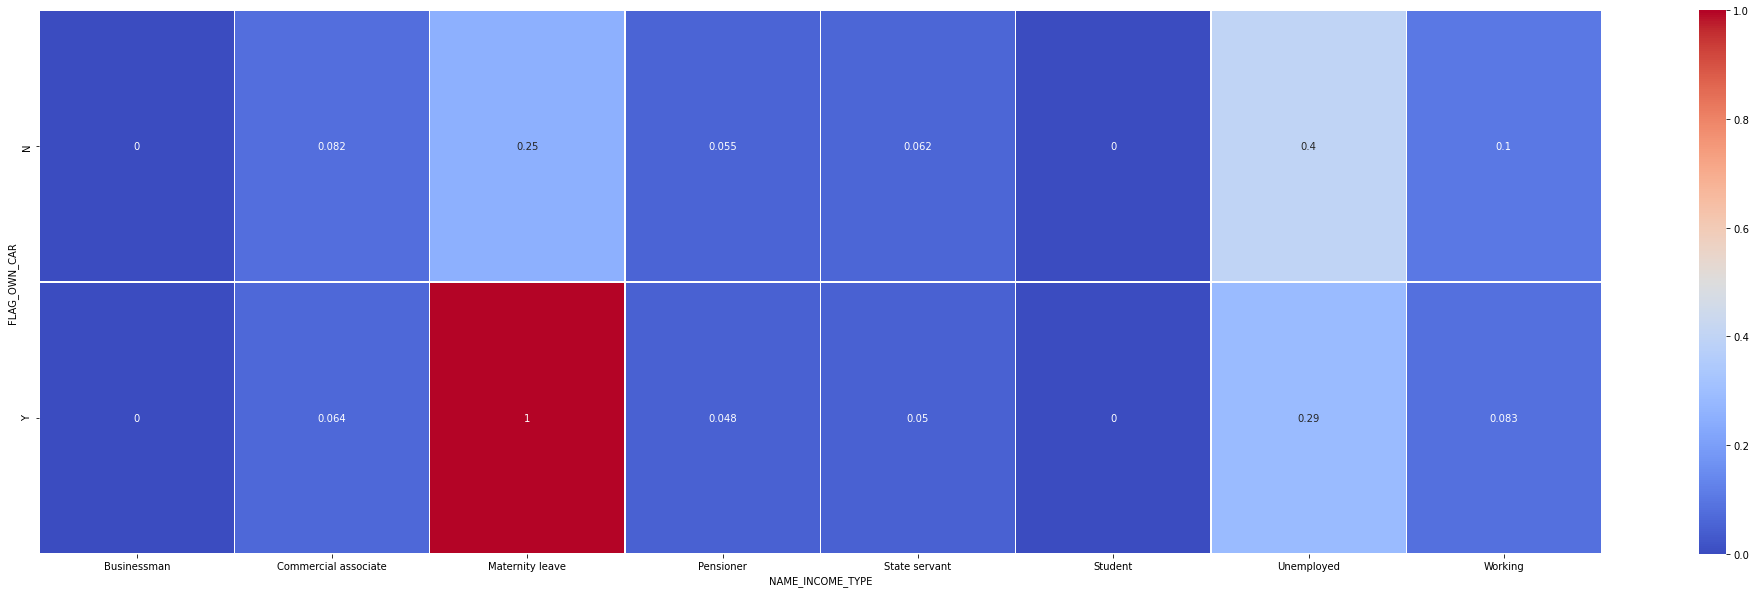

In [ ]:
# Heatmap to find the association between FLAG_OWN_CAR and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("FLAG_OWN_CAR","NAME_INCOME_TYPE")

### From the above heatmap the following inferences can be made:
1. Women on maternity leave and own a car are most likely to default.
2. Unemployed clients who do not own a car have a high default rate.

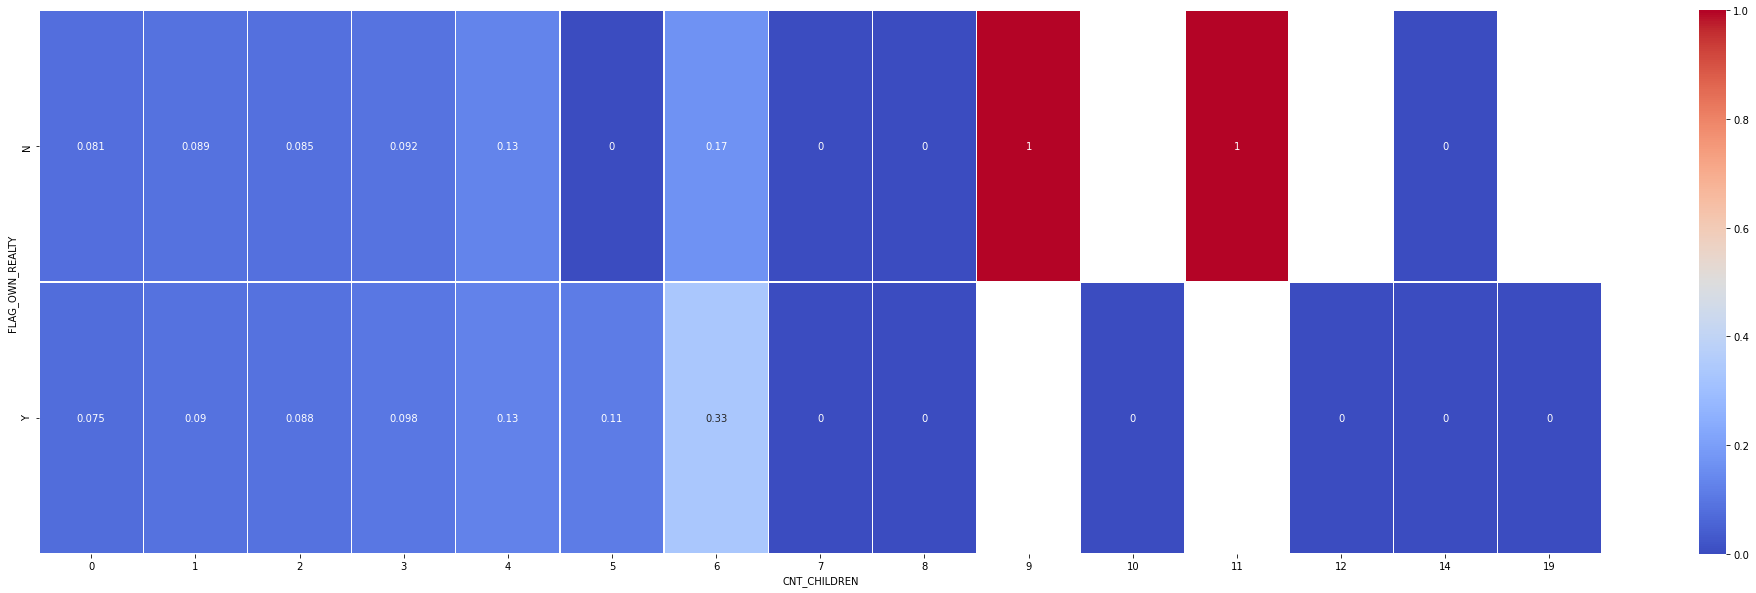

In [ ]:
# Heatmap to find the association between FLAG_OWN_REALTY and CNT_CHILDREN
CAT_CAT_ANALYSIS("FLAG_OWN_REALTY","CNT_CHILDREN")

### From the above heatmap the following inferences can be made:
1. The default rate increases with the increase in number of children the client has, irrespective of owning realty or not.
2. As we have seen before, clients with 9 or 11 children are most likely to default, and they also do not own realty.

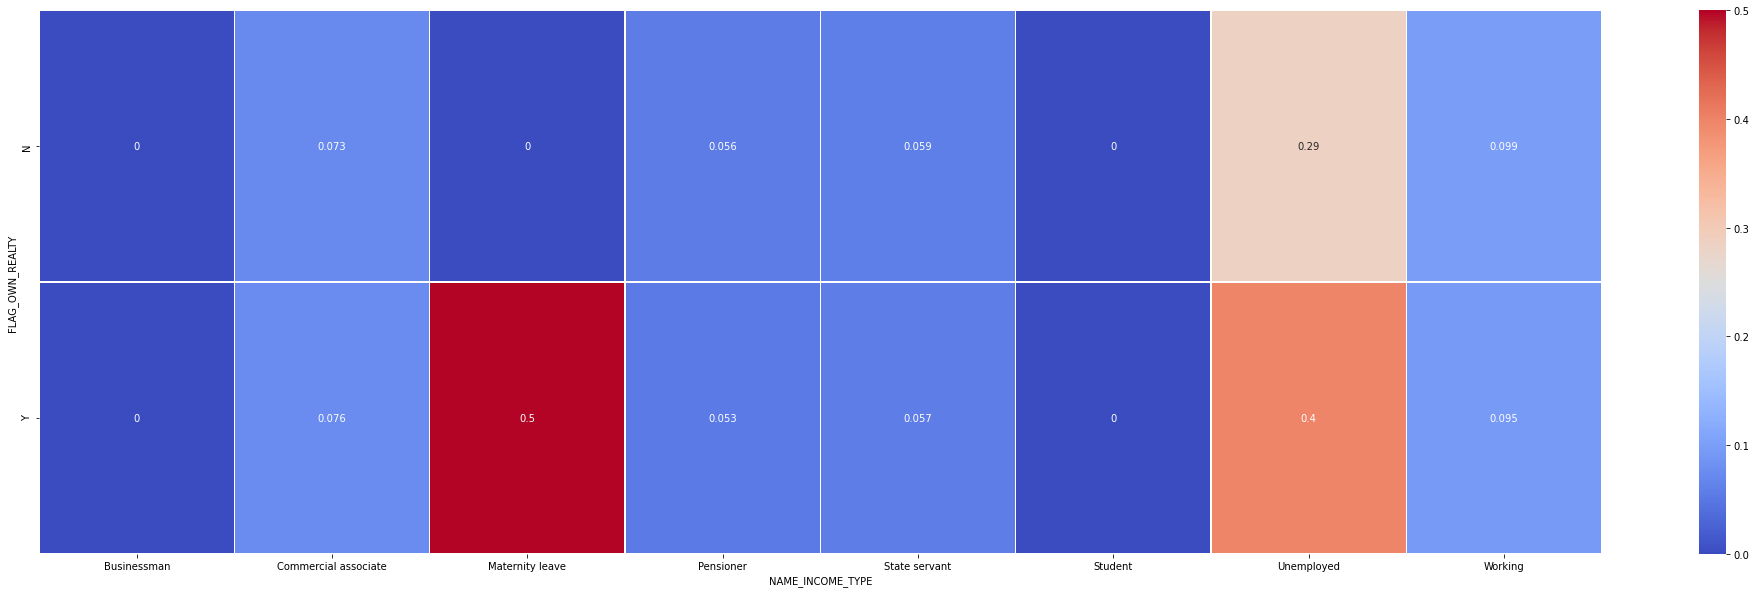

In [ ]:
# Heatmap to find the association between FLAG_OWN_REALTY and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("FLAG_OWN_REALTY","NAME_INCOME_TYPE")

### From the above heatmap the following inferences can be made:
1. Women on maternity leave and own realty are most likely to default.
2. Unemployed clients who do not own realty have a high default rate as well.
3. Unemployed clients who own realty are also likely to default.

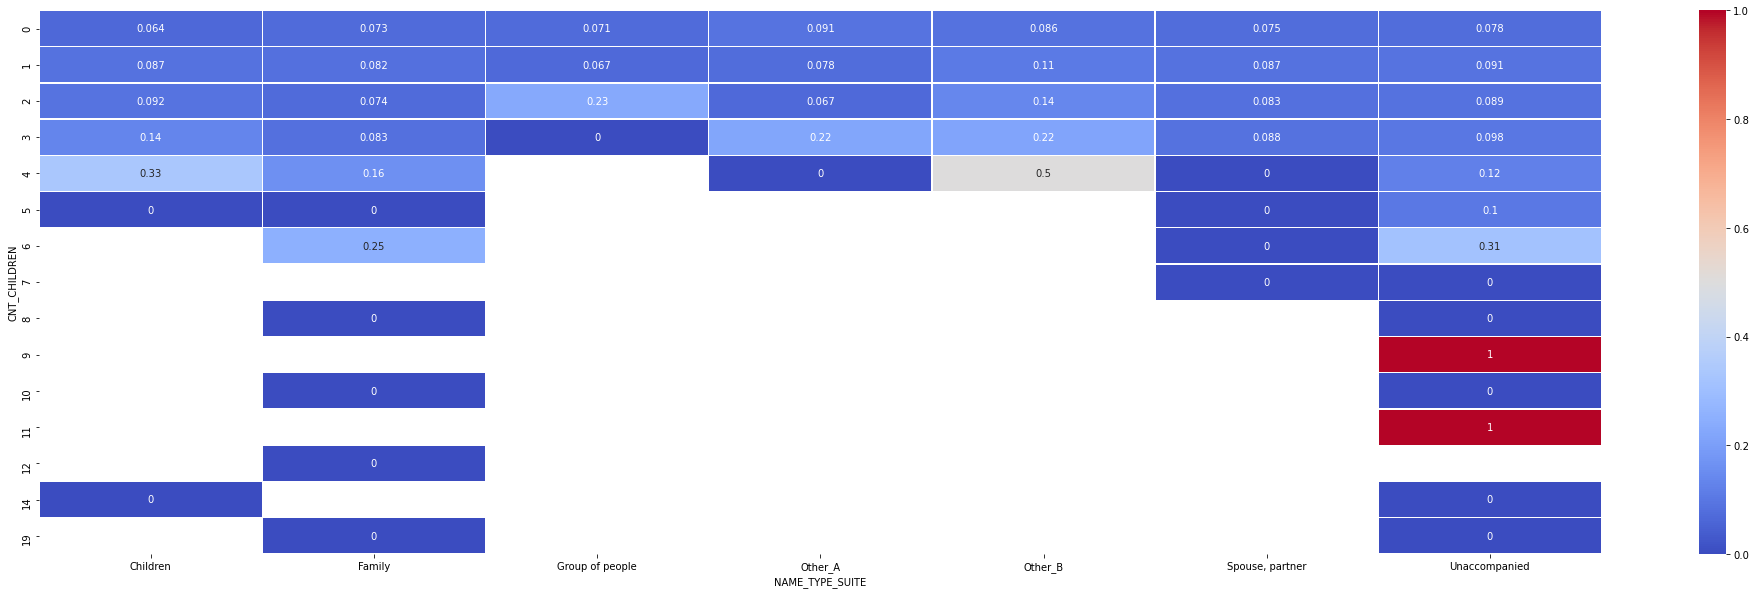

In [ ]:
# Heatmap to find the association between CNT_CHILDREN and NAME_TYPE_SUITE
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_TYPE_SUITE")

### From the above heatmap the following inferences can be made:
1. Clients who were unnacompanied and have 9 or 11 children are most likely to default.
2. Clients who have 4 children and in 'Other_B' category have high default rate.

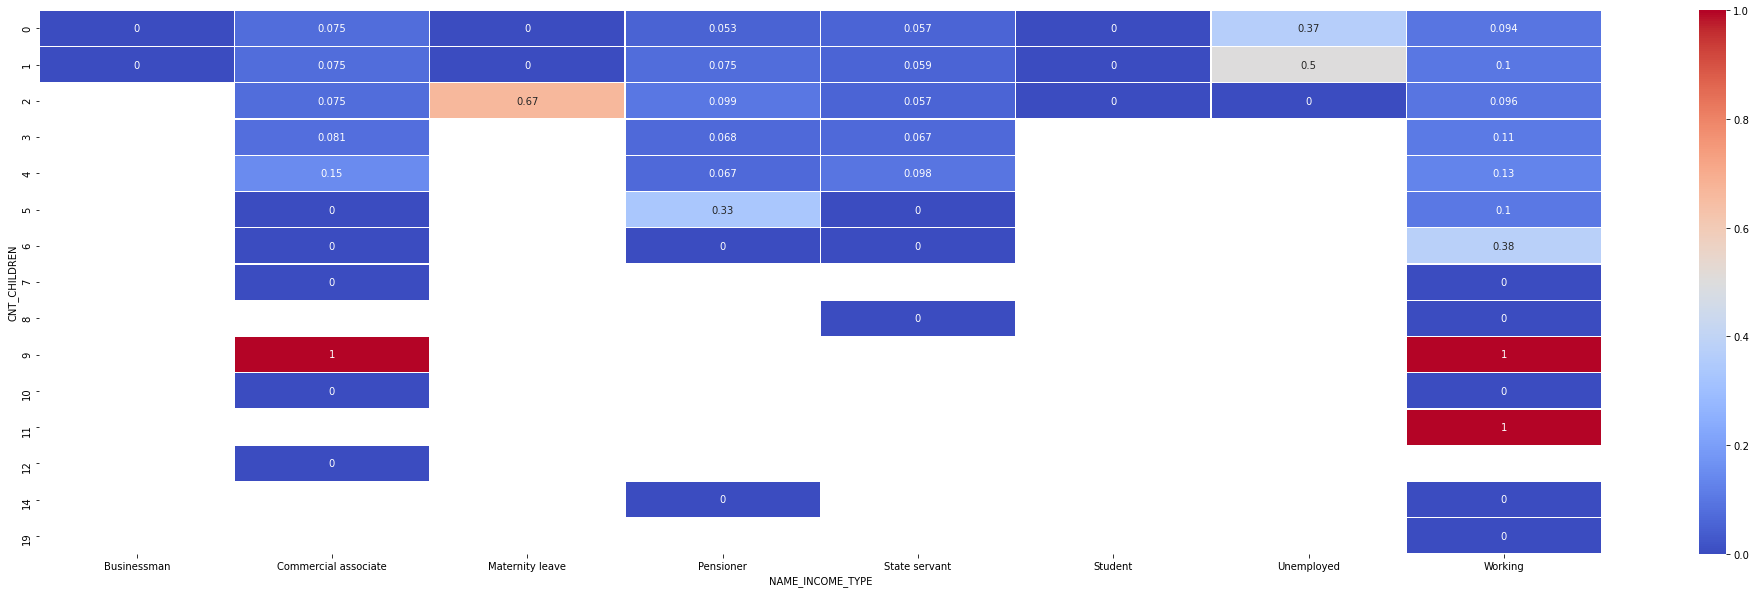

In [ ]:
# Heatmap to find the association between CNT_CHILDREN and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_INCOME_TYPE")

### From the above heatmap the following inferences can be made:
1. As we have seen before, clients who  have 9 or 11 children are mosty likely to default.
2. Clients with 6 children and working have a high default rate, clients who are pensioners and have 5 children also have a high default rate.

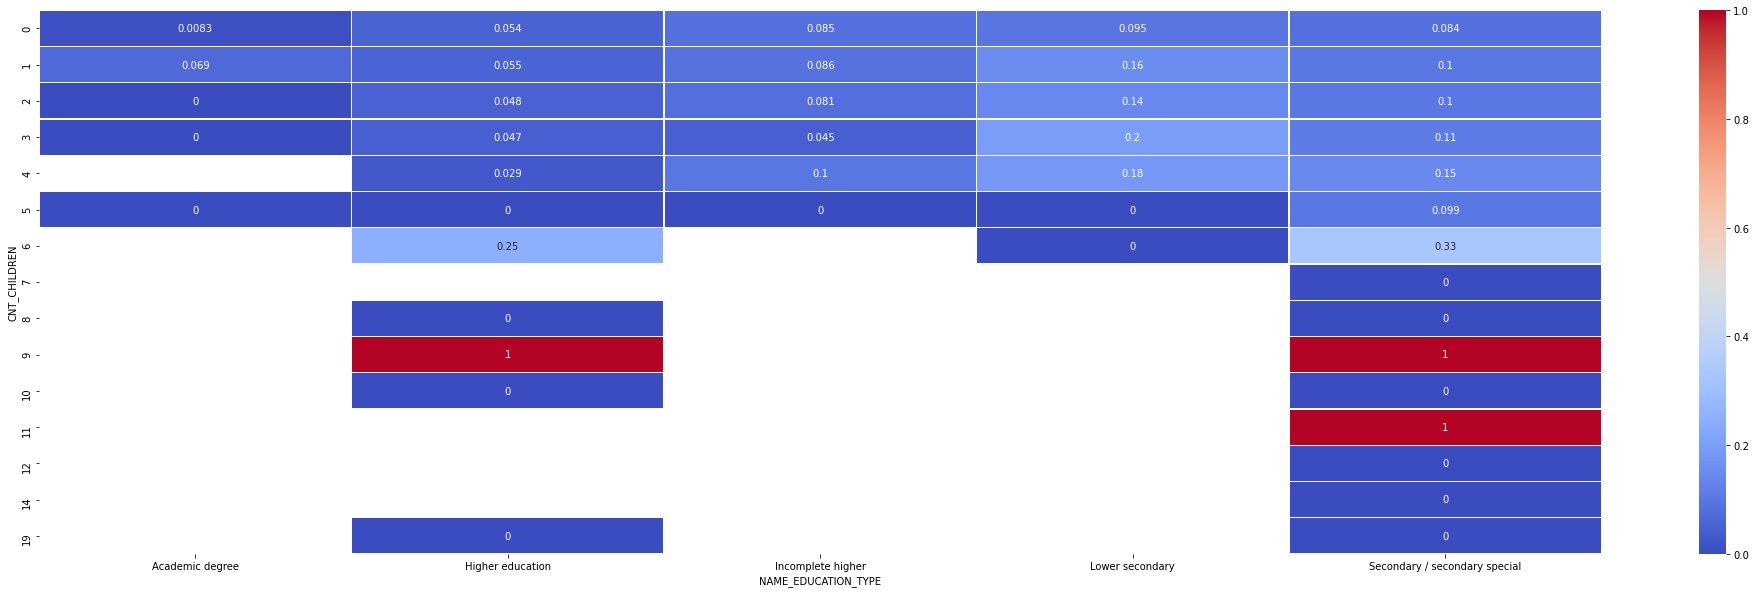

In [ ]:
# Heatmap to find the association between CNT_CHILDREN and NAME_EDUCATION_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_EDUCATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who have 9 or 11 children are most likely to default.
2. Clients who have 6 children with secondary education have a high default rate, clients with 6 children and completed higher education are also likely to default.

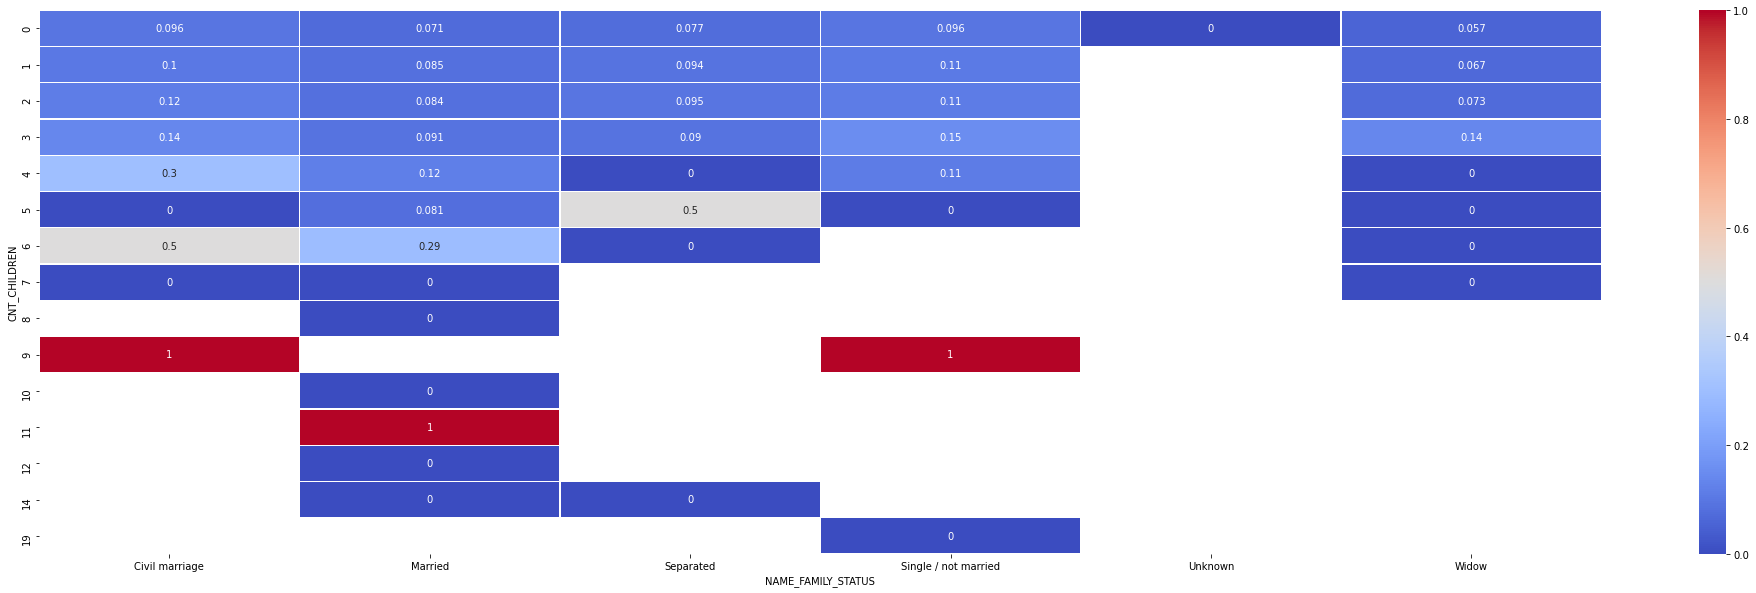

In [ ]:
# Heatmap to find the association between CNT_CHILDREN and NAME_FAMILY_STATUS
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_FAMILY_STATUS")

### From the above heatmap the following inferences can be made:
1. Clients who  have 9 or 11 children are most likely to default.
2. Clients who are separated and have 5 children have a high default rate.
3. Cleints who have 6 children and have undergone civil marriage also have a high default rate .

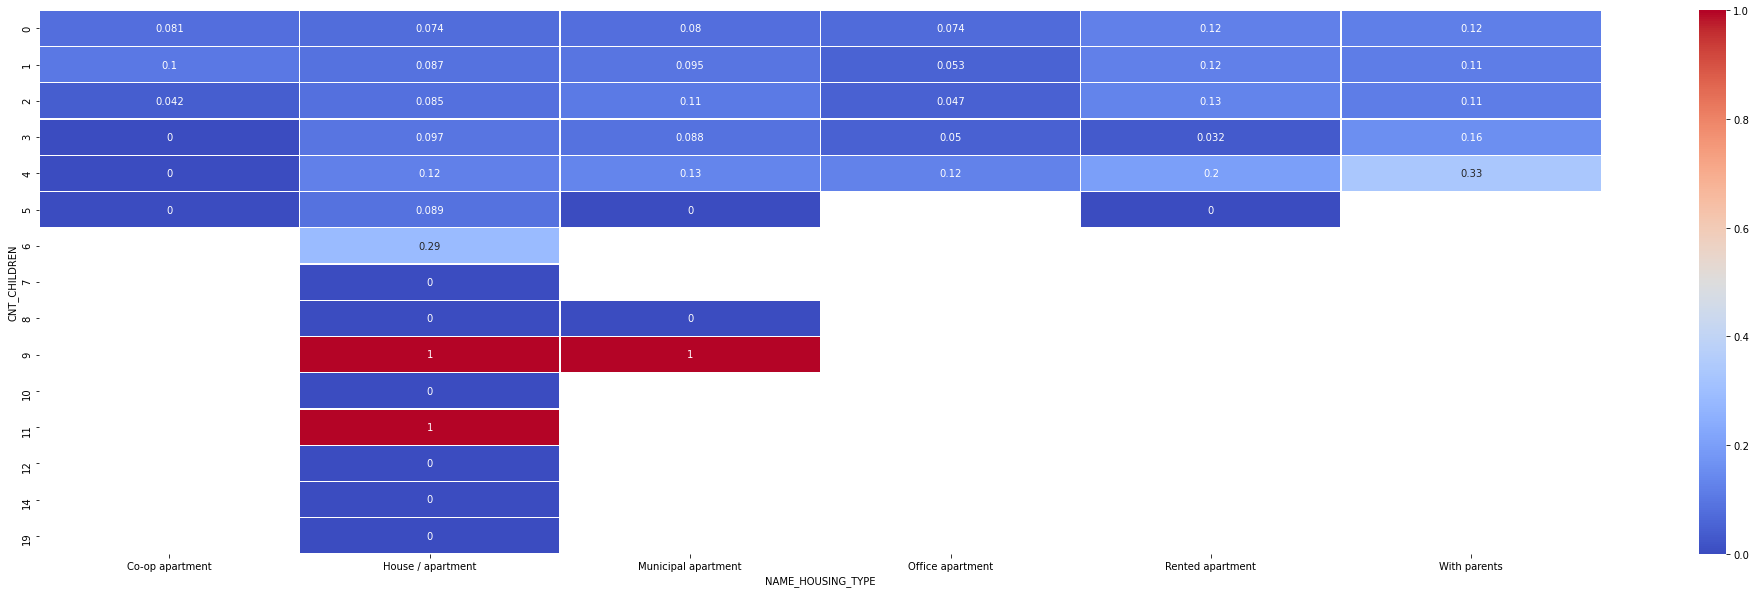

In [ ]:
# Heatmap to find the association between CNT_CHILDREN and NAME_HOUSING_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_HOUSING_TYPE")

### From the above heatmap the following inferences can be made:
1. As we have seen before, clients who  have 9 or 11 children are mosty likely to default.

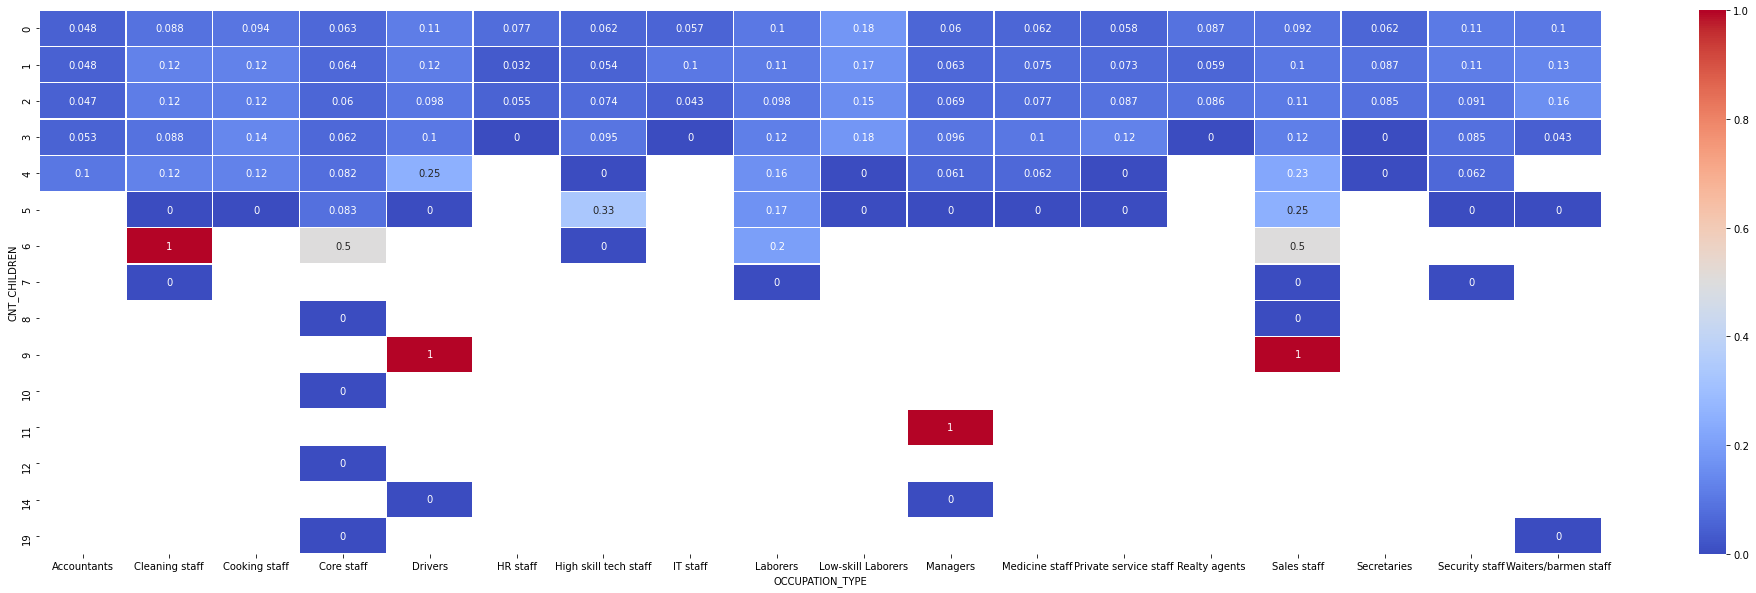

In [ ]:
# Heatmap to find the association between CNT_CHILDREN and OCCUPATION_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","OCCUPATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who were have 9 or 11 children are most likely to default.
2. Clients who have 6 children and are cleaning staff also are most likely to default.

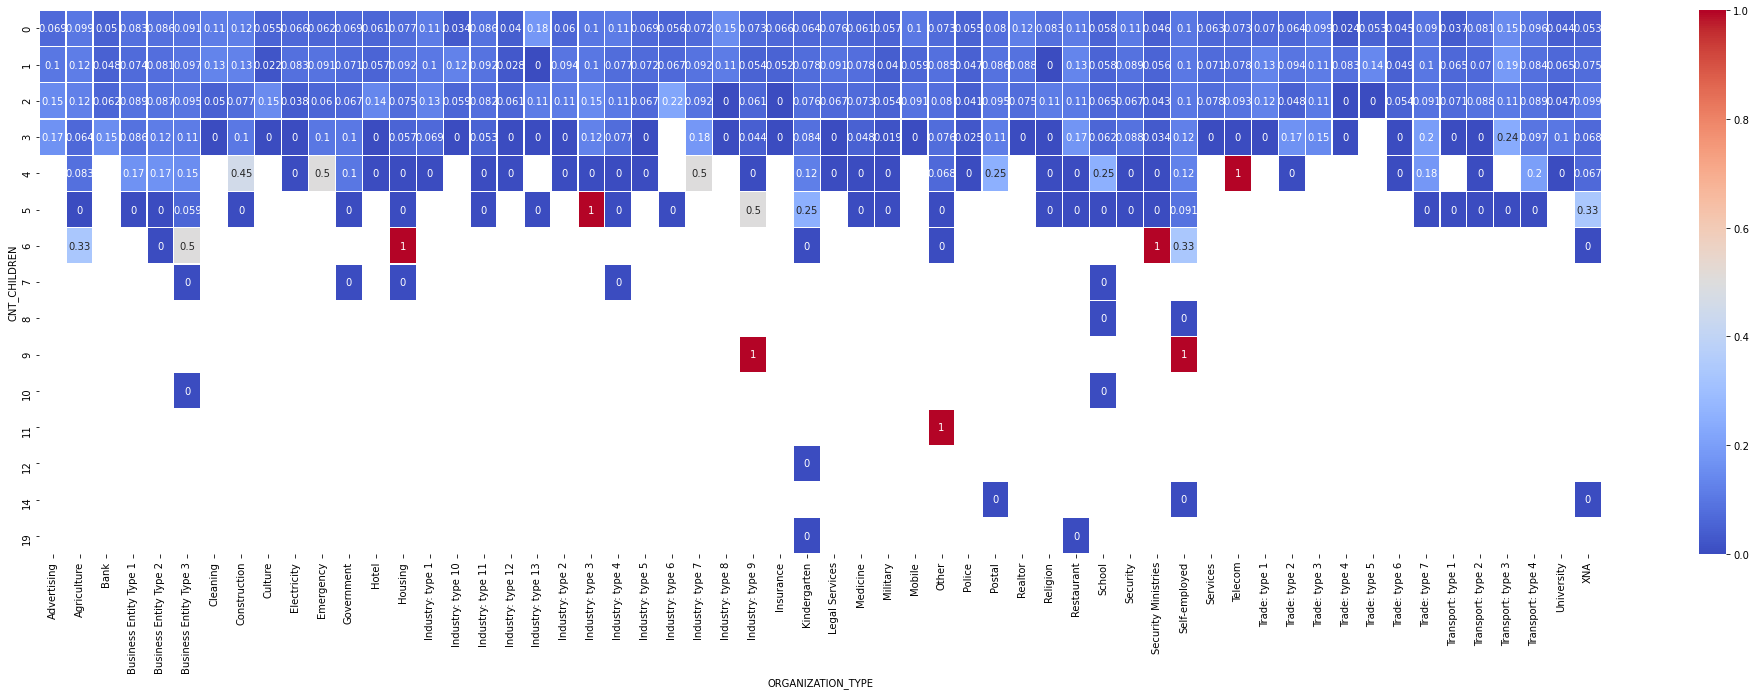

In [ ]:
# Heatmap to find the association between CNT_CHILDREN and ORGANIZATION_TYPE
CAT_CAT_ANALYSIS("CNT_CHILDREN","ORGANIZATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who have 9 or 11 children are most likely to default.
2. We also see a very high default rate from clients having 6 children who are in housing and security ministries, also from clients who have 5 children and in industry type 3 and lastly clients who have 4 children and in telecom.
3. Since in every case we see that clients with 9 or 11 children are most likely to default, this might be due to insufficient data available.

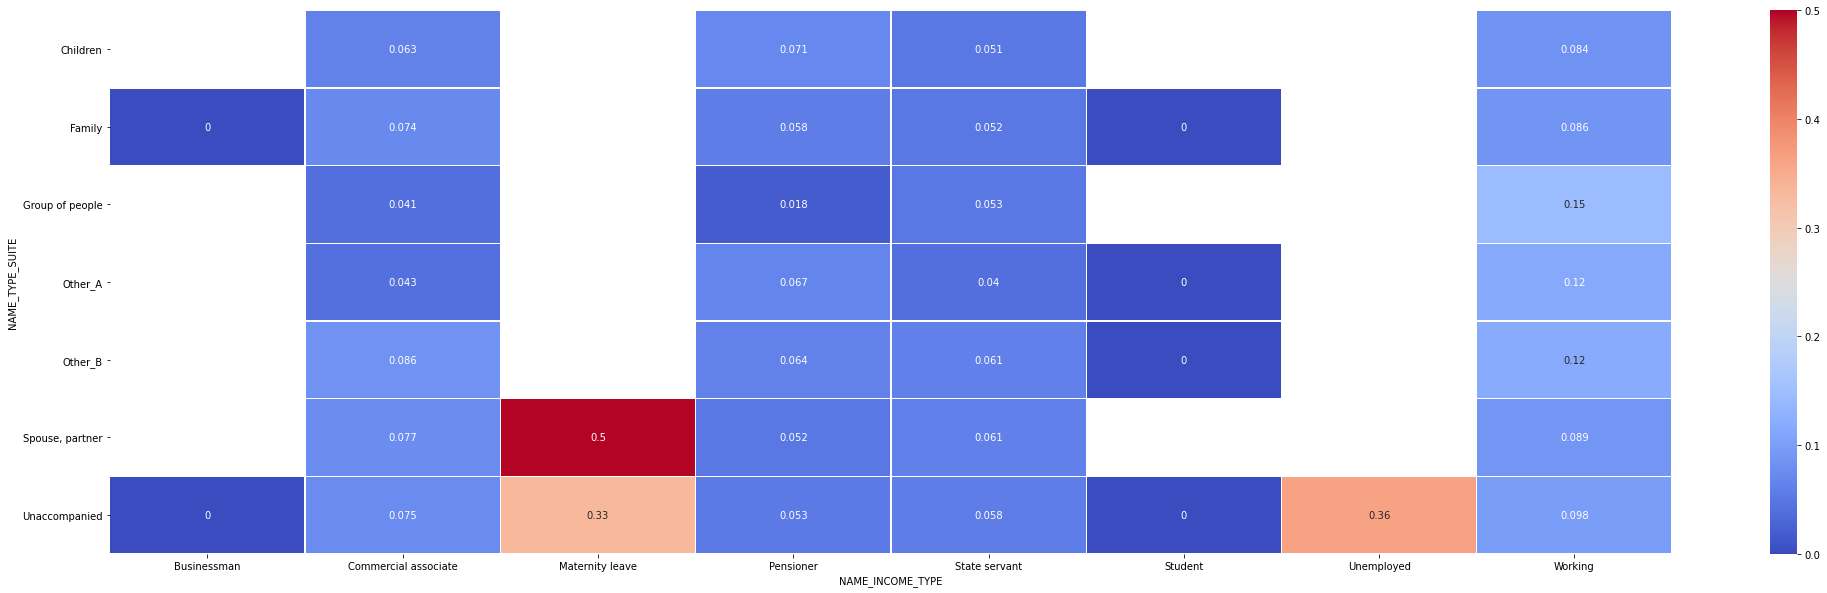

In [ ]:
# Heatmap to find the association between NAME_TYPE_SUITE and NAME_INCOME_TYPE
CAT_CAT_ANALYSIS("NAME_TYPE_SUITE", "NAME_INCOME_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients on maternity leave and with a partner have a high default rate.
2. Cleints who are unemployed and unaccompanied have a high default rate as well.

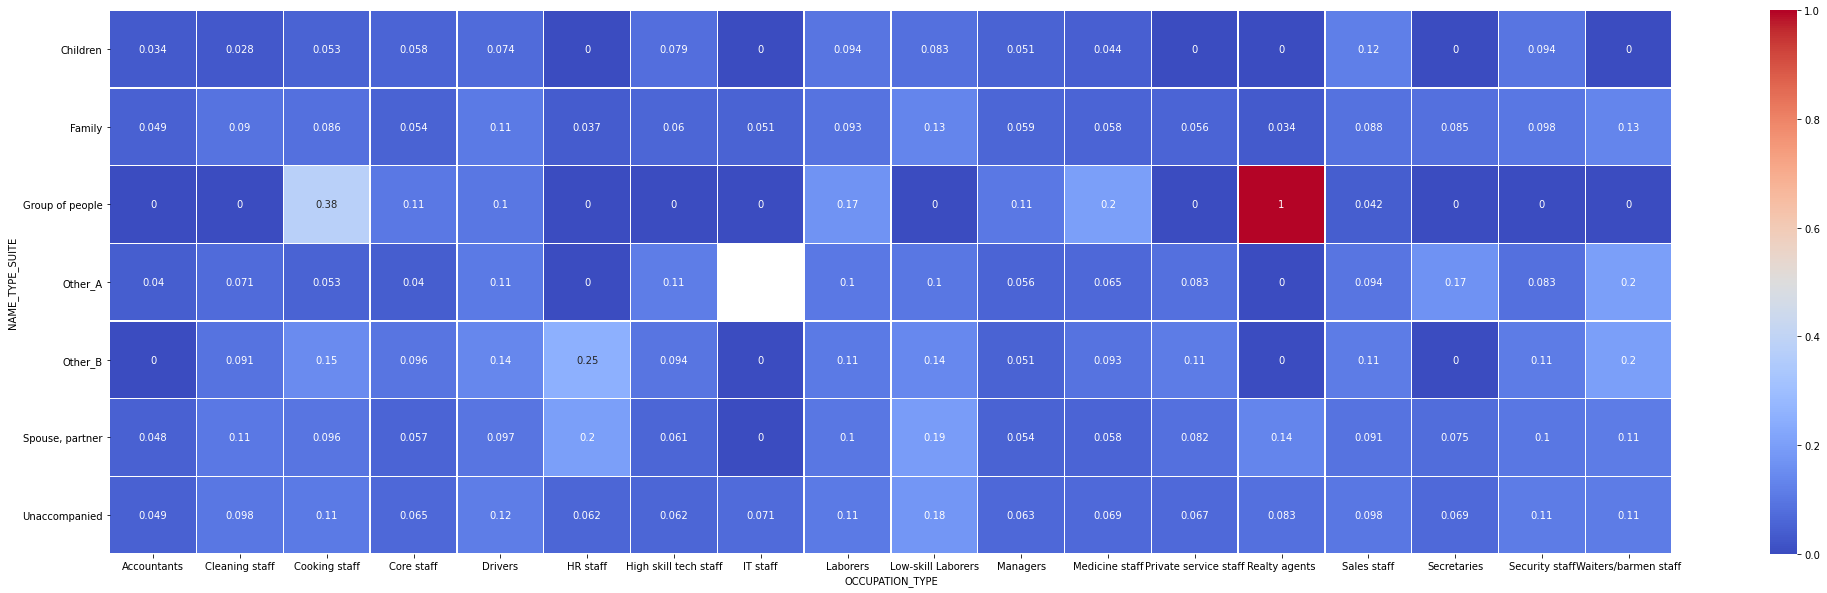

In [ ]:
# Heatmap to find the association between NAME_TYPE_SUITE and OCCUPATION_TYPE
CAT_CAT_ANALYSIS("NAME_TYPE_SUITE", "OCCUPATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who are realty agents and were accompanied by a group of people while applying for loan are most likely to default.
2. Cooking staff accompanied by a group of people while applying for loan have a high default rate.

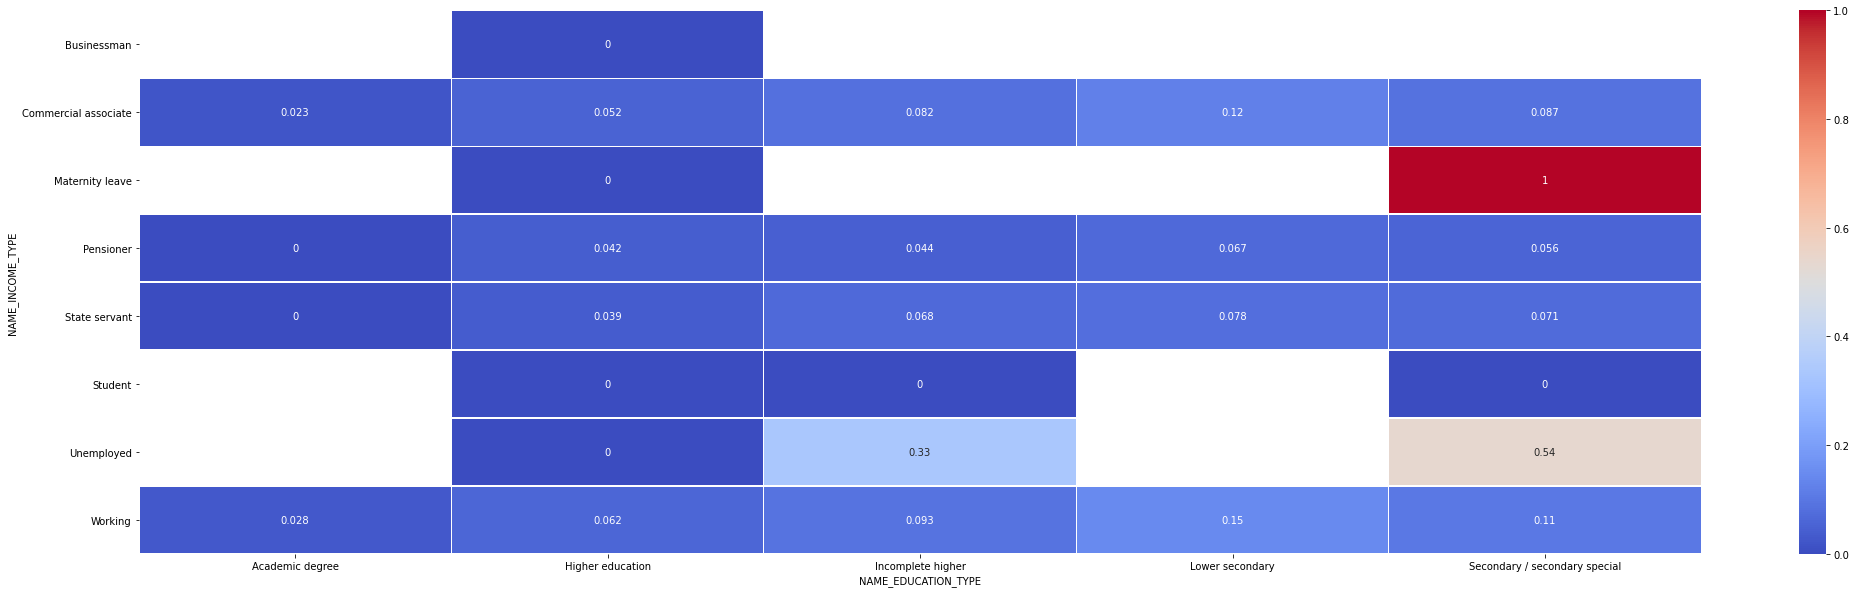

In [ ]:
# Heatmap to find the association between NAME_INCOME_TYPE and NAME_EDUCATION_TYPE
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who are on maternity leave and have completed secondary education are most likely to default.
2. Unemployed clients who have completed secondary education have a high default rate.

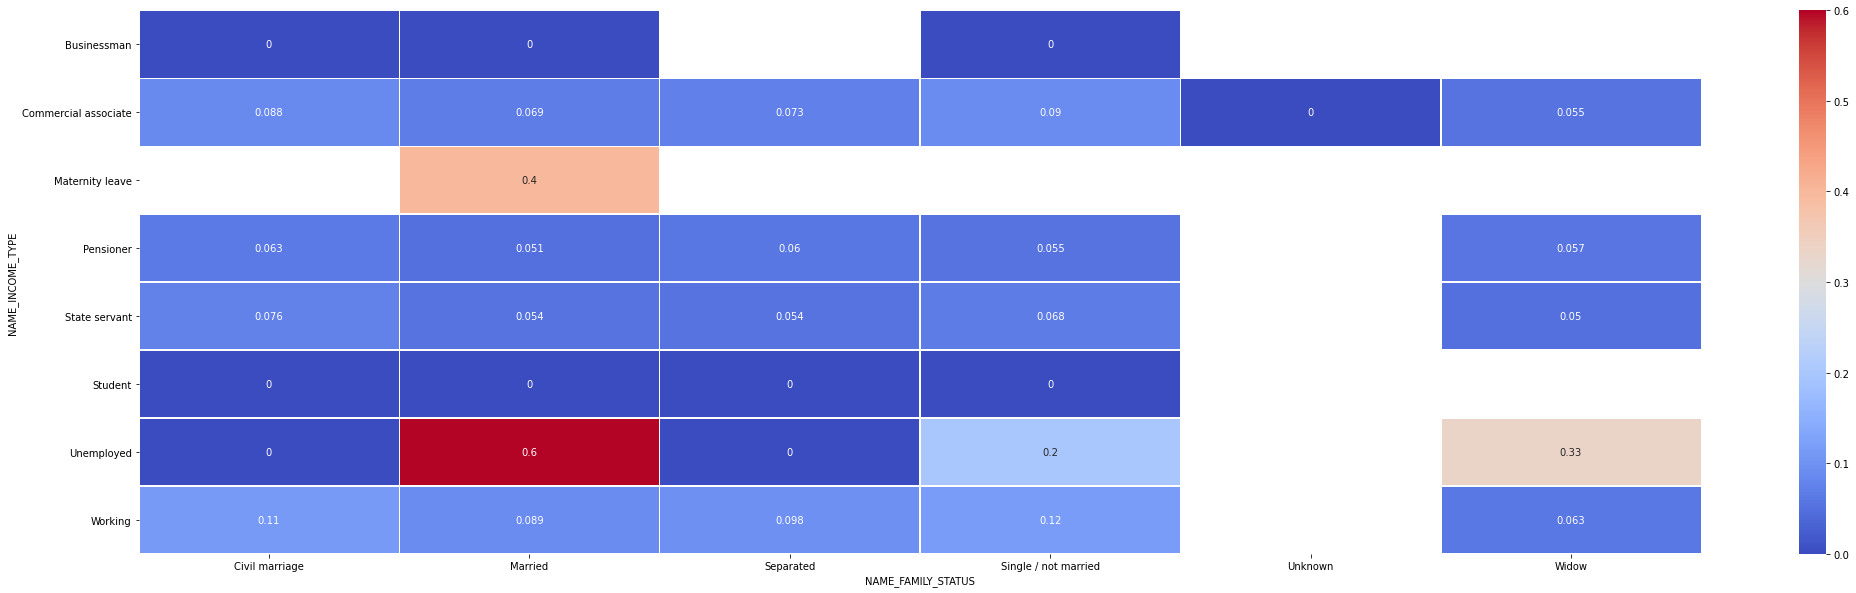

In [ ]:
# Heatmap to find the association between NAME_INCOME_TYPE and NAME_FAMILY_STATUS
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE","NAME_FAMILY_STATUS")

### From the above heatmap the following inferences can be made:
1. Clients who are unemployed and married are most likely to default.
2. Clients on maternity leave and married have a high default rate.
3. Unemployed clients who are also widows have a high default rate as well.

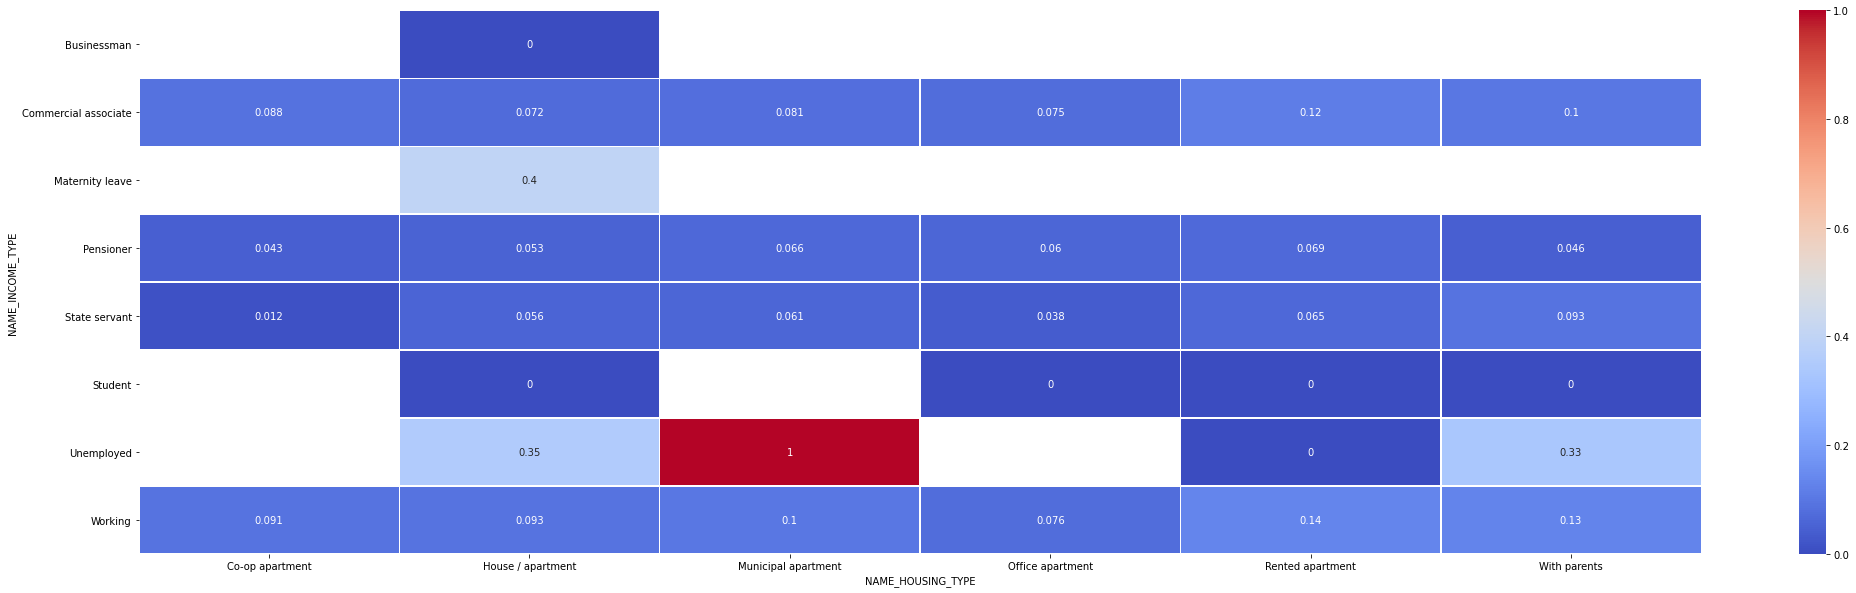

In [ ]:
# Heatmap to find the association between NAME_INCOME_TYPE and NAME_HOUSING_TYPE
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE","NAME_HOUSING_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who are unemployed in general have high default rate, specifically the ones living in a municipal apartment.
2. Clients on maternity leave and living in a house/apartment also have high default rate.

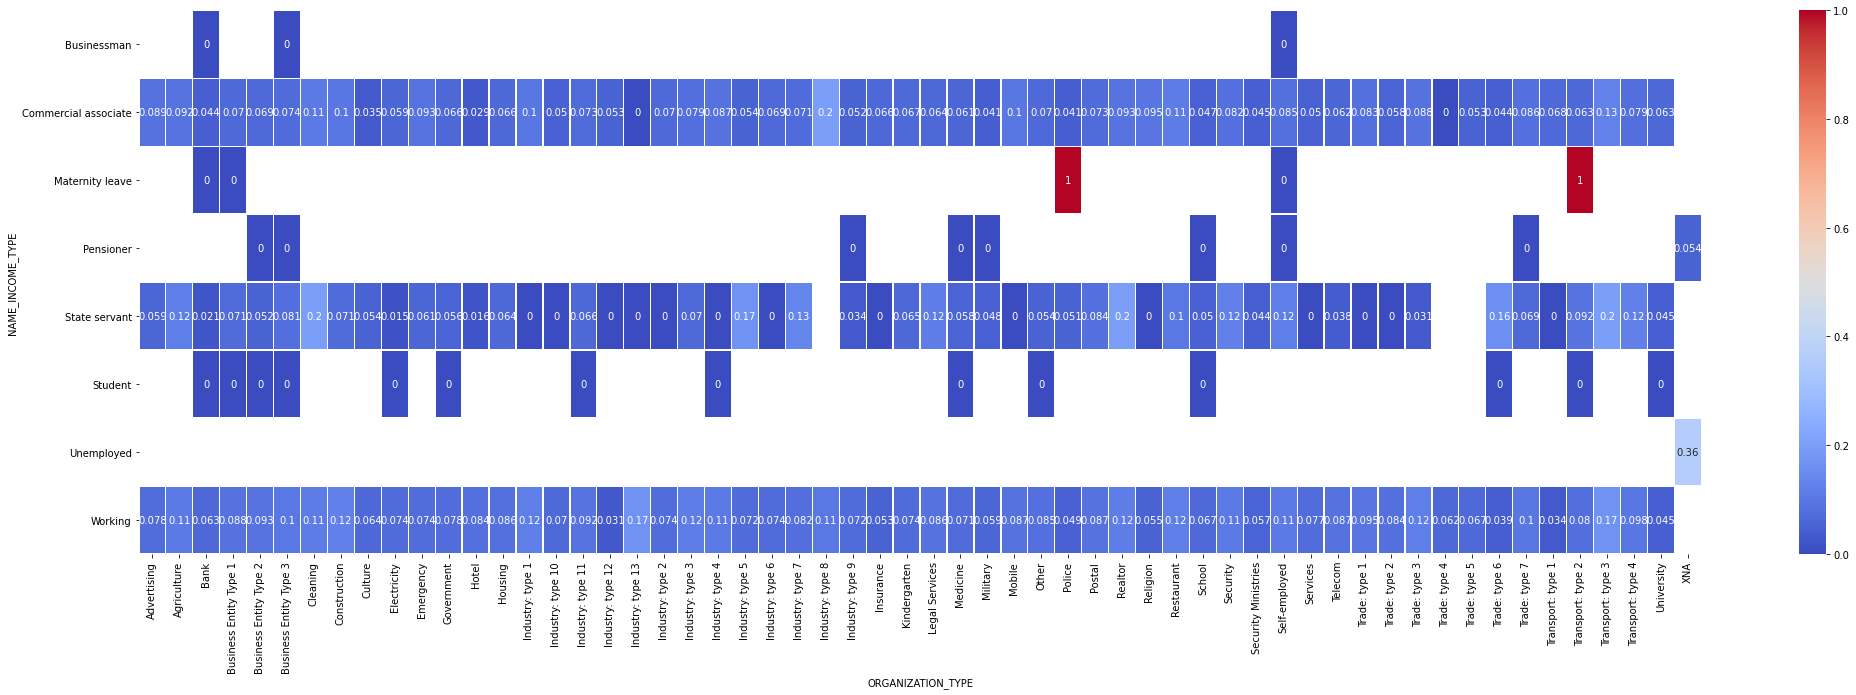

In [ ]:
# Heatmap to find the association between NAME_INCOME_TYPE and ORGANIZATION_TYPE
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE","ORGANIZATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who are on maternity leave are most likely to default irrespective of the organization type.

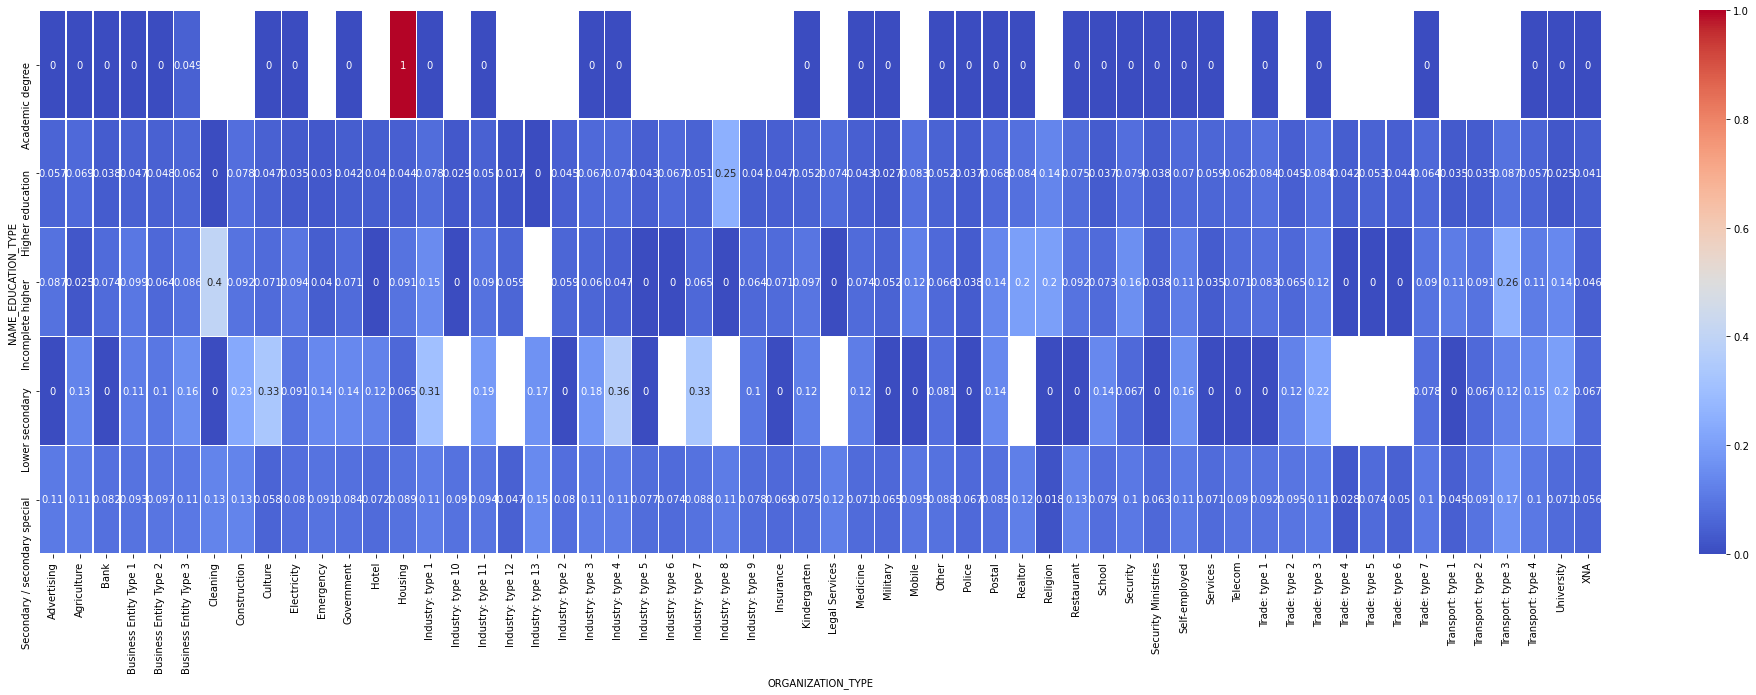

In [ ]:
# Heatmap to find the association between NAME_EDUCATION_TYPE and ORGANIZATION_TYPE
CAT_CAT_ANALYSIS("NAME_EDUCATION_TYPE", "ORGANIZATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who have an academic degree and are in housing category have higher chance of defaulting.
2. Clients with Lower secondary education have relatively high default rate.

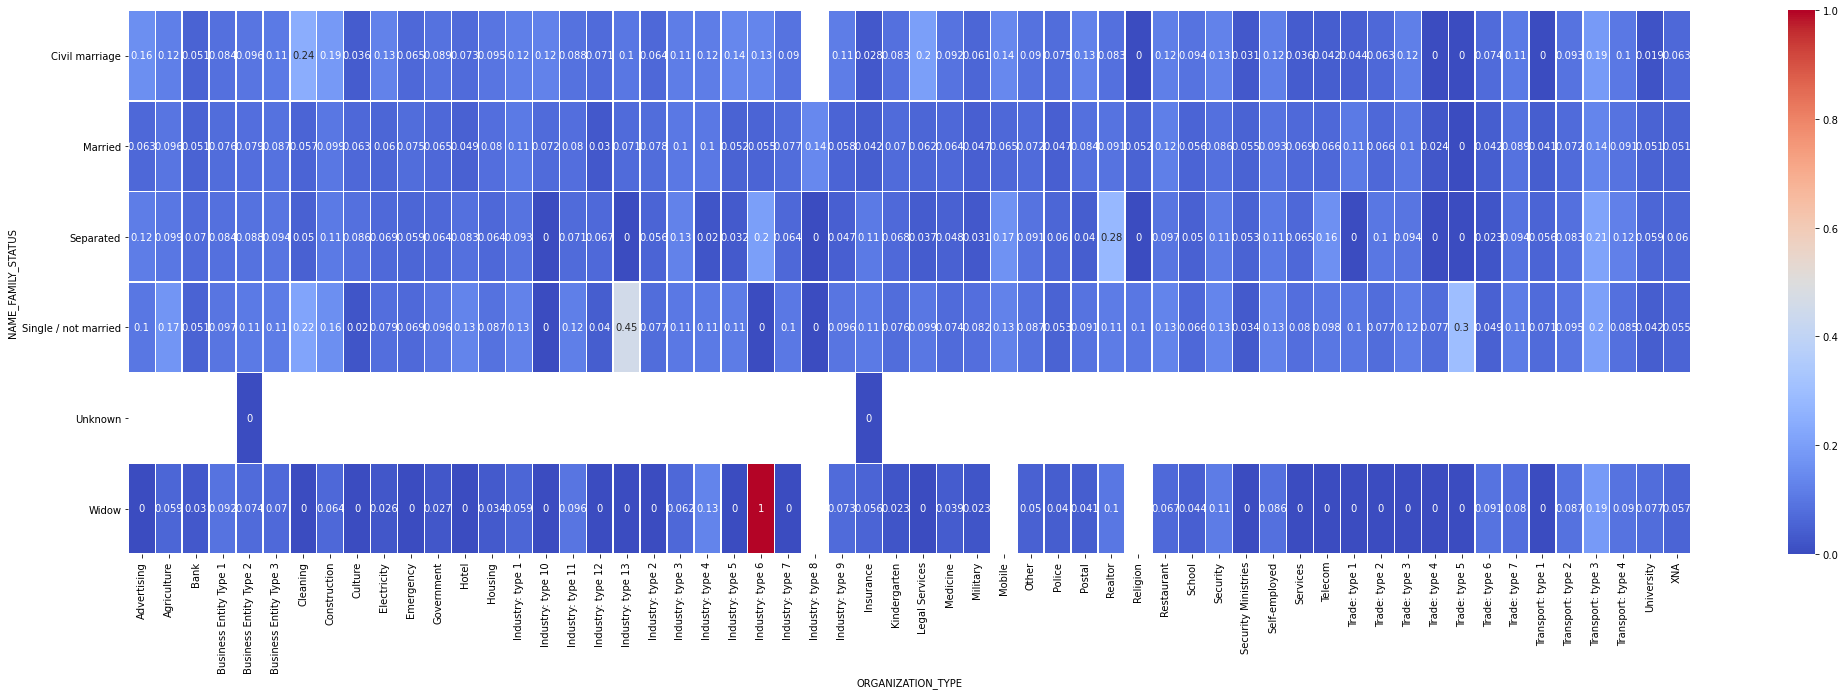

In [ ]:
# Heatmap to find the association between NAME_FAMILY_STATUS and ORGANIZATION_TYPE
CAT_CAT_ANALYSIS("NAME_FAMILY_STATUS","ORGANIZATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who are widows and belong to Industry-type 6 have higher chance of defaulting.

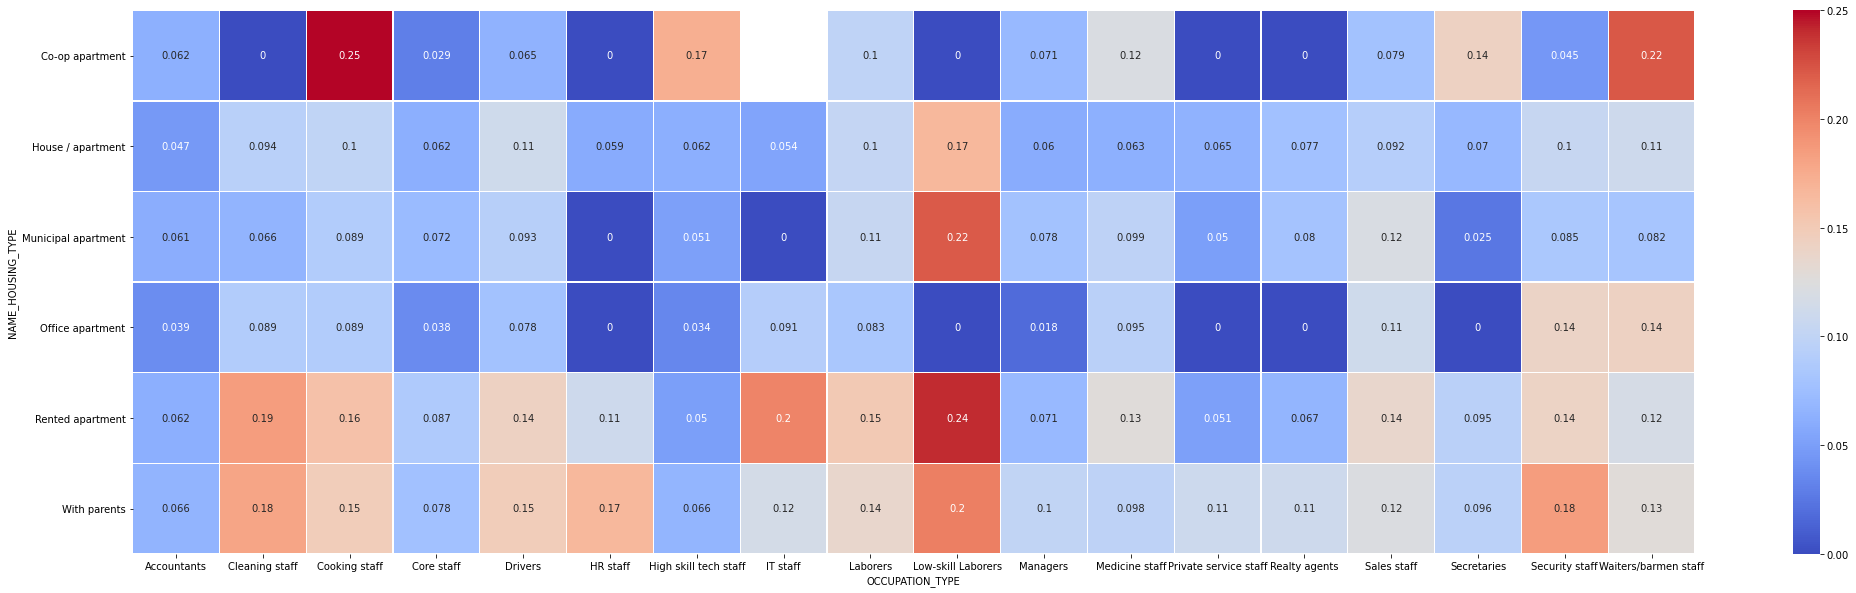

In [ ]:
# Heatmap to find the association between NAME_HOUSING_TYPE and OCCUPATION_TYPE
CAT_CAT_ANALYSIS("NAME_HOUSING_TYPE","OCCUPATION_TYPE")

### From the above heatmap the following inferences can be made:
1. Clients who are low-skill labourers are more likely to default in general.
2. Cooking staff in co-op apartments are most likely to default.

In [ ]:
# Importing the 'previous_application' Dataset.
Previous_data = pd.read_csv("previous_application.csv")

In [ ]:
# Checking previous dataframe
Previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [ ]:
# Checking for null values.
Previous_data_null = (Previous_data.isnull().sum()/len(Previous_data))*100
Previous_data_null

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
dtype: float64

In [ ]:
# Removing the columns with a large number of null values.
Previous_data.drop(Previous_data_null[Previous_data_null.values>=40].index, axis = 1, inplace = True)

## Merging both the data files(application_data and previous_application)

In [ ]:
# Merging the data
merged_data = data.merge(Previous_data, on= 'SK_ID_CURR', how = 'inner')

<ipython-input-106-6ed19db506e4>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = data.merge(Previous_data, on= 'SK_ID_CURR', how = 'inner')


In [ ]:
# Checking the shape of the merged data
merged_data.shape

(1413701, 60)

## STUDY OF OUTLIERS AND DATA DISTRIBUTION IN PREVIOUS DATA

In [ ]:
# Defining a function for boxplots to spot outliers
def box_plot_p(VAR):
    plt.figure(figsize = [10,5])
    g = sns.catplot(x="TARGET",
    y=VAR,
    kind="box",
    data=merged_data)
    plt.show()

<Figure size 720x360 with 0 Axes>

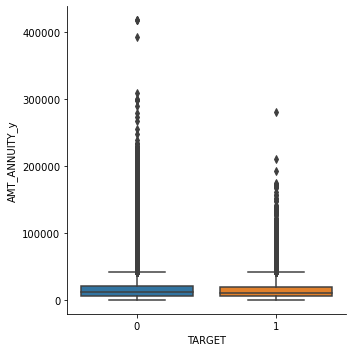

In [ ]:
# BoxPlot for AMT_ANNUITY_y
box_plot_p("AMT_ANNUITY_y")

##### Observations:
>- Both the target types have outliers with respect to annuity amount.
>- Both the target types seem to have similar annuity amounts.

<Figure size 720x360 with 0 Axes>

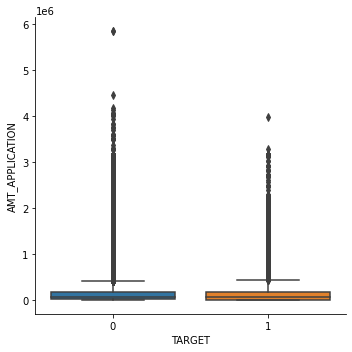

In [ ]:
# BoxPlot for AMT_APPLICATION
box_plot_p("AMT_APPLICATION")

##### Observations:
>- Both the target types have outliers with respect to credit amount asked.
>- Clients of both the target types seem to have asked for the same credit amount.

<Figure size 720x360 with 0 Axes>

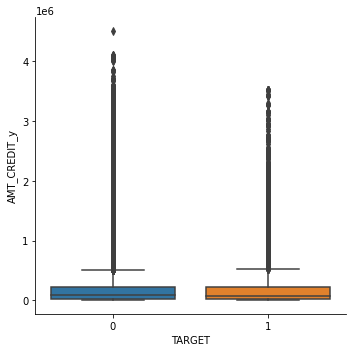

In [ ]:
# BoxPlot for AMT_CREDIT_y
box_plot_p("AMT_CREDIT_y")

##### Observations:
>- Both the target types have outliers with respect to credit amount offered.
>- Both the target types seem to have similar credit amounts offered.

<Figure size 720x360 with 0 Axes>

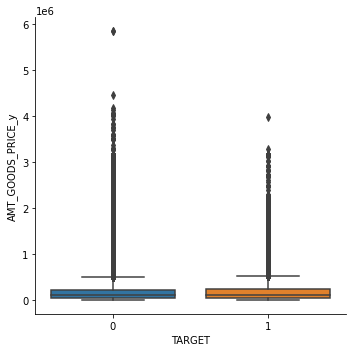

In [ ]:
# BoxPlot for AMT_GOODS_PRICE_y
box_plot_p("AMT_GOODS_PRICE_y")


##### Observations:
>- Both the target types have outliers with respect to credit amount offered.
>- Both the target types seem to have similar credit amounts offered.

In [ ]:
# Defining a function to analyse the "merged data"
def bar_plot_previous(Attribute, hori = True, rot = False):
    variable = merged_data[Attribute].value_counts(normalize = True)
    Variable_Data_Percentage = merged_data.groupby(merged_data[Attribute]).mean()
    Variable_Data_plot = Variable_Data_Percentage['TARGET']
    if hori:
        plt.figure(figsize=[15,7])
        plt.subplot(1,2,1)
        sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation = 90)
        plt.subplot(1,2,2)
        sns.barplot(x = Variable_Data_plot.index, y = Variable_Data_plot.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()
    else:
        plt.figure(figsize=[14,20])
        plt.subplot(2,1,1)
        sns.barplot(x = variable.index, y = variable.values, palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation = 90)

        plt.subplot(2,1,2)
        sns.barplot(x = Variable_Data_plot.index, y = Variable_Data_plot.values,palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()

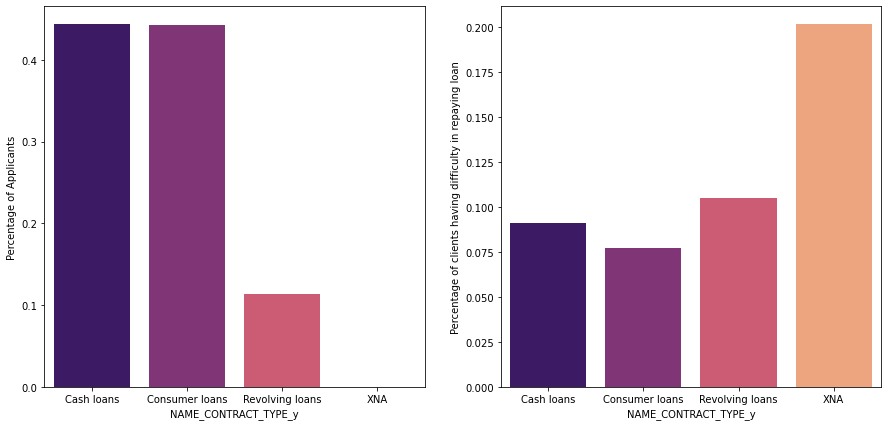

In [ ]:
# BarPlots for NAME_CONTRACT_TYPE_y
bar_plot_previous("NAME_CONTRACT_TYPE_y")

### From the above plots the following inferences can be made:
1. From the previous data most of the clients have opted for cash and consumer loans (approximately 45% each) and about 10% have opted for revolving loans.
2. Clients who have opted for revolving loans have the highest default rate, followed by cash loans and consumer loans. Also to be noted that revolving loans category was not present in application data.

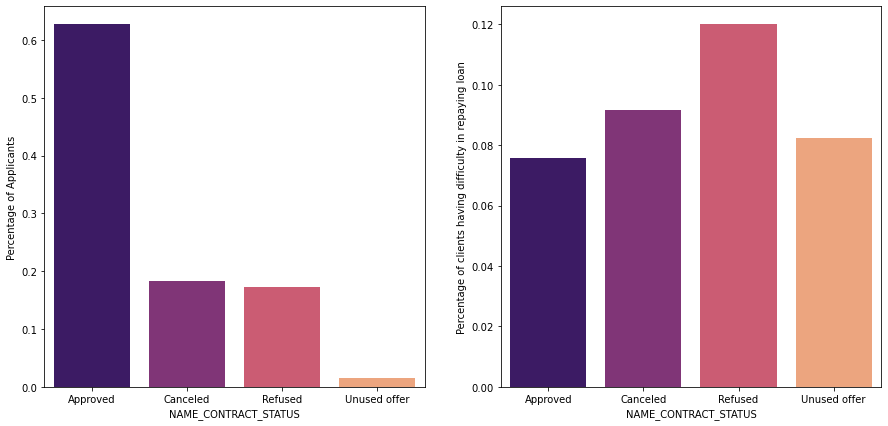

In [ ]:
# BarPlots for NAME_CONTRACT_STATUS
bar_plot_previous('NAME_CONTRACT_STATUS')

### From the above plots the following inferences can be made:
1. Majority of the clients had their loans approved (about 60%), followed by clients who have cancelled their application (nearly 20%) followed by clients who had their applications rejected (nearly 20%).
2. The clients who got their applications rejected are most likely to default (about 12%), followed by clients who cancelled (around 9%), followed by clients who cancelled at different stages of the application process. As expected, the clients who had their applications approved are least likely to default.

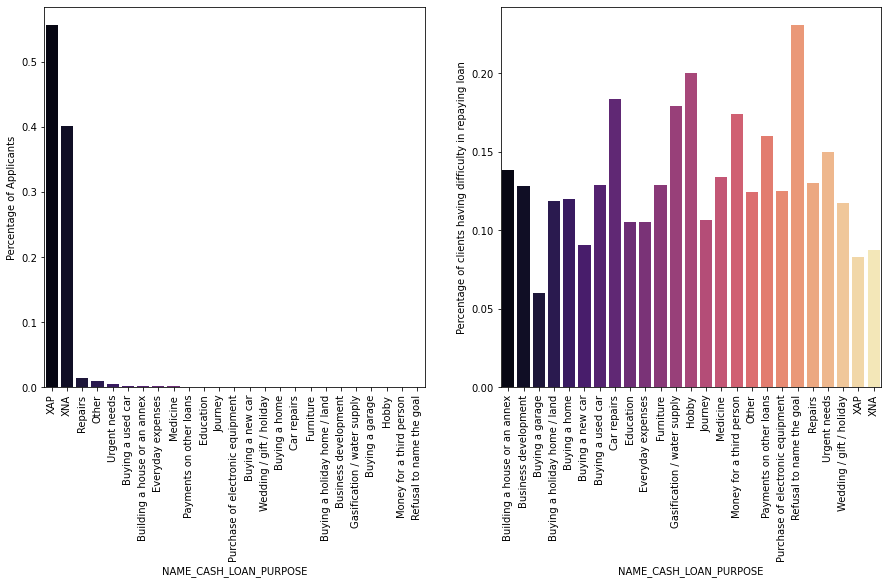

In [ ]:
# BarPlots for NAME_CASH_LOAN_PURPOSE
bar_plot_previous("NAME_CASH_LOAN_PURPOSE",rot = True)

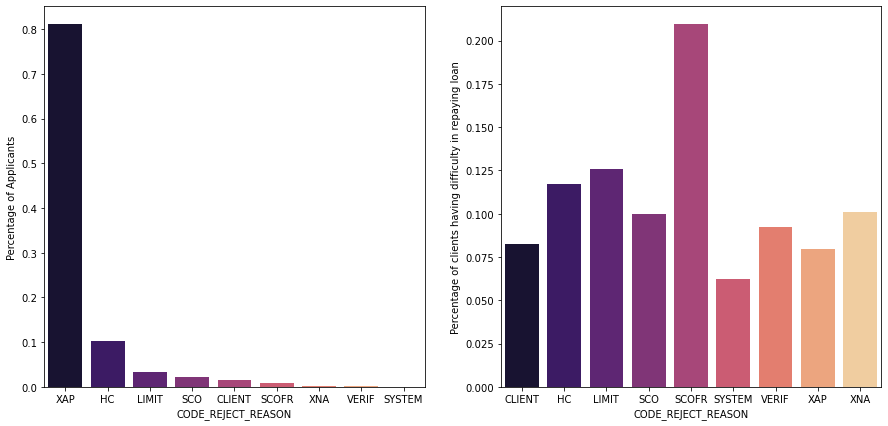

In [ ]:
# BarPlots for CODE_REJECT_REASON
bar_plot_previous('CODE_REJECT_REASON')

### From the above plots the following inferences can be made:
1. Majority of the clients belong to XAP category (approx 80%), followed by HC (approx 10%).
2. Clients belonging to SCOFR have the highest default rate (approx 20%), followed by Limit (approx 12.5%), followed by HC (~11%).

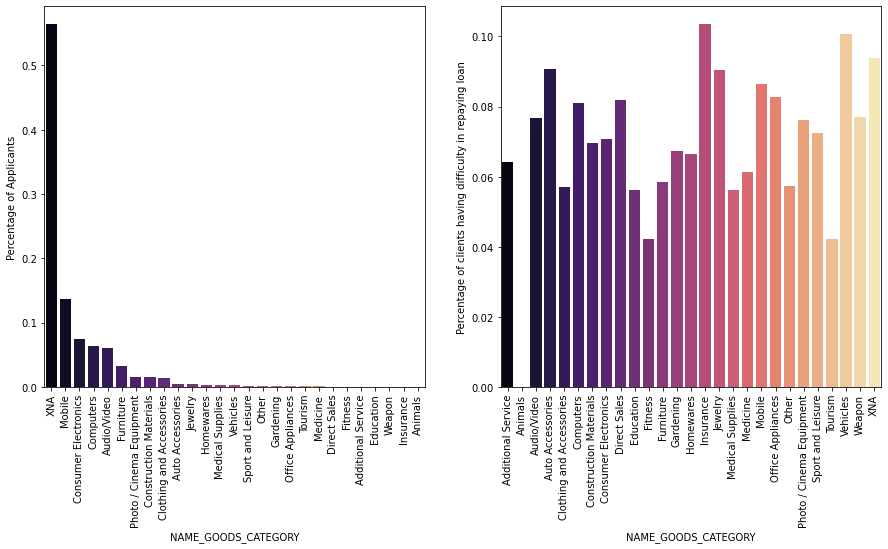

In [ ]:
# BarPlots for NAME_GOODS_CATEGORY
bar_plot_previous("NAME_GOODS_CATEGORY", rot = True)

### From the above plots the following inferences can be made:
1. Insurance category has the highest default rate, followed by vehicles, auto accessories, jewelry.

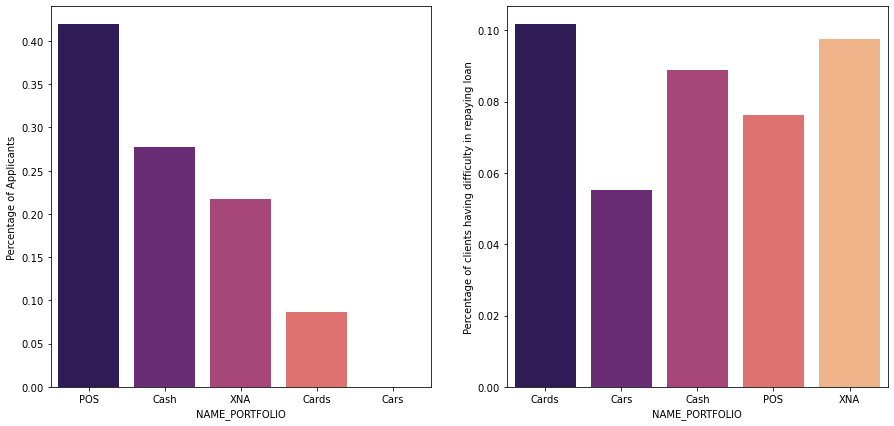

In [ ]:
# BarPlots for NAME_PORTFOLIO
bar_plot_previous("NAME_PORTFOLIO")

### From the above plots the following inferences can be made:
1. Majority of the clients have opted for POS (~40%), followed by cash (approx 26-27%) , followed by Cards etc.
2. Clients who have opted for Cards have the highest default rate (around 10%), followed by cash, POS etc.

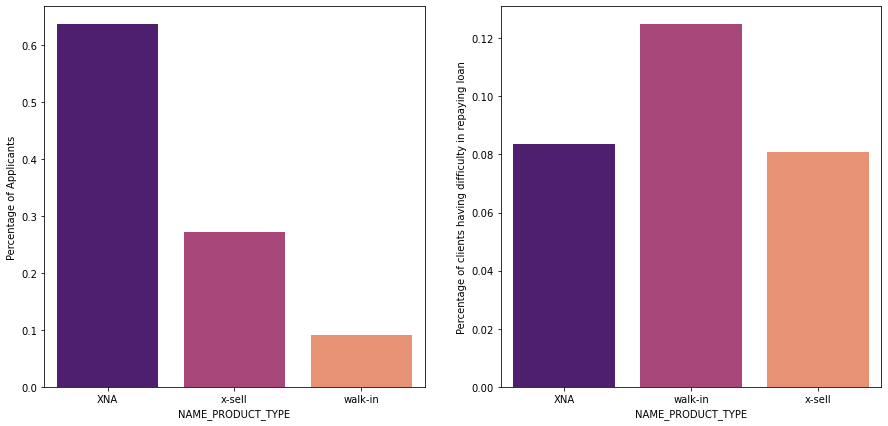

In [ ]:
# BarPlots for NAME_PRODUCT_TYPE
bar_plot_previous("NAME_PRODUCT_TYPE")

### From the above plots the following inferences can be made:
1. Most of the clients application belong to x-sell (nearly 30%) and about 10% belong to walk in. Most of the data is not available in this case.
2. Clients with walk-in applications are most likely to default (approximately 12%) and cleints with x-sell applications have around 8% default rate.

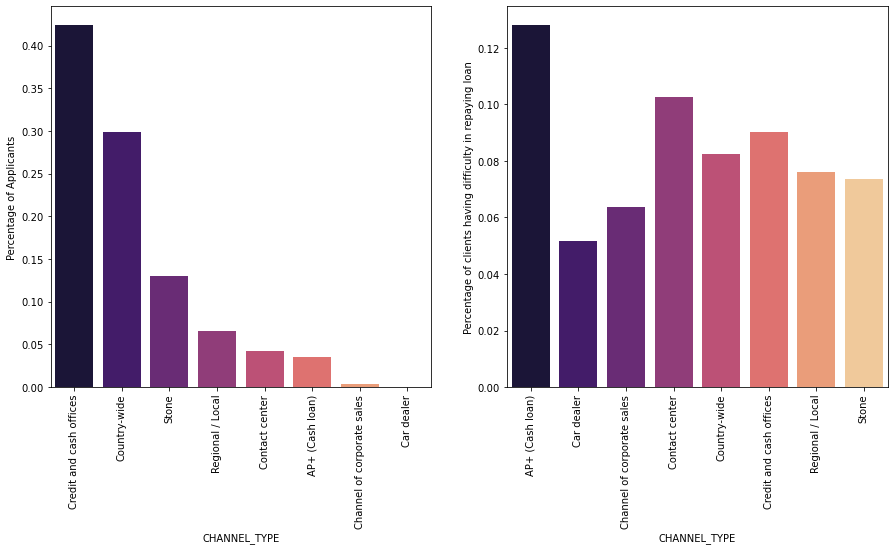

In [ ]:
# BarPlots for CHANNEL_TYPE
bar_plot_previous("CHANNEL_TYPE", rot = True)

### From the above plots the following inferences can be made:
1. Majority of the clients were acquired from Credit and cash offices, followed by country-wide, Stone etc.
2. Clients acquired through AP+ have the highest default rate (approx 12%), followed by contact center ( ~10%), followed by credit and cash offices (approx 9%).

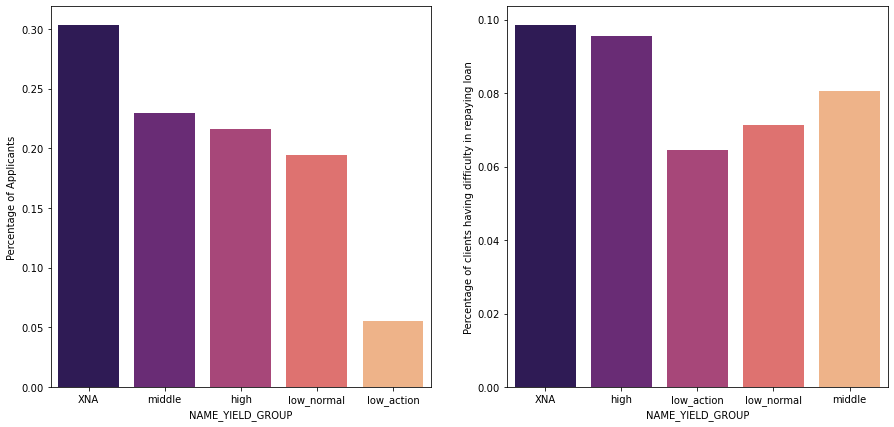

In [ ]:
# BarPlots for NAME_YIELD_GROUP
bar_plot_previous("NAME_YIELD_GROUP")

### From the above plots the following inferences can be made:
1. Around 20% of the clients have middle, followed by high and low_normal interest rates.
2. Clients with high interest rate are most likely to default (nearly 10%), followed by middle , low_normal.

In [ ]:
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801   25.920548           -637           9.994521   
1                    0.003541   45.931507          -1188           3.249315   
2                    0.003541   45.931507          -1188           3.249315   
3                    0.003541   45.931507          -1188           3.249315   
4                    0.010032   52.180822           -225          11.671233   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         5.808219        Laborers              1.0                     2   
1         0.797260      Core staff              2.0                     1   
2         0.797260      Core staff              2.0                     1   
3         0.797260      Core staff              2.0                     1   
4         6.934247        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            1                           0   
3                            1                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3                 -1134.0   
1                 

In [ ]:
# Segmenting the merged data w.r.t TARGET variable to better visualize continuous variables
target_p_0 = merged_data.loc[merged_data['TARGET'] == 0]
target_p_1 = merged_data.loc[merged_data['TARGET'] == 1]

In [ ]:
# Definind a function to plot continuous variables
def distribution_plot_previous(Attribute):

    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.distplot(merged_data[Attribute], bins= 50, kde= True, rug = True, hist = False)
    plt.ylabel("Frequency")

    plt.subplot(1,2,2)
    sns.distplot(target_p_0[Attribute], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
    sns.distplot(target_p_1[Attribute], bins = 50, kde = True, rug = True, hist = False, label= 'TARGET = 1')
    plt.ylabel("Frequency")
    plt.show()

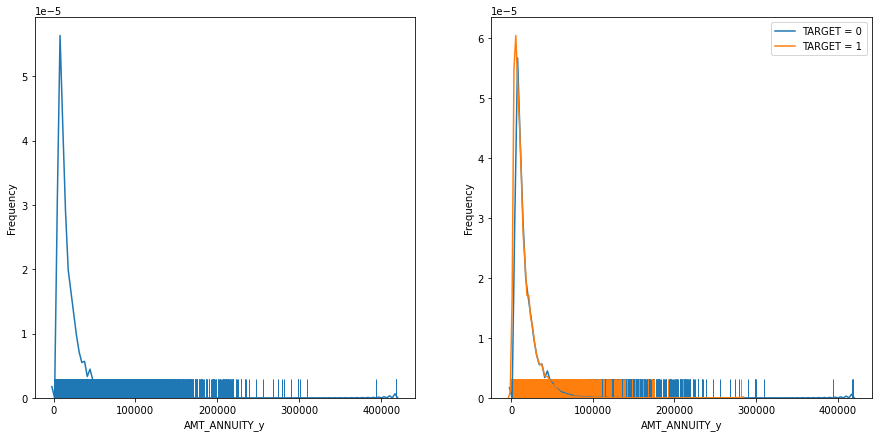

In [ ]:
# DistPlots for AMT_ANNUITY_y
distribution_plot_previous("AMT_ANNUITY_y")

### From the above plots the following inferences can be made:
1. From the previous data it is evident that the annuity is concentrated at around 10000.

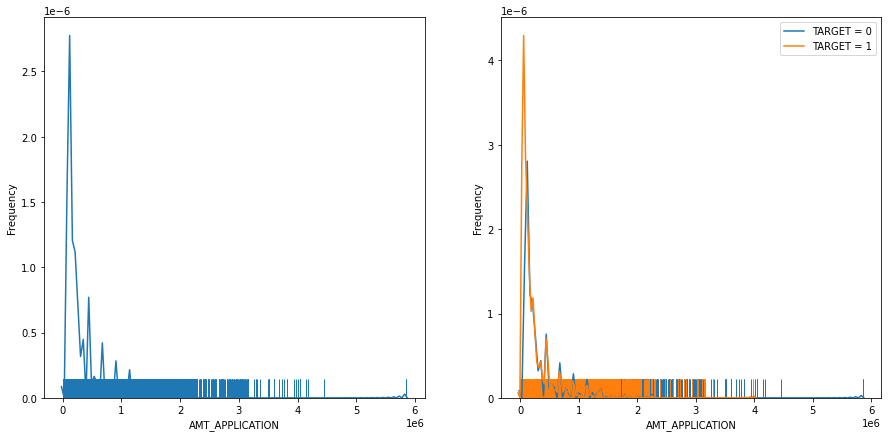

In [ ]:
# DistPlots for AMT_APPLICATION
distribution_plot_previous("AMT_APPLICATION")

### From the above plots the following inferences can be made:
1. The credit amount asked by clients of both target types mostly lie at around 100000.
2. The peak of TARGET=1 is higher than TARGET=0 which suggests there are more clients at around 100000.

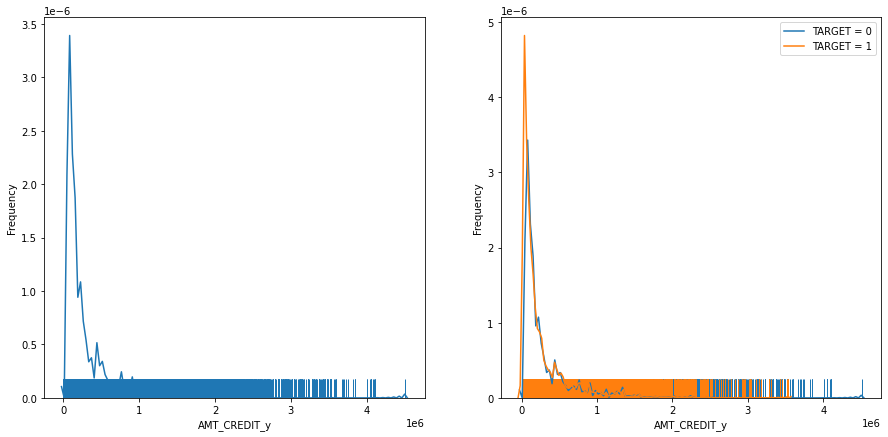

In [ ]:
# DistPlots for AMT_CREDIT_y
distribution_plot_previous("AMT_CREDIT_y")

### From the above plots the following inferences can be made:
1. The credit amounts are concentrated at around 100000.
2. Both the target types have a similar distribution.

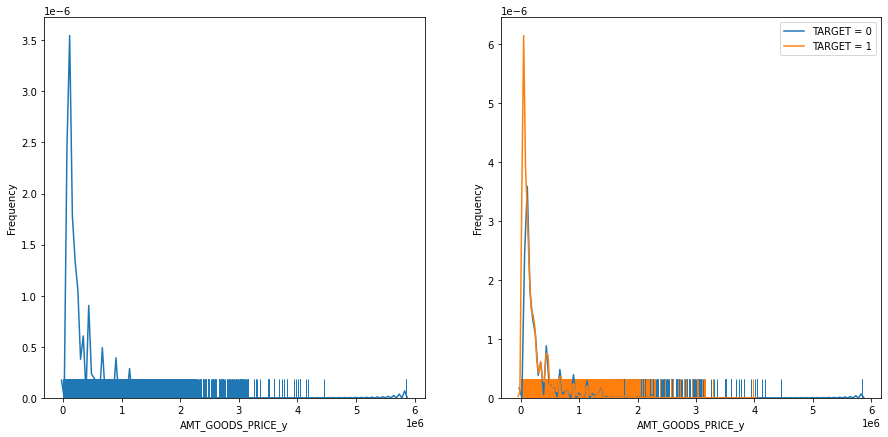

In [ ]:
# DistPlots for AMT_GOODS_PRICE_y
distribution_plot_previous("AMT_GOODS_PRICE_y")

### From the above plots the following inferences can be made:
1. The goods price are concentrated at around 100000.
2. Both the target types have a similar distribution.

In [ ]:
# Defining a function for numerical-categorical variable analysis for 'merged data'
def NUMCAT_ANALYSIS_Pre(CATVAR, NUMVAR, rot = False):

    plt.figure(figsize=[15,7])
    if rot:
        plt.xticks(rotation = 90)
    sns.boxplot(data = merged_data, x=CATVAR, y= NUMVAR, hue = "TARGET")

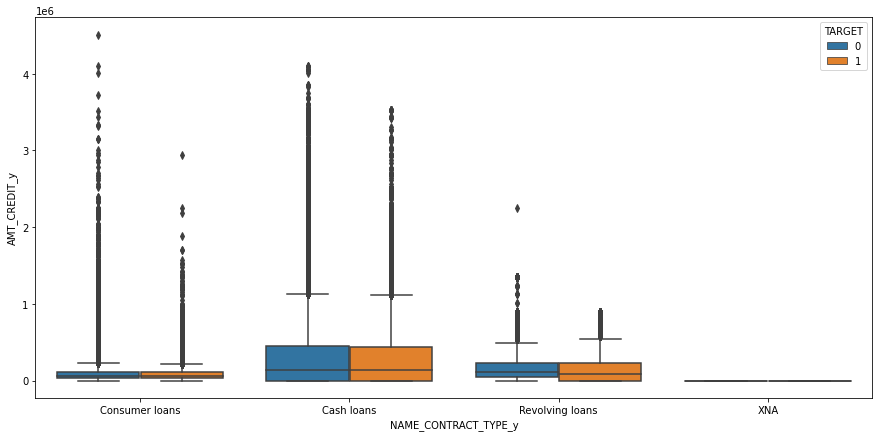

In [ ]:
# BoxPlots for NAME_CONTRACT_TYPE_y vs AMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("NAME_CONTRACT_TYPE_y", "AMT_CREDIT_y")

### From the above plots the following inferences can be made:
1. The clients who have opted for cash loans have higher credit amounts compared to the other 2 loan types.
2. All the 3 loan types seem to have a lot of outliers.

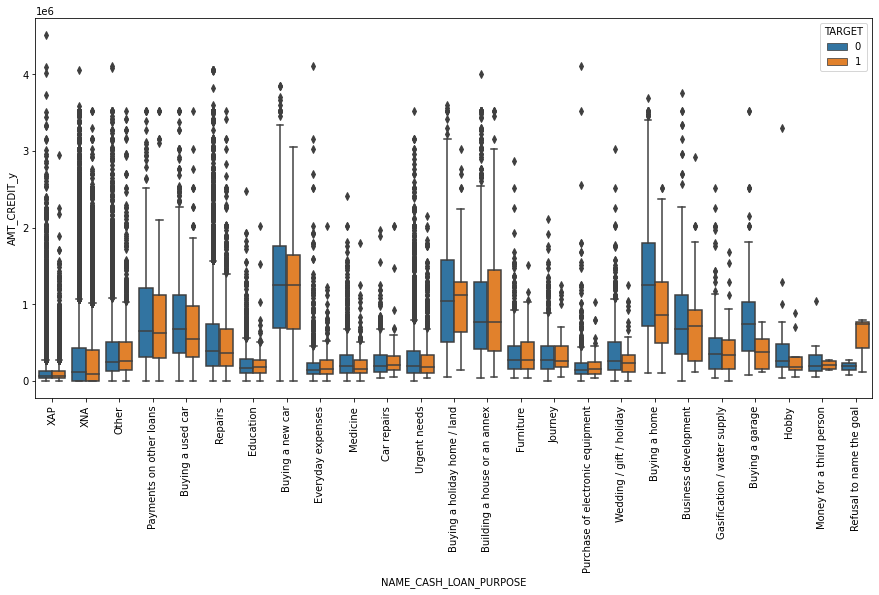

In [ ]:
# BoxPlots for NAME_CASH_LOAN_PURPOSE vs AMT_CREDIAMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("NAME_CASH_LOAN_PURPOSE", "AMT_CREDIT_y", rot = True)

### From the above plots the following inferences can be made:
1. The credit amounts are relatively high for buying a car, buying a holiday home/land, buying a house and buying a home.
2. When the clients are refusing to name the goal, they are defaulting for high credit amounts compared to non defaulters in the same category.

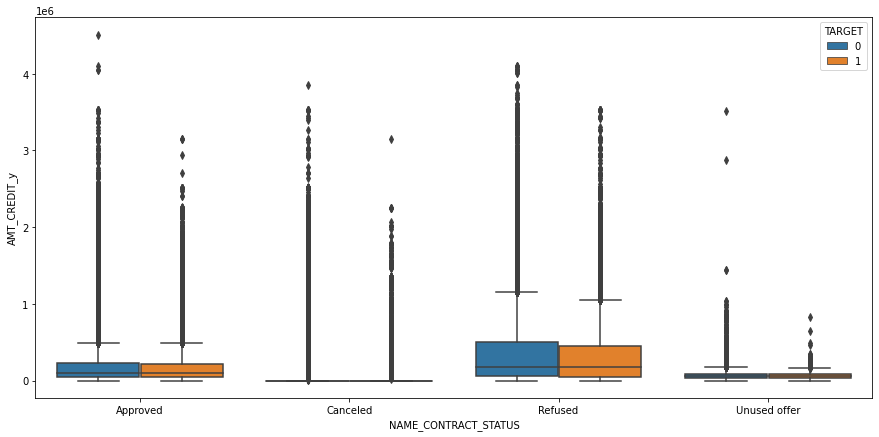

In [ ]:
# BoxPlots for NAME_CONTRACT_STATUS vs AMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("NAME_CONTRACT_STATUS", "AMT_CREDIT_y")

### From the above plots the following inferences can be made:
1. The loans have been refused most likely due to clients demanding high credit amounts, which is evident by the IQR being in the higher range.

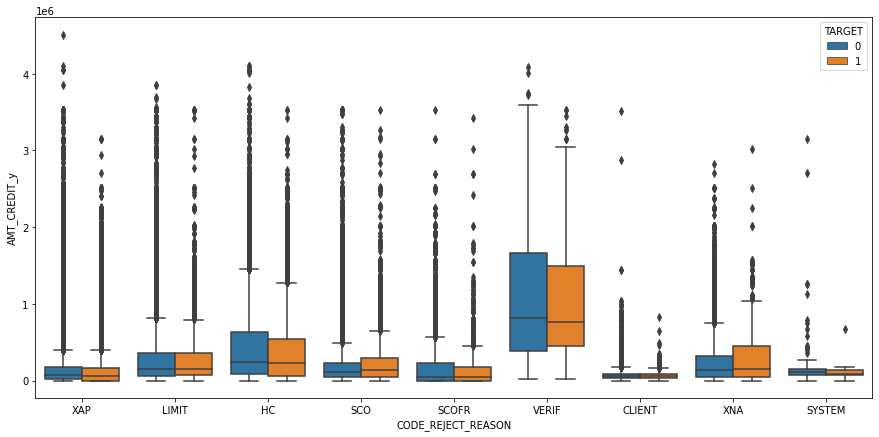

In [ ]:
# BoxPlots for CODE_REJECT_REASON vs AMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("CODE_REJECT_REASON", "AMT_CREDIT_y")

### From the above plots the following inferences can be made:
1. The clients belonging to VERIF category have relatively high credit amount which is evident from the IQR.

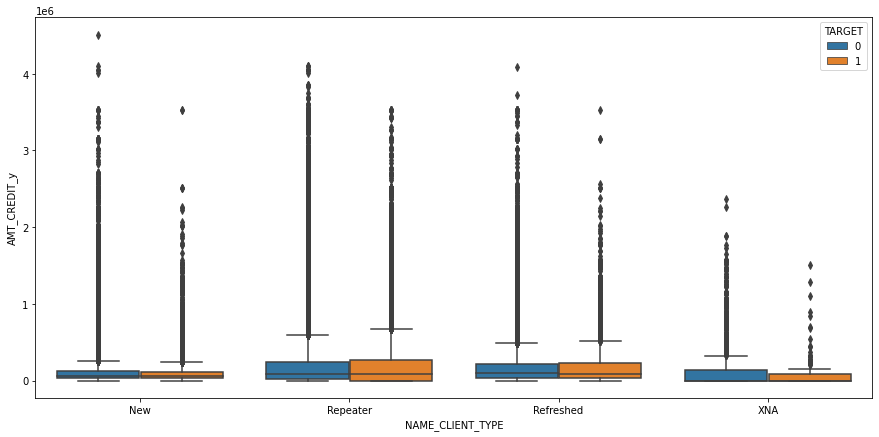

In [ ]:
# BoxPlots for NAME_CLIENT_TYPE vs AMT_CREDIT_y
NUMCAT_ANALYSIS_Pre("NAME_CLIENT_TYPE", "AMT_CREDIT_y")

### From the above plots the following inferences can be made:
1. Looks like new clients are being offered lesser credit amount when compared to old clients, comparing the IQR's.

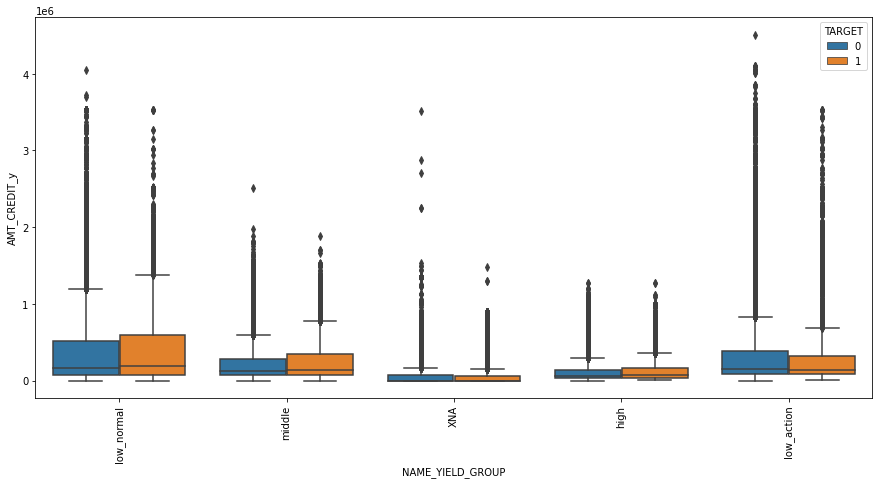

In [ ]:
# BoxPlots for NAME_YIELD_GROUP vs AMT_CRAMT_CREDIT_yEDIT
NUMCAT_ANALYSIS_Pre("NAME_YIELD_GROUP", "AMT_CREDIT_y", rot = True)

### From the above plots the following inferences can be made:
1. It is evident that when the clients are offered higher credit amounts their interest rate is relatively lesser when compared to lower credit amounts.
2. Therefore higher the credit amount lesser is the interest rate.

In [ ]:
# Creating a list of important categorical variables
LIST_P = ["NAME_CONTRACT_TYPE_x", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY","NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "NAME_CLIENT_TYPE","NAME_YIELD_GROUP", "CNT_CHILDREN"]

In [ ]:
# Defining a function to analyse "NAME_CONTRACT_STATUS" against the categorical variables.
def CAT_CAT_ANALYSIS_Prev(LIST_P, rot = False):
    for i in range(1, len(LIST_P)):
        res = pd.pivot_table(data = merged_data, index = LIST_P[i], columns= 'NAME_CONTRACT_STATUS', values = "TARGET")
        plt.figure(figsize=[20,100])
        plt.subplot(len(LIST_P), 1, i)
        plt.subplots_adjust(hspace= 0.5)
        sns.heatmap(data = res, annot = True, cmap = "coolwarm")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()

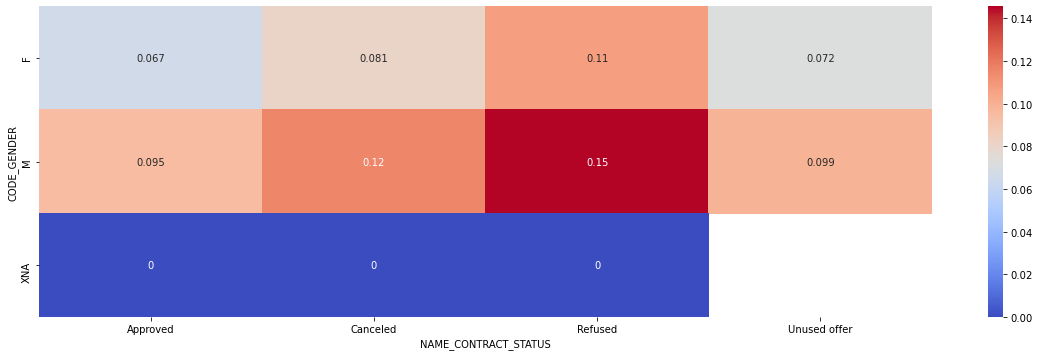

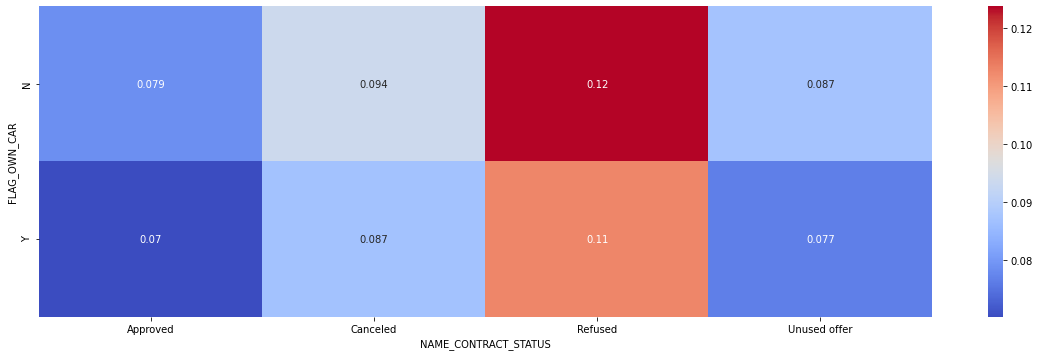

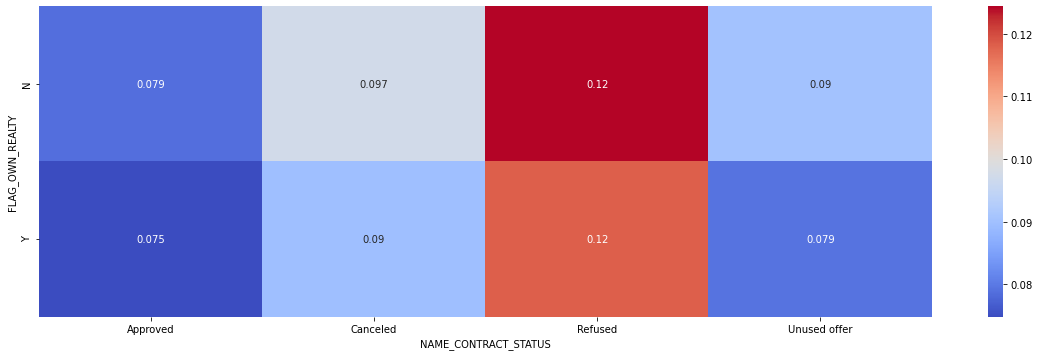

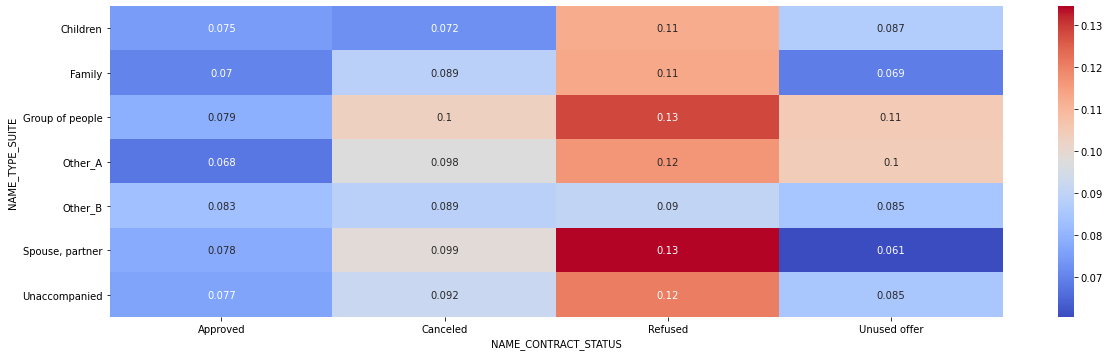

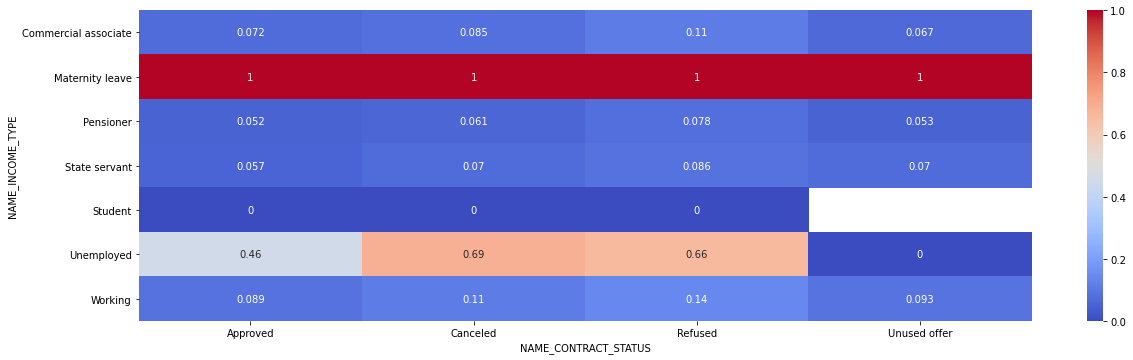

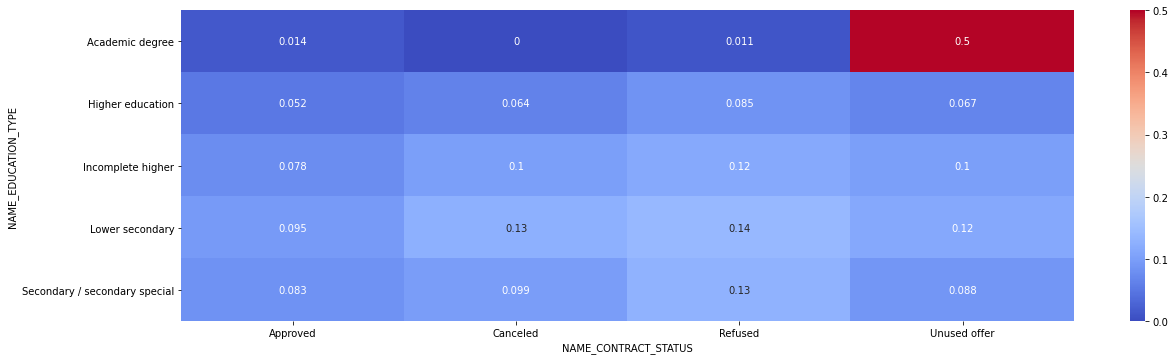

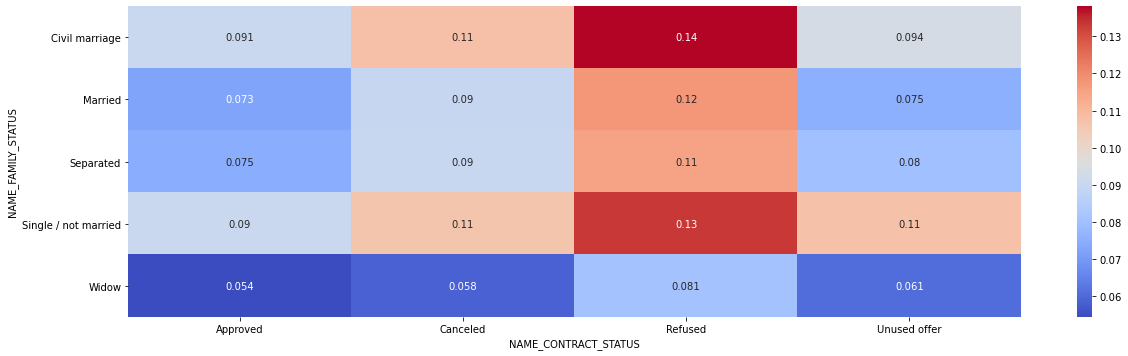

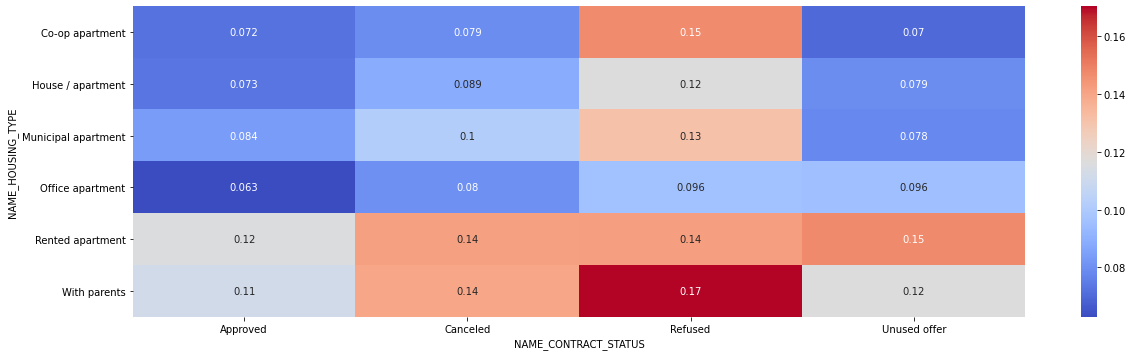

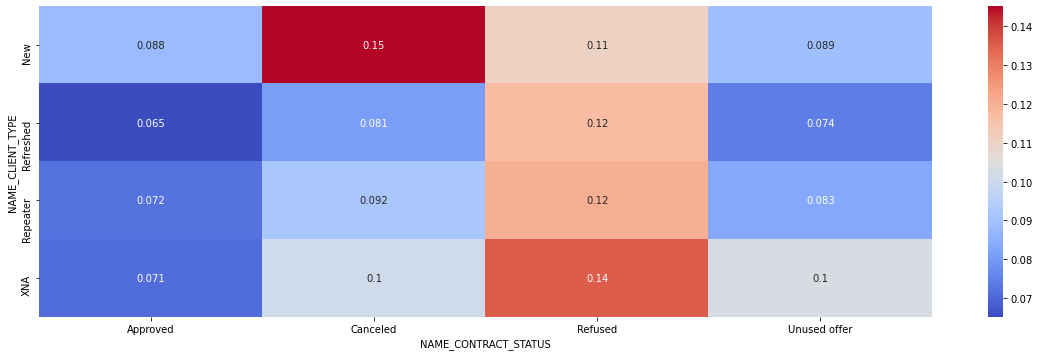

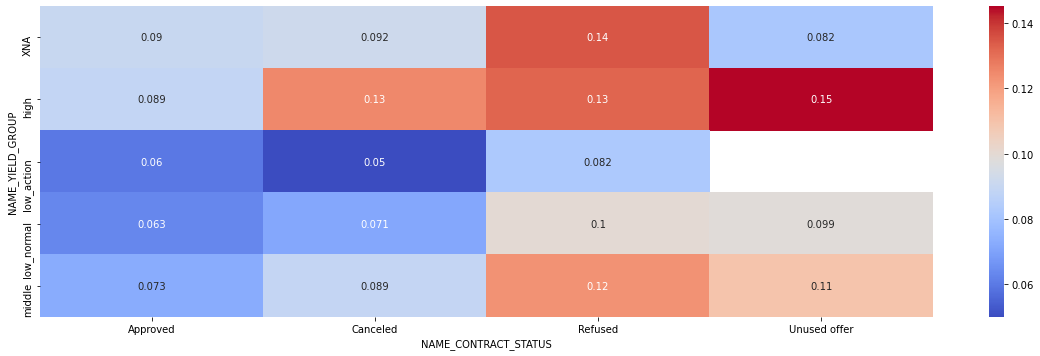

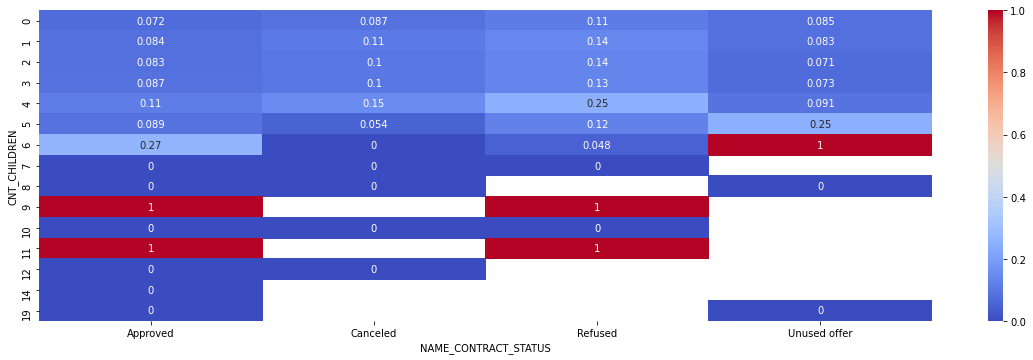

In [ ]:
CAT_CAT_ANALYSIS_Prev(LIST_P)

### We have plotted the above heatmaps to analyse the contract status which is available in previous data against important categorical variables, following are the inferences

1. A male client whose contract status is Refused is more likely to default.
2. In general clients whose contract status is refused is more likely to default.
3. Clients who are on maternity leave are more likely to default irrespective of Contract status
4. Unemployed clients whose contract status is refused or cancelled are more likely to default.
5. Clients who have an academic degree whose contract status is unused offer are more likely to default.
6. Clients whose contract status is Refused are more liekly to default irrespective of family status, except widows.
7. Clients who are staying with parents whose contract status is refused are more likely to default.
8. New clients having contract status 'Cancelled' are more likely to default.
9. Clients who have high interest rate for their loans and having contract status 'Unused offer' are more likely to default.
10. The clients with 6 children and unused offer are most likely to default, as we saw before the clients with 9 or 11 children have the highest default rate.
11. Clients who have more number of children are more likely to default irespective of contract status.
12. Clients who are Realty agents and accompanied by a group of people while applying for the loan are most likely to default.

## Conclusions:
>- *Clients to avoid:*
    1. In general clients who are on maternity leave are more likely to default.
    2. In general clients who are unemployed are more likely to default.
    3. In general clients who have relatively more number of children are more likely to default.
    4. Unemployed Male clients who have opted for Cash loans/ having relatively more number of children are more likely to default.
    5. Clients who have lower-secondary education/ living in a rented apartment/ with parents are more likely to default.
    6. Male Clients who are relatively younger / low-skilled labourers / having more number of family members are more likely to default.
    
>- *Clients to look for:*
    1. Clients who have opted for Revolving loans are less likely to default.
    2. Clients with contract status 'Approved' are less likely to default irrespective of other variables.
    3. Clients who are businessmen or students are less likely to default.
    4. Clients with an academic degree are less likely to default.
    5. Clients living in an office apartment are less likely to default.
